<a href="https://colab.research.google.com/github/hayakzan/quatrieme-melodie/blob/main/Quatrieme_melodie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Before running the code
#### - Upload the notation fonts `/fonts/OpusStd.ttf` and `/fonts/OpusSpecialStd.ttf` into `/content` folder
#### - Upload `/xydata/train_xy.json` into `/content` folder


In [29]:
# -*- coding: utf-8 -*-

from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from scipy import interpolate
import csv
import pandas as pd
import json
import math



In [30]:
seed1 = 99
np.random.seed(seed1)

In [31]:
font_dirs = ["/content"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

#TODO: fix the font issue
fontprop1 = fm.FontProperties(fname=font_files[0], size=20)
fontprop2 = fm.FontProperties(fname=font_files[1], size=20)



#### Create a JSON file for the parameters

##ONLY FOR INITIAL RUN! SET THE SEED HERE
#### After the initial run, run after here (`Cmd/Ctrl+F10`) after each new slider setting (no need to re-run the slider cell). This will add new data into `slider_values.json`

In [32]:
amount = 10

In [33]:
slider_values_list = []

def update_slider_values(change):

  slider_values = {
    "speed": round(random.uniform(0.2, 2.0), 2),
    "size": random.randint(3, 12),
    "x_offset": round(random.uniform(0.4, 3.0), 2),
    "y_offset": round(random.uniform(0.0, 0.0), 2),  # not using this
    "rhythm_deviation": round(random.uniform(0.0, 0.3), 2),
    "pitch_deviation": round(random.uniform(0.0, 0.4), 2),
    "touch_deviation": round(random.uniform(0.0, 1.0), 2),
    "accidental_deviation": random.randint(10, 20),

    "amp_1_slider": round(random.uniform(0.0, 1.0), 2),
    "amp_2_slider": round(random.uniform(0.0, 1.0), 2),
    "amp_3_slider": round(random.uniform(0.0, 1.0), 2),
    "amp_mean1_slider": round(random.uniform(0.0, 0.33), 2),
    "amp_mean2_slider": round(random.uniform(0.34, 0.66), 2),
    "amp_mean3_slider": round(random.uniform(0.67, 1.0), 2),
    "amp_kurt1_but": random.choice(['min', 'mid', 'max']),
    "amp_kurt2_but": random.choice(['min', 'mid', 'max']),
    "amp_kurt3_but": random.choice(['min', 'mid', 'max']),

    "tamp_1_slider": round(random.uniform(0.0, 1.0), 2),
    "tamp_2_slider": round(random.uniform(0.0, 1.0), 2),
    "tamp_3_slider": round(random.uniform(0.0, 1.0), 2),
    "tamp_mean1_slider": round(random.uniform(0.0, 0.33), 2),
    "tamp_mean2_slider": round(random.uniform(0.34, 0.66), 2),
    "tamp_mean3_slider": round(random.uniform(0.67, 1.0), 2),
    "tamp_kurt1_but": random.choice(['min', 'mid', 'max']),
    "tamp_kurt2_but": random.choice(['min', 'mid', 'max']),
    "tamp_kurt3_but": random.choice(['min', 'mid', 'max'])
}

  slider_values_list.append(slider_values)

  with open("slider_values.json", "w") as file:
      json.dump(slider_values_list, file, indent=4)


In [34]:
# update the slider values
for i in range(amount):
  update_slider_values(None)

# The sinusoids

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import json
from google.colab import files

# Time range
t = np.linspace(0, 60 * np.pi, 2000)

# Static wave f(t)
f = np.sin(t)

# Parameters for the controllable wave g(t)
A = 1.0       # Amplitude (considering the constructive interference)
omega_1 = 1.149 # Frequency multiplier
omega_2 = 1.867
omega_3 = 0.968
phi = 0.0     # Phase shift
scalar = 0.5

# Non-static wave g(t)
g = A * np.sin(omega_1 * t - phi)
h = A * np.sin(omega_2 * t - phi)
k = A * np.sin(omega_3 * t - phi)

# Complex signal z(t)
z = np.exp(1j * t) + A * np.exp(1j * (omega_1 * t - phi))
w = np.exp(1j * t) + A * np.exp(1j * (omega_2 * t - phi))
v = np.exp(1j * t) + A * np.exp(1j * (omega_3 * t - phi))


# Real and imaginary parts
z_real_part = np.real(z)
z_imag_part = np.imag(z)
w_real_part = np.real(w)
w_imag_part = np.imag(w)
v_real_part = np.real(v)
v_imag_part = np.imag(v)

# Sampling parameters
sampling_interval = 200  # Number of points between samples
sample_indices = np.arange(0, len(t), sampling_interval)
sample_times = t[sample_indices]

# Sampled values for each signal
f_samples = f[sample_indices]
g_samples = g[sample_indices]
h_samples = h[sample_indices]
k_samples = k[sample_indices]

z_real_part_samples = z_real_part[sample_indices]
z_imag_part_samples = z_imag_part[sample_indices]
w_real_part_samples = w_real_part[sample_indices]
w_imag_part_samples = w_imag_part[sample_indices]
v_real_part_samples = v_real_part[sample_indices]
v_imag_part_samples = v_imag_part[sample_indices]

# Extract x and y values for Re(z(t)) and Im(z(t))
sample_data = [
    {
        "time": float(t_val)*scalar,
        "re_z": float(re_z_val)*scalar,
        "im_z": float(im_z_val)*scalar,
        "re_w": float(re_w_val)*scalar,
        "im_w": float(im_w_val)*scalar,
        "re_v": float(re_v_val)*scalar,
        "im_v": float(im_v_val)*scalar

    }
    for t_val, re_z_val, re_w_val, re_v_val, im_z_val, im_w_val, im_v_val in zip(sample_times, z_real_part_samples, w_real_part_samples, v_real_part_samples, z_imag_part_samples, w_imag_part_samples, v_imag_part_samples)
]

# Save the data to a JSON file
json_filename = "sample_values.json"
with open(json_filename, 'w') as json_file:
    json.dump(sample_data, json_file, indent=4)

# Plot the signals with sampling points
plt.figure(figsize=(80, 80))

# Plot f(t) in yellow
plt.subplot(10, 1, 1, facecolor='black')
plt.plot(t, f, 'y', color='yellow', linewidth=1.5, label='f(t) = sin(t)')
plt.scatter(sample_times, f_samples, color='lightgray', s=50, zorder=3)
plt.title('f(t) = sin(t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot g(t) in red
plt.subplot(10, 1, 2, facecolor='black')
plt.plot(t, g, 'r', color='red', linewidth=1.5, label='g(t) = A sin(ωt - φ)')
plt.scatter(sample_times, g_samples, color='lightgray', s=50, zorder=3)
plt.title('g(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot h(t) in lighter green
plt.subplot(10, 1, 3, facecolor='black')
plt.plot(t, h, 'r', color='#32CD32', linewidth=1.5, label='h(t) = A sin(ωt - φ)')
plt.scatter(sample_times, h_samples, color='lightgray', s=50, zorder=3)
plt.title('h(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot k(t) in lighter green
plt.subplot(10, 1, 4, facecolor='black')
plt.plot(t, h, 'r', color='#00BFFF', linewidth=1.5, label='h(t) = A sin(ωt - φ)')
plt.scatter(sample_times, k_samples, color='lightgray', s=50, zorder=3)
plt.title('h(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(z(t)) in lighter blue with annotations
plt.subplot(10, 1, 5, facecolor='black')
plt.plot(t, z_real_part, color='orange', linewidth=1.5, label='Re(z(t))')
plt.scatter(sample_times, z_real_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, z_real_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(z(t)) in purple with annotations
plt.subplot(10, 1, 6, facecolor='black')
plt.plot(t, z_imag_part, color='white', linewidth=1.5, label='Im(z(t))')
plt.scatter(sample_times, z_imag_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, z_imag_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(w(t)) in lighter blue with annotations
plt.subplot(10, 1, 7, facecolor='black')
plt.plot(t, w_real_part, color='orange', linewidth=1.5, label='Re(w(t))')
plt.scatter(sample_times, w_real_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, w_real_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(w(t)) in purple with annotations
plt.subplot(10, 1, 8, facecolor='black')
plt.plot(t, w_imag_part, color='white', linewidth=1.5, label='Im(w(t))')
plt.scatter(sample_times, w_imag_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, w_imag_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(v(t)) in lighter blue with annotations
plt.subplot(10, 1, 9, facecolor='black')
plt.plot(t, v_real_part, color='orange', linewidth=1.5, label='Re(v(t))')
plt.scatter(sample_times, v_real_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, v_real_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(v(t)) in purple with annotations
plt.subplot(10, 1, 10, facecolor='black')
plt.plot(t, v_imag_part, color='white', linewidth=1.5, label='Im(v(t))')
plt.scatter(sample_times, v_imag_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, v_imag_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Adjust layout
plt.tight_layout()
plt.show()

# # Download the JSON file
# files.download(json_filename)


In [36]:
import json

# File names
slider_values_filename = 'slider_values.json'
sample_data_filename = 'sample_values.json'

# Read the sample data JSON file
with open(sample_data_filename, 'r') as sample_file:
    sample_data = json.load(sample_file)

# Read the sample data JSON file
with open(slider_values_filename, 'r') as slider_file:
    slider_data = json.load(slider_file)

for i in range(amount):
  real_z = sample_data[i]['re_z']
  imag_z = sample_data[i]['im_z']
  real_w = sample_data[i]['re_w']
  imag_w = sample_data[i]['im_w']
  real_v = sample_data[i]['re_v']
  imag_v = sample_data[i]['im_v']

  slider_data[i]['pitch_deviation'] = abs(imag_z) * 0.4
  slider_data[i]['accidental_deviation'] = abs(imag_z) * 20
  slider_data[i]['amp_1_slider'] = abs(imag_w)
  slider_data[i]['amp_2_slider'] = abs(imag_w)
  slider_data[i]['amp_3_slider'] = abs(imag_w)
  slider_data[i]['tamp_1_slider'] = abs(imag_v)
  slider_data[i]['tamp_2_slider'] = abs(imag_v)
  slider_data[i]['tamp_3_slider'] = abs(imag_v)

  cosine_value = sample_data[i]['re_z']
  slider_data[i]['rhythm_deviation'] = abs(real_z) * 0.3
  slider_data[i]['touch_deviation'] = abs(real_z) * 0.5
  slider_data[i]['amp_mean1_slider'] = abs(real_w) * 0.33
  slider_data[i]['amp_mean2_slider'] = abs(real_w) * 0.33 + 0.33
  slider_data[i]['amp_mean3_slider'] = abs(real_w) * 0.33 + 0.67
  slider_data[i]['tamp_mean1_slider'] = abs(real_v) * 0.33
  slider_data[i]['tamp_mean2_slider'] = abs(real_v) * 0.33 + 0.33
  slider_data[i]['tamp_mean3_slider'] = abs(real_v) * 0.33 + 0.67

with open(slider_values_filename, 'w') as slider_file:
    json.dump(slider_data, slider_file, indent=4)


## EDIT SLIDERS

In [37]:
with open("slider_values.json", "r") as file:
    slider_values = json.load(file)
output_features = np.array([list(item.values()) for item in slider_values])
output_features

array([['1.23', '9', '2.9', '0.0', '0.3', '0.0', '0.5', '0.0', '0.0',
        '0.0', '0.0', '0.33', '0.66', '1.0', 'min', 'min', 'max', '0.0',
        '0.0', '0.0', '0.33', '0.66', '1.0', 'min', 'mid', 'min'],
       ['0.58', '7', '1.2', '0.0', '0.007710951108460506',
        '0.06521182467256455', '0.01285158518076751',
        '3.2605912336282272', '0.29875609986883084',
        '0.29875609986883084', '0.29875609986883084',
        '0.03385949698739464', '0.36385949698739467',
        '0.7038594969873947', 'min', 'max', 'mid', '0.2751495353361857',
        '0.2751495353361857', '0.2751495353361857',
        '0.30172422233917495', '0.631724222339175', '0.971724222339175',
        'max', 'min', 'mid'],
       ['1.04', '6', '0.91', '0.0', '0.26989700274106554',
        '0.1163639929001948', '0.4498283379017759', '5.81819964500974',
        '0.49179359028419223', '0.49179359028419223',
        '0.49179359028419223', '0.20840590283679786',
        '0.5384059028367979', '0.8784059028367979

In [38]:
original_array = output_features

def convert_to_number(s):
    try:
        return float(s) if '.' in s else int(s)
    except ValueError:
        return s

output_features = [[convert_to_number(item) for item in inner] for inner in original_array]

print(output_features)


[[1.23, 9, 2.9, 0.0, 0.3, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.33, 0.66, 1.0, 'min', 'min', 'max', 0.0, 0.0, 0.0, 0.33, 0.66, 1.0, 'min', 'mid', 'min'], [0.58, 7, 1.2, 0.0, 0.007710951108460506, 0.06521182467256455, 0.01285158518076751, 3.2605912336282272, 0.29875609986883084, 0.29875609986883084, 0.29875609986883084, 0.03385949698739464, 0.36385949698739467, 0.7038594969873947, 'min', 'max', 'mid', 0.2751495353361857, 0.2751495353361857, 0.2751495353361857, 0.30172422233917495, 0.631724222339175, 0.971724222339175, 'max', 'min', 'mid'], [1.04, 6, 0.91, 0.0, 0.26989700274106554, 0.1163639929001948, 0.4498283379017759, 5.81819964500974, 0.49179359028419223, 0.49179359028419223, 0.49179359028419223, 0.20840590283679786, 0.5384059028367979, 0.8784059028367979, 'mid', 'mid', 'mid', 0.4544046378062348, 0.4544046378062348, 0.4544046378062348, 0.22658300909290202, 0.556583009092902, 0.8965830090929021, 'mid', 'min', 'min'], [1.86, 7, 2.95, 0.0, 0.06471535107270725, 0.17023997827128723, 0.107858918

In [39]:
# recursive func for forcing boundaries
def adjust_xbound(x_off, speed):
    if (x_data[0]*speed) + x_off < 0.4:
        x_off += 0.1
        speed *= 0.8
        return adjust_xbound(x_off, speed)
    elif (x_data[-1]*speed) + x_off > 10.0:
        x_off -= 0.1
        speed *= 0.8
        return adjust_xbound(x_off, speed)
    else:
        return [x_off, speed]

## VIOLIN

x_data after extend:  [-0.06833224449693512, 2.5874664340391176, 3.3359657317308966, 5.4383097495631425, 6.325781511497235, 7.966865187617559, 9.962486632837402]
y_data:  [0, 1, 2, 3, 4, 5, 6]
y_std_dev:  0
touch_deviation:  0.5
touch_deviation:  0.5
touch_deviation:  0.5
touch_deviation:  0.5
touch_deviation:  0.5
touch_deviation:  0.5
feature:  0
y_data after:  [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.06833224449693512, 2.5874664340391176, 3.3359657317308966, 5.4383097495631425, 6.325781511497235, 7.966865187617559, 9.962486632837402]
x_off 1.12
x_data:  [-0.06833224449693512, 2.5874664340391176, 3.3359657317308966, 5.4383097495631425, 6.325781511497235, 7.966865187617559, 9.962486632837402]
accidental_deviation:  0.0
acc_std_dev:  0.0
angles:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
inset_data_x:  [0.651667755503065, 3.3074664340391178, 4.055965731730897, 6.158309749563142, 7.045781511497235, 8.68686518761756, 10.682486632837403]
in

<ipython-input-40-0f396c5f5c31>:576: RuntimeWarning: invalid value encountered in divide
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))


length:  2.5557986785360525
length:  0.648499297691779
length:  2.002344017832246
length:  0.7874717619340924
length:  1.5410836761203242
length:  1.895621445219843


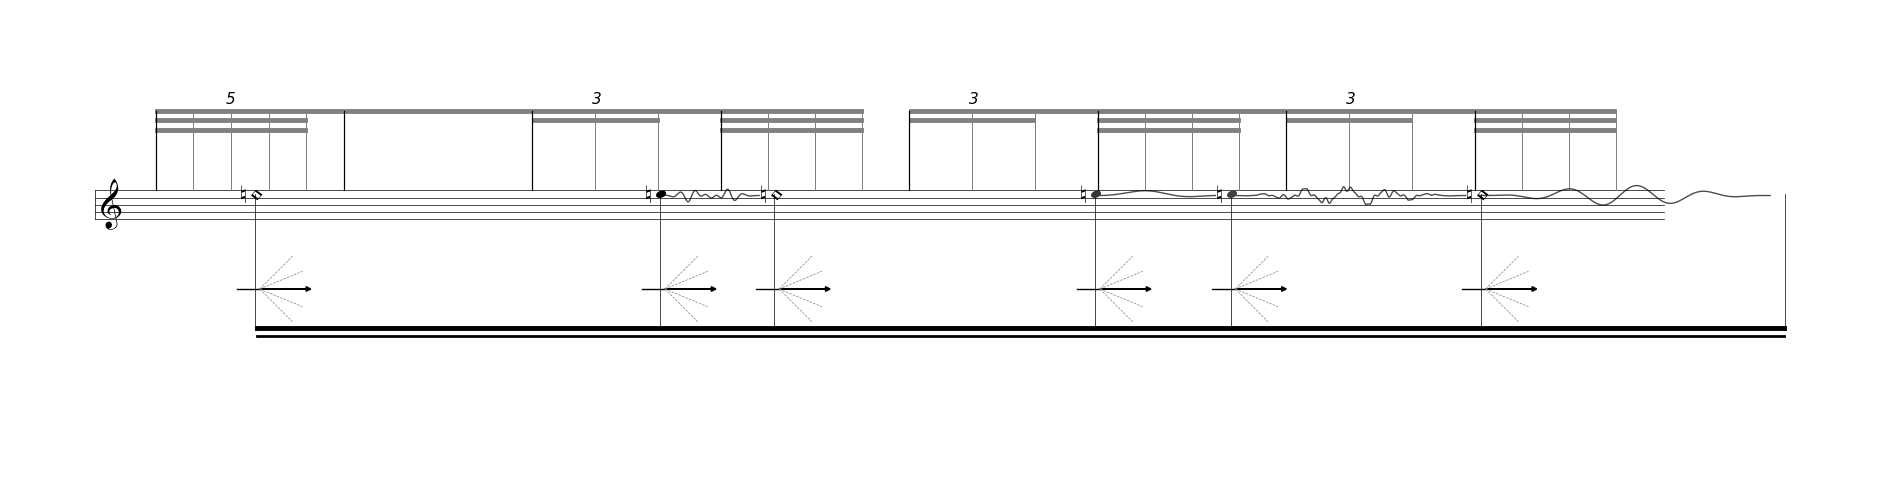

x_data after extend:  [0.004057353653777996, 1.3978478248055126, 2.7788899026539853]
y_data:  [0, 1, 2]
y_std_dev:  2
touch_deviation:  0.01285158518076751
touch_deviation:  0.01285158518076751
feature:  1
y_data after:  [4.5, 9.0, 12.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [0.004057353653777996, 1.3978478248055126, 2.7788899026539853]
x_off 1.61
x_data:  [0.004057353653777996, 1.3978478248055126, 2.7788899026539853]
accidental_deviation:  3.2605912336282272
acc_std_dev:  7.336330275663511
angles:  [-1.8, -10.2, 4.5]
inset_data_x:  [1.214057353653778, 2.6078478248055124, 3.9888899026539852]
inset_data_y:  [0.33 0.33 0.33]
length:  1.2937904711517345
length:  1.2810420778484726


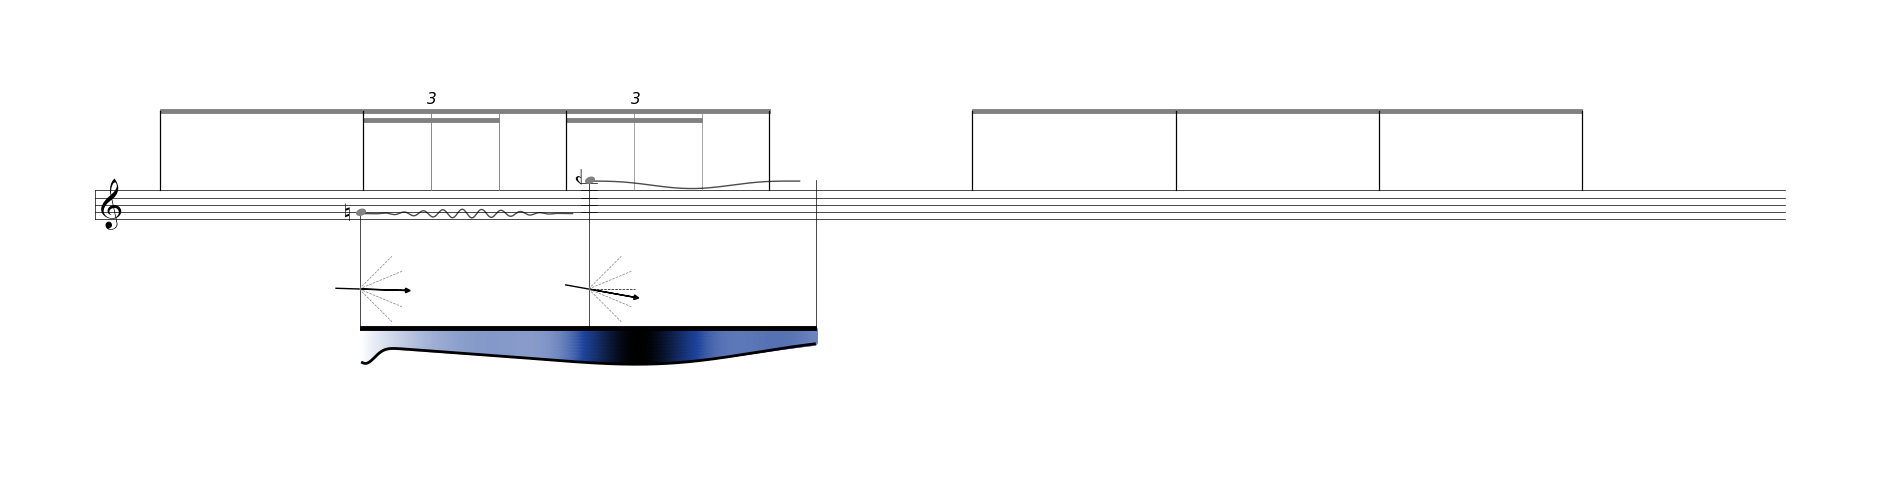

x_data after extend:  [-0.02802306778465734, 0.17458122418674465, 0.4067833505250939, 0.6390475206187173, 1.0064803988723976, 1.1561119795400716]
y_data:  [0, 1, 2, 3, 4, 5]
y_std_dev:  3
touch_deviation:  0.4498283379017759
touch_deviation:  0.4498283379017759
touch_deviation:  0.4498283379017759
touch_deviation:  0.4498283379017759
touch_deviation:  0.4498283379017759
feature:  2
y_data after:  [0.0, 3.5, 7.0, 7.5, 7.0, 10.0]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.02802306778465734, 0.17458122418674465, 0.4067833505250939, 0.6390475206187173, 1.0064803988723976, 1.1561119795400716]
x_off 1.37
x_data:  [-0.02802306778465734, 0.17458122418674465, 0.4067833505250939, 0.6390475206187173, 1.0064803988723976, 1.1561119795400716]
accidental_deviation:  5.81819964500974
acc_std_dev:  13.090949201271913
angles:  [9.7, 5.3, -5.4, -9.1, -3.6, 4.3]
inset_data_x:  [0.9419769322153427, 1.1445812241867448, 1.376783350525094, 1.6090475206187174, 1.9764803988723978, 2.1261119795

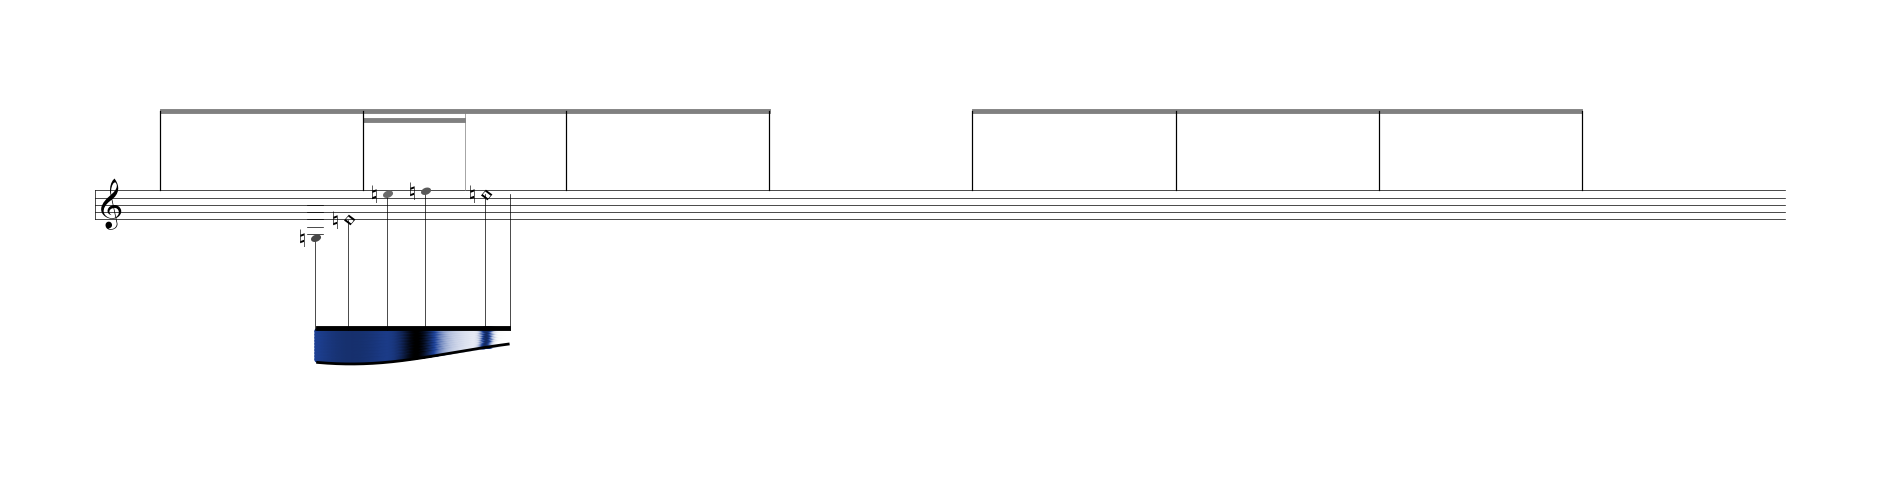

x_data after extend:  [-0.0004756285157328619, 1.3980391158558552, 2.9891535736895705]
y_data:  [0, 1, 2]
y_std_dev:  4
touch_deviation:  0.10785891845451209
touch_deviation:  0.10785891845451209
feature:  3
y_data after:  [-0.5, 9.0, -0.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.0004756285157328619, 1.3980391158558552, 2.9891535736895705]
x_off 1.12
x_data:  [-0.0004756285157328619, 1.3980391158558552, 2.9891535736895705]
accidental_deviation:  8.51199891356436
acc_std_dev:  19.15199755551981
angles:  [13.3, -28.2, -19.2]
inset_data_x:  [0.7195243714842672, 2.118039115855855, 3.7091535736895707]
inset_data_y:  [0.33 0.33 0.33]
length:  1.2985147443715879
length:  1.4911144578337152


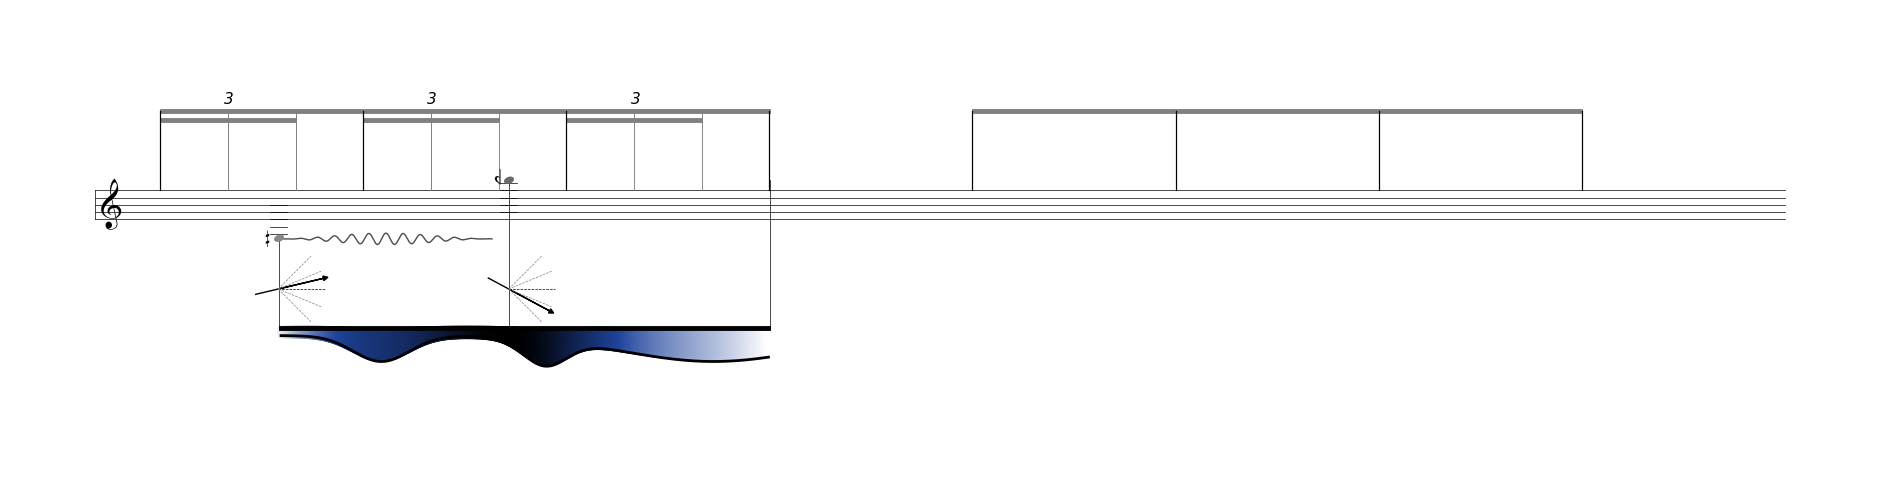

x_data after extend:  [0.3502163979016049, 1.9040270942203847, 2.911948203270779, 5.022783415065889]
y_data:  [0, 1, 2, 3]
y_std_dev:  5
touch_deviation:  0.319415261468067
touch_deviation:  0.319415261468067
touch_deviation:  0.319415261468067
feature:  4
y_data after:  [7.0, 2.5, 7.0, 7.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [0.3502163979016049, 1.9040270942203847, 2.911948203270779, 5.022783415065889]
x_off 2.08
x_data:  [0.3502163979016049, 1.9040270942203847, 2.911948203270779, 5.022783415065889]
accidental_deviation:  9.227642256134898
acc_std_dev:  20.76219507630352
angles:  [37.9, -9.7, -7.8, -8.5]
inset_data_x:  [2.0302163979016052, 3.584027094220385, 4.591948203270779, 6.702783415065889]
inset_data_y:  [0.33 0.33 0.33 0.33]
length:  1.4538106963187798
length:  0.9079211090503944
length:  2.0108352117951096


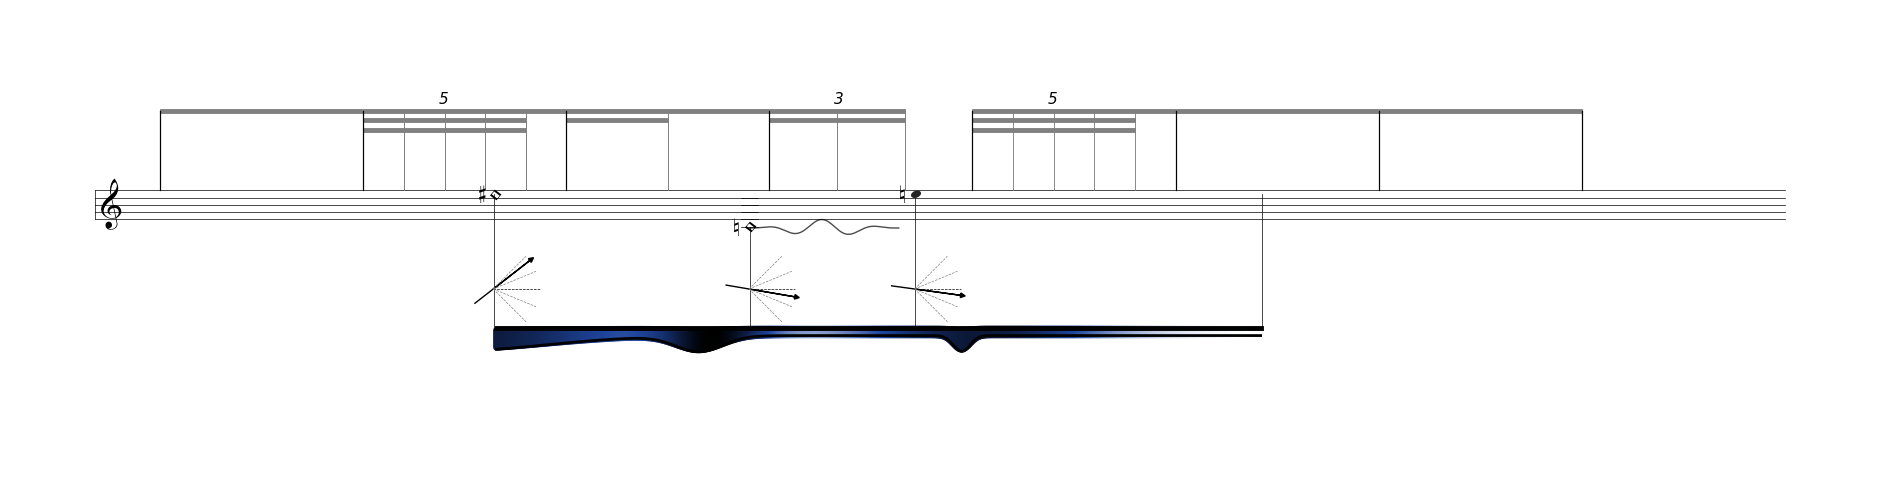

x_data after extend:  [0.22579544362296616, 0.8878912496369842, 1.495326871546057, 2.4239406390497145]
y_data:  [0, 1, 2, 3]
y_std_dev:  5
touch_deviation:  0.2597383455051917
touch_deviation:  0.2597383455051917
touch_deviation:  0.2597383455051917
feature:  5
y_data after:  [5.0, 14.0, 9.5, 9.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [0.22579544362296616, 0.8878912496369842, 1.495326871546057, 2.4239406390497145]
x_off 2.63
x_data:  [0.22579544362296616, 0.8878912496369842, 1.495326871546057, 2.4239406390497145]
accidental_deviation:  10.46327089126798
acc_std_dev:  23.542359505352955
angles:  [-13.9, 12.2, -7.0, 14.5]
inset_data_x:  [2.455795443622966, 3.117891249636984, 3.725326871546057, 4.653940639049715]
inset_data_y:  [0.33 0.33 0.33 0.33]
length:  0.5620958060140181
length:  0.5074356219090729
length:  0.8286137675036575


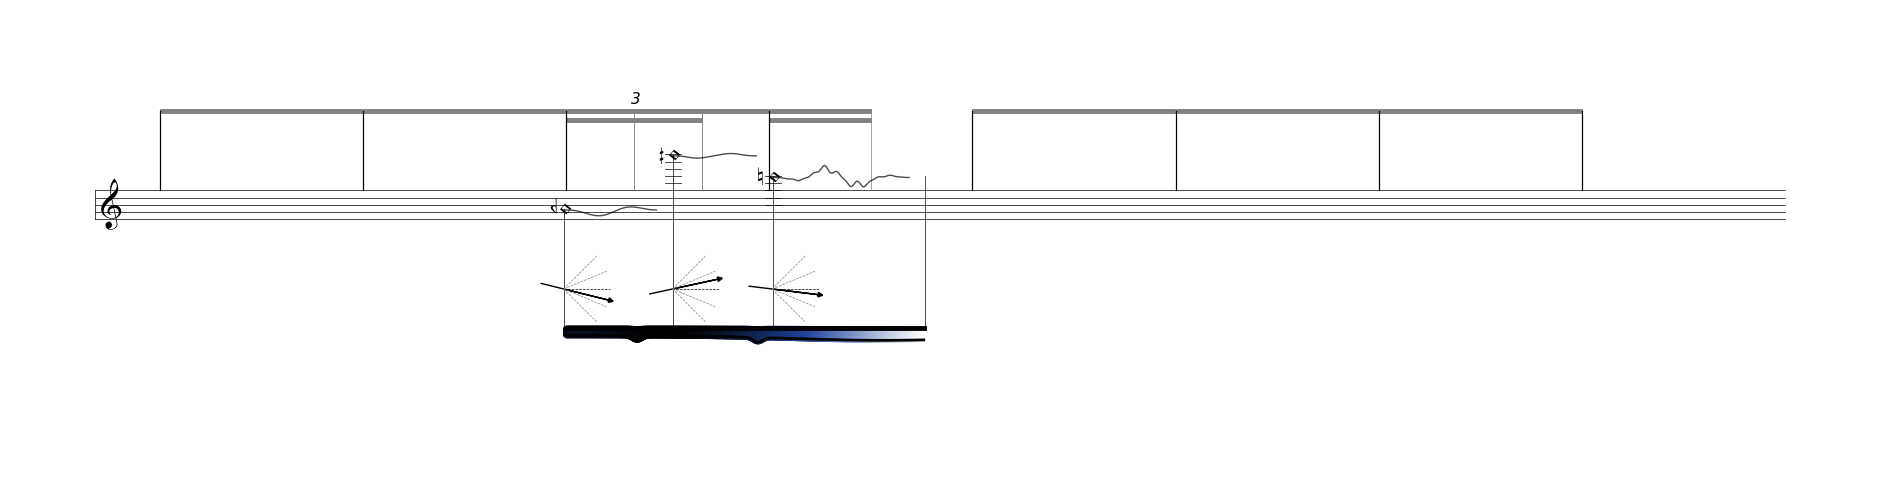

x_data after extend:  [-0.07021185040568184, 0.690763852580288, 1.5036262886979133, 1.9479838320616465]
y_data:  [0, 1, 2, 3]
y_std_dev:  4
touch_deviation:  0.1610052860441325
touch_deviation:  0.1610052860441325
touch_deviation:  0.1610052860441325
feature:  6
y_data after:  [6.5, 12.0, 9.5, 5.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.07021185040568184, 0.690763852580288, 1.5036262886979133, 1.9479838320616465]
x_off 1.21
x_data:  [-0.07021185040568184, 0.690763852580288, 1.5036262886979133, 1.9479838320616465]
accidental_deviation:  8.78555174665641
acc_std_dev:  19.76749142997692
angles:  [21.8, -17.4, -14.5, -23.2]
inset_data_x:  [0.7397881495943182, 1.500763852580288, 2.3136262886979133, 2.7579838320616465]
inset_data_y:  [0.33 0.33 0.33 0.33]
length:  0.6609757029859699
length:  0.7128624361176252
length:  0.34435754336373325


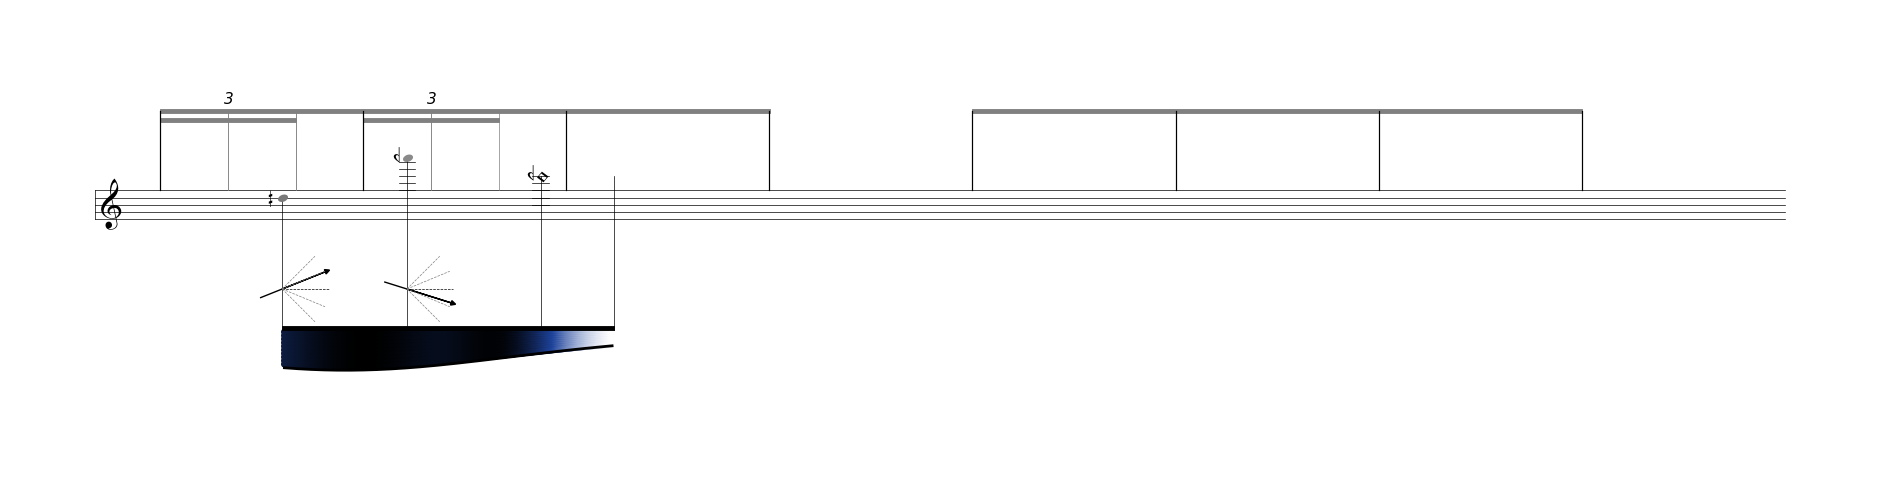

x_data after extend:  [-0.11615900654777997, 1.611236718762805, 3.6025629192752278, 5.320555847394335, 7.066126594050255, 8.836144216767039]
y_data:  [0, 1, 2, 3, 4, 5]
y_std_dev:  4
touch_deviation:  0.40751230398081423
touch_deviation:  0.40751230398081423
touch_deviation:  0.40751230398081423
touch_deviation:  0.40751230398081423
touch_deviation:  0.40751230398081423
feature:  7
y_data after:  [4.0, 6.5, 13.0, -1.0, 9.5, 9.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.11615900654777997, 1.611236718762805, 3.6025629192752278, 5.320555847394335, 7.066126594050255, 8.836144216767039]
x_off 2.79
x_data:  [-0.11615900654777997, 1.611236718762805, 3.6025629192752278, 5.320555847394335, 7.066126594050255, 8.836144216767039]
accidental_deviation:  8.407418598099694
acc_std_dev:  18.916691845724312
angles:  [21.7, 2.8, -31.7, 0.5, -5.9, -9.5]
inset_data_x:  [2.2738409934522203, 4.001236718762805, 5.992562919275228, 7.710555847394335, 9.456126594050255, 11.22614421676704]
ins

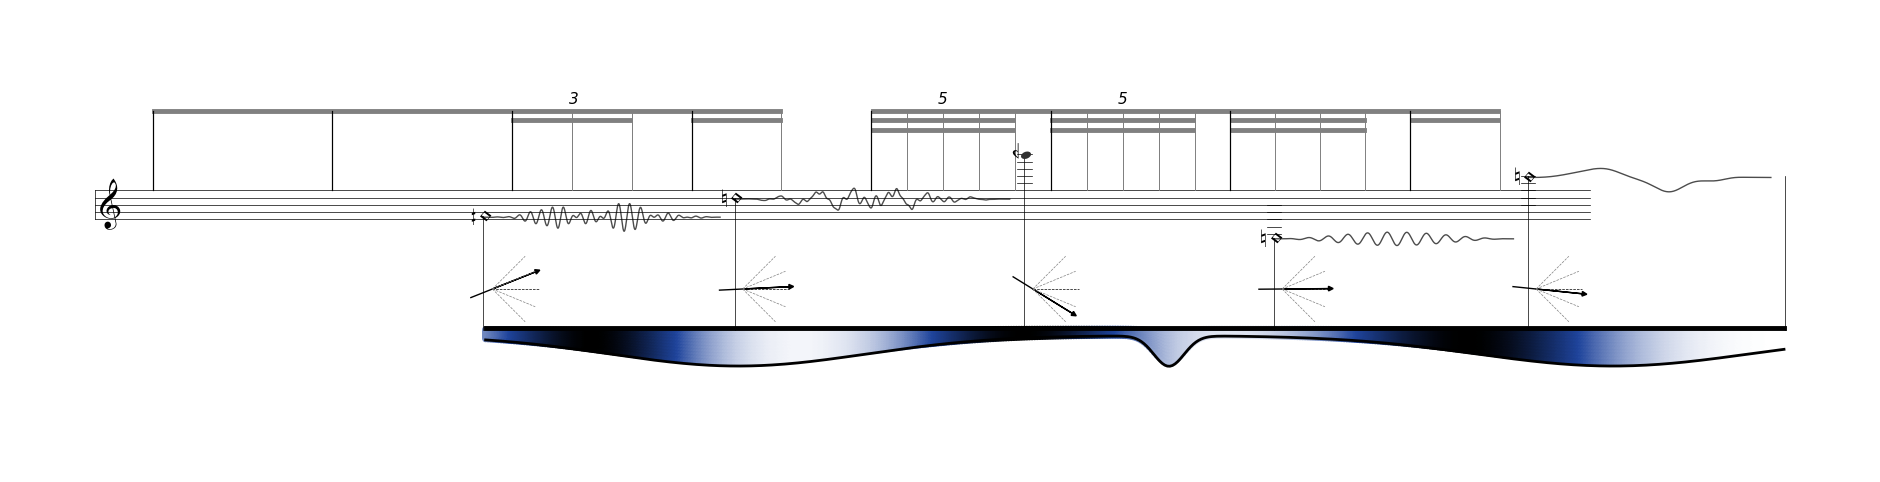

x_data after extend:  [-0.017971752911265206, 1.7963446613846783, 3.63686378723301, 5.560638950928575, 7.309273857571854]
y_data:  [0, 1, 2, 3, 4]
y_std_dev:  2
touch_deviation:  0.03803457890185166
touch_deviation:  0.03803457890185166
touch_deviation:  0.03803457890185166
touch_deviation:  0.03803457890185166
feature:  8
y_data after:  [7.0, 9.0, 5.5, 3.5, 10.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.017971752911265206, 1.7963446613846783, 3.63686378723301, 5.560638950928575, 7.309273857571854]
x_off 0.44
x_data:  [-0.017971752911265206, 1.7963446613846783, 3.63686378723301, 5.560638950928575, 7.309273857571854]
accidental_deviation:  4.593738509120248
acc_std_dev:  10.335911645520559
angles:  [-10.9, 3.8, 9.2, 12.6, 13.0]
inset_data_x:  [0.022028247088734774, 1.8363446613846783, 3.67686378723301, 5.600638950928575, 7.349273857571854]
inset_data_y:  [0.33 0.33 0.33 0.33 0.33]
length:  1.7143164142959435
length:  1.7405191258483315
length:  1.823775163695565
lengt

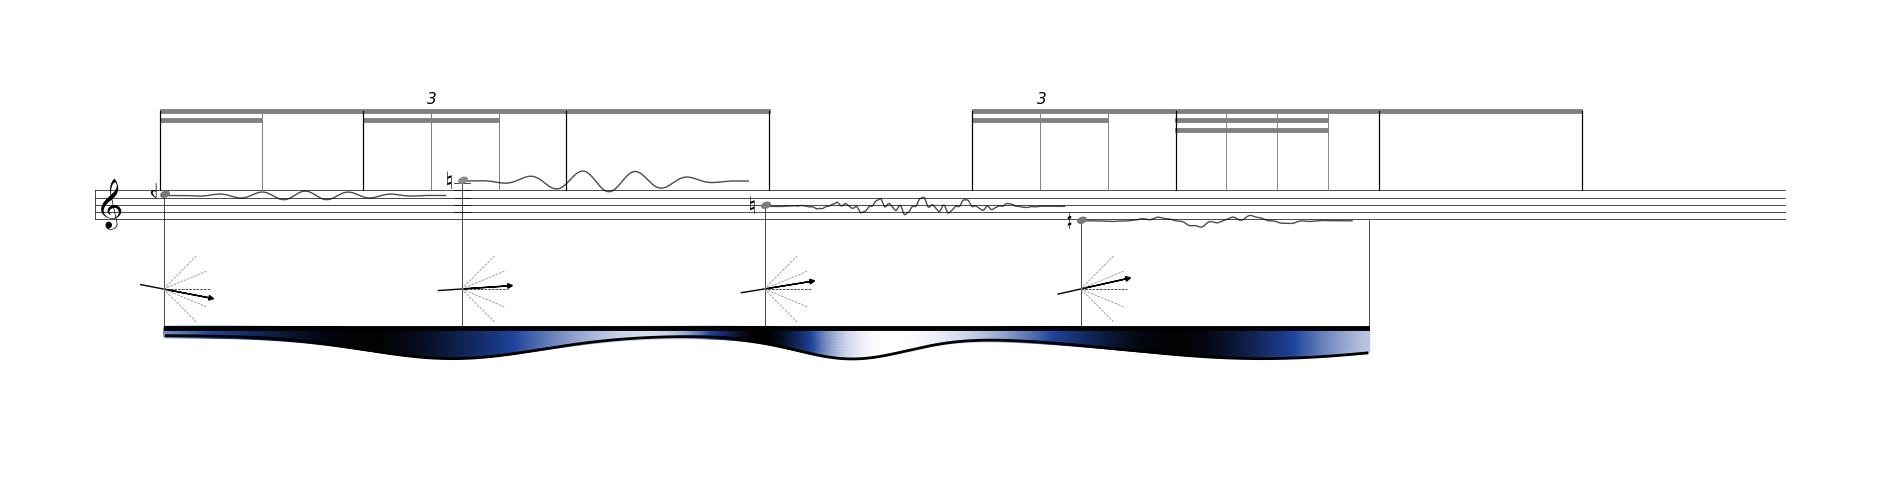

x_data after extend:  [-0.12683265081871997, 1.672981062562558, 2.1764250199166715, 3.507391537064033]
y_data:  [0, 1, 2, 3]
y_std_dev:  2
touch_deviation:  0.4918140125209208
touch_deviation:  0.4918140125209208
touch_deviation:  0.4918140125209208
feature:  9
y_data after:  [10.0, 10.0, 4.5, 8.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.12683265081871997, 1.672981062562558, 2.1764250199166715, 3.507391537064033]
x_off 2.51
x_data:  [-0.12683265081871997, 1.672981062562558, 2.1764250199166715, 3.507391537064033]
accidental_deviation:  3.2443138494912405
acc_std_dev:  7.299706161355291
angles:  [4.3, 5.8, 17.6, 4.3]
inset_data_x:  [1.9831673491812798, 3.782981062562558, 4.286425019916671, 5.617391537064033]
inset_data_y:  [0.33 0.33 0.33 0.33]
length:  1.6998137133812778
length:  0.4034439573541134
length:  1.2309665171473614


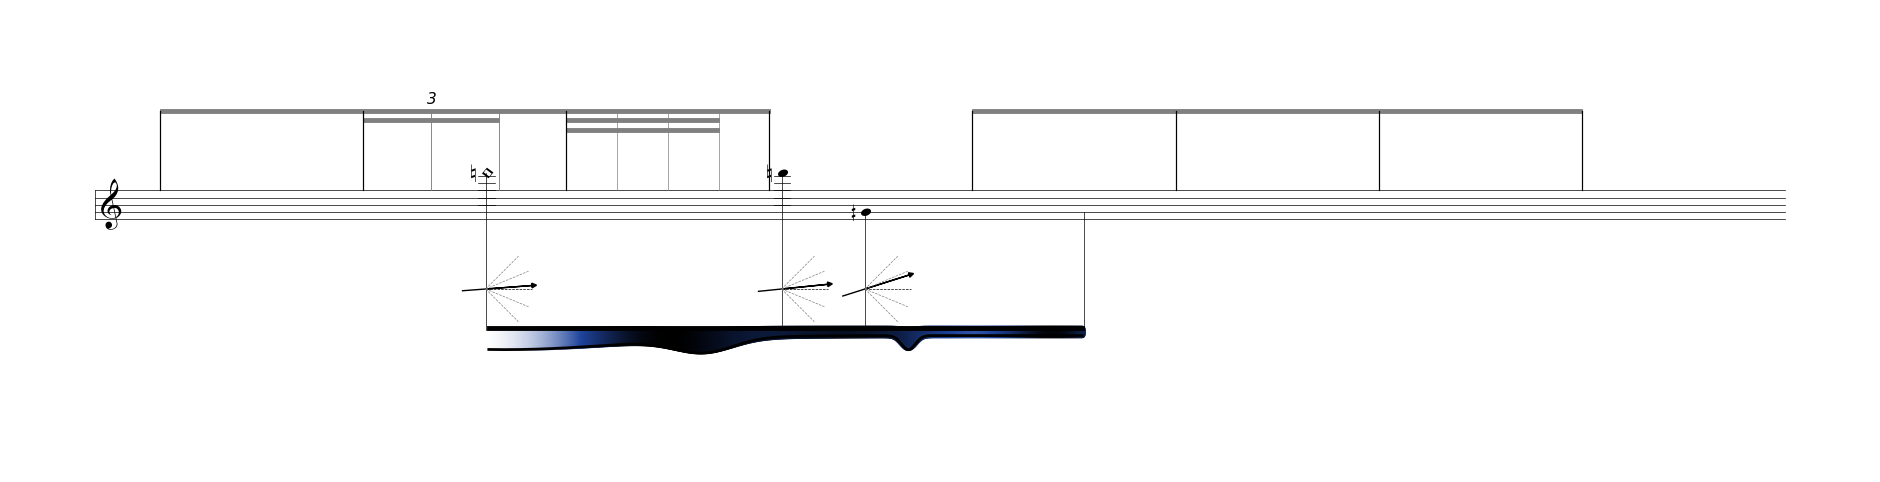

In [40]:
# seed1 = 99
np.random.seed(seed1)

extend_first = 0.0
extend_last = 0.0
# not using for the Durand piece
# dev = random.uniform(0.02, 0.1)
dev = 0
# acc_dev = random.uniform(0, 60)
acc_dev = 0


# tuplets = [5, 5, 5, 5, 5, 5, 5, 5]
# los_angles = [4.9, 23.4, 15.0, -12.2, 12.4, 0.0]


import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc

for feature in range(len(output_features)): #feature is here
  # create the figure and subplot:
  fig = plt.figure(figsize=(24, 6))

  ax = plt.subplot(1, 1, 1)

  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  phan_off = 0.46
  base_y = -15.1

  # staff lines
  X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)
  # measure lines
  X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, 0, 10)

  # notes:
  noteheads = ['f', ' ', 'O']
  # noteheads = ['O', ' ']

  notes = []
  touch_vals = []

  for i in range(len(noteheads)):
    notes.append(noteheads[i])

  # sec_offset = [0, 0] #3.07 threshold
  sec_offset = np.zeros(len(output_features)) #3.07 threshold

  speed_slider = output_features[feature][0]
  size_slider = output_features[feature][1]
  x_offset_sl = output_features[feature][2]
  y_offset_sl = output_features[feature][3]
  rhythm_deviation = output_features[feature][4]
  pitch_deviation = output_features[feature][5]
  touch_deviation =  output_features[feature][6]
  accidental_deviation = output_features[feature][7]
  amp_1_slider = output_features[feature][8]
  amp_2_slider = output_features[feature][9]
  amp_3_slider = output_features[feature][10]
  amp_mean1_slider = output_features[feature][11]
  amp_mean2_slider = output_features[feature][12]
  amp_mean3_slider = output_features[feature][13]
  amp_kurt1_but = output_features[feature][14]
  amp_kurt2_but = output_features[feature][15]
  amp_kurt3_but = output_features[feature][16]
  tamp_1_slider = output_features[feature][17]
  tamp_2_slider = output_features[feature][18]
  tamp_3_slider = output_features[feature][19]
  tamp_mean1_slider = output_features[feature][20]
  tamp_mean2_slider = output_features[feature][21]
  tamp_mean3_slider = output_features[feature][22]
  tamp_kurt1_but = output_features[feature][23]
  tamp_kurt2_but = output_features[feature][24]
  tamp_kurt3_but = output_features[feature][25]


  # x_off = x_offset_sl
  x_off = round(random.uniform(0.4, 3.0), 2)
  y_off = 0.0
  pitch_off = y_offset_sl

  # speed = speed_slider
  speed = round(random.uniform(0.2, 2.0), 2)
  # size = int(size_slider)
  size = random.randint(3, 7)

  ## Speed / rhythmic irregularity / textural direction
  x_mean = 0
  #@@rhy
  x_std_dev = rhythm_deviation
  # x_std_dev = 0.0
  min_dist = 0.1

  x_data = list(range(size))
  x_data = [x + np.random.normal(x_mean, x_std_dev) for x in x_data]

  ##@@@@RHYTHM
  # x_off, speed = adjust_xbound(x_off, speed)

  x_data = [i*speed for i in x_data]

  # x_data = [-0.07719044686628479, 0.3, 0.35, 0.6]

  # Ensure the sequence is strictly increasing
  for i in range(1, len(x_data)):
      if x_data[i] <= x_data[i - 1]:
          x_data[i] = x_data[i - 1] + 0.001  # Adjust as needed
  # keep min dist
  for i in range(1, len(x_data)):
    if x_data[i] - x_data[i-1] <= min_dist:
      x_data[i] = x_data[i] + 0.1


  for i in range(1, len(x_data)):
    x_data[i] = x_data[i] + extend_first
  x_data[-1] =x_data[-1] + extend_last
  print("x_data after extend: ", x_data)

#@@@@PITCHES!
  y_data = list(range(size))

  print("y_data: ", y_data)

  y_min, y_max = 1.0, 12.5

  y_mean = np.mean([y_min,y_max])

  #@@pitch
  y_std_dev = pitch_deviation
  # y_std_dev = 0.0 #test
  # y_std_dev = 0.3 #test

  y_std_dev = round(y_std_dev * (y_max)*2)
  print("y_std_dev: ", y_std_dev)

  y_data = np.random.normal(y_mean, y_std_dev, size=size)

  # y_data = [y_max] * size #for testing


  # to avoid only notes on spaces
  def half_resolution(number):
    return round(number * 2) / 2

  y_data = [half_resolution(y) for y in y_data]

  touch_min, touch_max = 0.0, 1.0
  touch_mean = np.mean([touch_min, touch_max])

  touch_std_dev = touch_deviation
  touch_vals = np.random.normal(touch_mean, touch_std_dev, size=size)
  touch_vals = np.clip(touch_vals, 0.0, 1.0) #dirty solution

  for i in range(size-1):
    pitch = y_data[i]+pitch_off
    touch_val = touch_vals[i]

    if pitch < y_min:
      pitch = y_min
    elif pitch > y_max:
      pitch = y_max

    pitch_offset = -3.55 # change this
    rhythms = x_data
    rhythm = rhythms[i] # THIS IS WEIRD
    ledger_off_low = (pitch+pitch_offset)+0.55
    # ledger_off_low = (pitch+pitch_offset)
    ledger_off_hi = (pitch+pitch_offset)-4.45
    # ledger_off_hi = (pitch+pitch_offset)


    # ledger lines
    L1_x, L1_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_low)
    L2_x, L2_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_hi)


  #### MELODY
    # grayscale value between 0.0 (black) and 1.0 (white)
    # touch_val = 0.0

    print("touch_deviation: ", touch_deviation)

    if touch_val >= 0.6:
      plt.text(
          (rhythm + 0.035) + x_off + sec_offset[feature],
          pitch + pitch_offset,
          notes[2],
          fontproperties=fontprop1,
          size=27,
          color="black"
      )
    else:
      plt.text(
          (rhythm + 0.035) + x_off + sec_offset[feature],
          pitch + pitch_offset,
          notes[0],
          fontproperties=fontprop2,
          color=str(touch_val)  # Convert the float to a string for grayscale color
      )

    # plt.text((rhythm + 0.033)+x_off+sec_offset[feature], pitch+pitch_offset, 'O', fontproperties=fontprop1, color='black', size=26)

    # plt.text((rhythm + 0.008)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # stems
    ax.plot(np.linspace(rhythm+x_off+sec_offset[feature] + 0.06, rhythm+x_off+sec_offset[feature] + 0.06, 10), np.linspace((pitch+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # ledger lines
    if pitch < 3.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch < 3.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')
    if pitch > 8.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch > 8.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

  # last stems
  print("feature: ", feature)
  print("y_data after: ", y_data)

  ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10),
          np.linspace((y_data[-2]+pitch_off+(pitch_offset)), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # elif feature == 1:
  #   ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10),
  #           np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y+1.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # plot the staff lines
  for i in range(5):
      ax.plot(X_1, y_off + Y_1 + i, linestyle='solid', linewidth=0.5, color='black')

  # clef!
  plt.text(0.1, 0.9 + y_off, '&', fontproperties=fontprop1)
  # plt.text(0.1, 2.8 + y_off, '?', fontproperties=fontprop1)

  # plot the measure lines and lower beams:
  ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
  ax.plot(np.linspace((x_data[0])+x_off+0.075+sec_offset[feature], (x_data[size-1])
    + x_off+0.05+sec_offset[feature], 10), np.linspace(base_y, base_y, 10), linestyle='solid', linewidth=3.5, color='black')

  # #|extra pitch
  # plt.text((x_data[2] + 0.055)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 4+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 7+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[0] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[1] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[3] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[4] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # #extra acc|
  # ax.text((x_data[0] + 0.035)+x_off+sec_offset[feature]-0.1, 3+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text((x_data[3] + 0.035)+x_off+sec_offset[feature]-0.1, 5+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')

  ## @@@BEZIER!
  ## Slur w/ Bezier curve

  # Existing start and end points
  y_edit = -2.0
  # y_edit = 2.0
  right_curve_end = 0
  x_start, y_start = x_data[0] + x_off + sec_offset[feature], (y_data[0]+pitch_off) + y_off + y_edit
  x_end, y_end = x_data[size-1] + x_off + sec_offset[feature]+0.1,(y_data[size-1]+pitch_off) + y_off - 2 + y_edit+right_curve_end

  # Calculate the midpoint
  mid_x, mid_y = (x_start + x_end) / 2, (y_start + y_end) / 2

  # Control point height (distance from midpoint)
  # control_height = 20 # Adjust this value as needed for symmetry
  control_height = 25 # Adjust this value as needed for symmetry
  # Determine the control point position
  # Assuming you want the curve to bulge upwards
  control1_x, control1_y = mid_x-2, mid_y + control_height
  control2_x, control2_y = mid_x+2, mid_y + control_height

  # Define the path of the cubic Bezier curve
  path = mpatches.Path([(x_start, y_start),
                        (control1_x, control1_y),
                        (control2_x, control2_y),
                        (x_end, y_end)],
                        [mpatches.Path.MOVETO, mpatches.Path.CURVE4, mpatches.Path.CURVE4, mpatches.Path.CURVE4])


  # x_start, y_start = x_data[0]+ x_off-0.45+sec_offset[feature], y_data[0]+y_offset_slider.value
  # x_end, y_end = x_data[size-1]+ x_off-0.45+sec_offset[feature], y_data[size-1]+y_offset_slider.value

  # # control points for the Bezier
  # control_x, control_y = (x_data[0] + x_data[size-1])+x_off-0.45+sec_offset[feature] - 0.5, (y_data[0]+y_offset_slider.value) + 32

  # # path of the Bezier
  # path = mpatches.Path([(x_start+0.45, y_start-1.0),
  #                       (control_x-2, control_y),
  #                       (x_end+0.5, y_end-1.0)], [1, 3, 3], closed=False) #[1, 3, 3]

  # patch = mpatches.PathPatch(path, edgecolor='black', facecolor='none', lw=0.5)

  # ax.add_patch(patch)


  # phantom rhythms:
  beat = 1.235
  # beat = 1.0

  beats = []
  for i in range(8):
    beats.append(beat*i)

  for i in range(len(beats)):
    if x_data[0]+x_off+sec_offset[feature] >= beats[i]:
      beat_start = math.floor(beats[i]/beat)
    if x_data[-1]+x_off+sec_offset[feature] >= beats[i]:
      beat_end = math.ceil(beats[i]/beat)

  divisions = [0.0]
  tuplet_val = []
  div_val = []
  true_div_val = []
  div_start = 0
  div_end = 0
  step = 1
  total = 0
  border = 0

# #@PHA
  for i in range(8):
    beats.append(beat*i)
    tuplet_val.append(random.choice([1, 2, 3, 4, 5]))
    # tuplet_val.append(2)
    # tuplet_val = tuplets
    if i < beat_start or i > beat_end-1:
      tuplet_val[i] = 1

    div_val.append(1/tuplet_val[i])
    true_div_val.append(beat*div_val[i])

    for j in range(tuplet_val[i]):
      total += true_div_val[i]
      divisions.append(total)

  divisions = divisions[:-1]

  for i in range(beat_start, beat_end, step):
    p1 = beats[i]
    font = {'style': 'italic', 'size': 11}
    pair = [p1, p1+(true_div_val[i]*(tuplet_val[i]-1))] #true_div_val controls the interval
    border += tuplet_val[i]
    border = border+2 # dirty solution to take care of the missing stem in divisions.
    div_start = 0
    div_end = border
    beam_off = 0.01

    #lower and middle beams for phantoms
    if tuplet_val[i] == 1:
      pass
    if tuplet_val[i] == 2:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 3:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.85, 16, f'{tuplet_val[i]}', fontdict=font)
    elif tuplet_val[i] == 4:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 5:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.92, 16, f'{tuplet_val[i]}', fontdict=font)


  #phantom beams
  if beat_start <= 2 and beat_end <= 3:
    print('beat_start <= 2 and beat_end <= 3')
    if beat_start >= beat_end:
      beat_end == 3
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start > 3 and beat_end <= 8:
    print('beat_start > 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start < 3 and beat_end <= 8:
    print('beat_start < 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start <= 3 and beat_end >= 4:
    print('beat_start <= 3 and beat_end >= 4')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start >= 3 and beat_end > 8:
    print('beat_start > 3 and beat_end <= 8')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[8] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')


  #bold phantom stems on beats
  ax.plot(np.linspace(beats, beats, 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.8, color='black')
  # print("beats: ", beats[-1])


  ##############
  ### @TIMBRE@ ###

  ## MAIN CURVE FOR DYNAMICS
  curve_size = 500

  # Generate x values
  x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  phrase_length = ((x_data[size-1]+x_off+0.075)-(x_data[0]+x_off+0.05))
  print("x_data before timbre: ", x_data)

  if amp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif amp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif amp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if amp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif amp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif amp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66, 1.0])
  else:
      pass

  if amp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif amp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif amp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # amp slider values from sine
  # amp_mean slider values from cosine

  # Calculate the y values using the Gaussian functions
  y1 = (amp_1_slider*8) * np.exp(-(x - (amp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  y2 = (amp_2_slider*8) * np.exp(-(x - (amp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  y3 = (amp_3_slider*8) * np.exp(-(x - (amp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

#  # # Create the combined curve with multiple maxima
#   for i in range(size-1):
#     length = (x_data[i+1]-x_data[i])-0.1
#     y = y1 + y2 + y3

  # # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y = y1 + y2 + y3
    elif length < 0.6 and length >= 0.3:
      y = y1 + y2
    elif length < 0.3 and length >= 0.1:
      y = y1

  y = (-y) - 1.0 # invert, add space
  y = y + base_y

  print("x_off", x_off)


  ## CURVE FOR @TIMBRE@
  # Generate x values
  x_t = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  if tamp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif tamp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif tamp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif tamp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif tamp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif tamp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif tamp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # Calculate the y values using the Gaussian functions
  yt_1 = (tamp_1_slider*8) * np.exp(-(x - (tamp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  yt_2 = (tamp_2_slider*8) * np.exp(-(x - (tamp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  yt_3 = (tamp_3_slider*8) * np.exp(-(x - (tamp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

 # # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    y_t = yt_1 + yt_2 + yt_3

  # # Create the combined curve with multiple maxima
  # for i in range(size-1):
  #   length = (x_data[i+1]-x_data[i])-0.1
  #   if length >= 0.6:
  #     y_t = yt_1 + yt_2 + yt_3
  #   elif length < 0.6 and length >= 0.3:
  #     y_t = yt_1 + yt_2
  #   elif length < 0.3 and length >= 0.1:
  #     y_t = yt_1

  n = 10

  # Plot the main curve
  plt.plot(x+sec_offset[feature], y, linewidth=2, color='black')

  # Generate x values for interpolations
  base_x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off + 0.05, curve_size)
  interpolations = np.linspace(0, 1, n+2)[1:-1] # n+1 segments with n+2 points.
  interpolated_y = [np.interp(x, base_x, base_y + t * (y - base_y)) for t in interpolations] # vertical interpolations

  # ######
  # Define the color gradient range and values
  color_start = 'white'
  color_middle = '#1F449C'  # The specified blue color
  color_end = 'black'

  # # Create a linear color gradient colormap
  cmap = LinearSegmentedColormap.from_list('gradient', [color_start, color_middle, color_end])

  # # Normalize the y values to [0, 1]
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))

  # # Plot the curve with gradual change
  for i, interpolated_curve in enumerate(interpolated_y):
      color = cmap(y_norm)  # Calculate the color based on the normalized y values
      ax.scatter(x+sec_offset[feature], interpolated_curve, color=color, s=15)  # Adjust the marker size (scatter width) using the 's' parameter

  # Plot the interpolations
  plt.plot(x+sec_offset[feature], y, color='black', linewidth=0)
  for i, interpolated_curve in enumerate(interpolated_y):
      plt.plot(x+sec_offset[feature], interpolated_curve, color='black', alpha=0.0, linewidth=0)

  print("x_data: ", x_data)


##@@@ACCIDENTALS
  # los angles!
  angles = list(range(size))
  # accidental_deviation = 50
  acc_std_dev = accidental_deviation

  acc_min, acc_max = -45, 45
  acc_mean = np.mean([acc_min,acc_max])

  acc_std_dev = (accidental_deviation / 20) * (acc_max - acc_min) / 2

  print("accidental_deviation: ", accidental_deviation)
  print("acc_std_dev: ", acc_std_dev)

  angles = [round(np.random.normal(acc_mean, acc_std_dev),1) for angle in angles]

  for i in range(size):
    if angles[i] > 45:
      angles[i] = 45
    elif angles[i] < -45:
      angles[i] = -45
    else:
      angles[i]


  print("angles: ", angles)


  # inset_data_x = x_data
  # inset_data_x = [x_data[j]+(x_off+0.62) for j in range(len(x_data))]
  inset_data_x = [x_data[j]+(x_off-0.4) for j in range(len(x_data))]
  print("inset_data_x: ", inset_data_x)

  inset_data_y = np.full(size, 0.33)
  print("inset_data_y: ", inset_data_y)

  inset_width, inset_height = 0.17, 0.17

  for i, (angle) in enumerate(angles[:size-1]):

    # Convert this position to display coordinates
    coords = ax.transData.transform(np.column_stack((inset_data_x, inset_data_y)))

    trans_coords = fig.transFigure.inverted().transform(coords)

    norm_coords_x = trans_coords[:, 0]
    # norm_coords_y = trans_coords[:, 1]

    adjusted_x = norm_coords_x[i]-0.048
    adjusted_y = inset_data_y[i]
    # print("adjusted_y", adjusted_y)

    inset_ax = fig.add_axes([adjusted_x, adjusted_y, inset_width, inset_height])
    # inset_ax.set_layout='tight'
    # Set limits and aspect for the inset axes
    inset_ax.patch.set_alpha(0.0)
    inset_ax.set_aspect('equal', adjustable='box')

    # Plot elements in the inset
    length = (x_data[i+1]-x_data[i])-0.1

    # Add a label for the angle
    pitch = y_data[i]+pitch_off

    # Dubious logic here. Angle doesn't need to be 0.0?
    # This doesn't affect the actual angle
    if pitch < y_min:
      label_x, label_y = x_data[i]+x_off-0.05, y_min+pitch_offset
      if angle < 0: # hinders lower than G3
        angle = 0
      else:
        angle
    elif pitch > y_max:
      label_x, label_y = x_data[i]+x_off-0.05, y_max+pitch_offset

    else:
      label_x, label_y = x_data[i]+x_off-0.05, pitch+pitch_offset

    angle_radians = np.radians(angle)

    # second = 171.429 #cents #7-TET
    second = 200 #cents
    cents = angle_radians/(np.pi/(2*second))

    x_acc = np.cos(angle_radians)
    y_acc = np.sin(angle_radians)

    acc_sym = ['n','#','b','B',u'µ']
    # label_sym = '+' if cents > 0 else ''
    # ax.text(label_x, label_y, f'{label_sym}{round(cents, 2)}¢', fontsize=10, color='red')

    # if length <= 0.0: #to cancel it out for the tonal part
    # if length >= 1.0: #for flute and violin
    if length >= 0.4: #for Spomenik Ib
    # if length >= 0.0: #for Spomenik Ib
      inset_ax.arrow(0, 0, x_acc, y_acc, head_width=0.1, head_length=0.1, color='black', linewidth=1)
      inset_ax.plot([0, (-x_acc/2)], [0, (-y_acc/2)], color='black', linewidth=1)

      inset_ax.plot([0, 1], [0, 0], color='black', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, 0], [0, 1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)
      inset_ax.plot([0, 0], [0, -1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)

      inset_ax.plot([0, np.cos(np.pi/4)], [0, np.sin(np.pi/4)], color='gray', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/4)], [0, np.sin(-np.pi/4)], color='gray', linestyle='--', linewidth=0.5)

      inset_ax.plot([0, np.cos(np.pi/8)], [0, np.sin(np.pi/8)], color='gray', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/8)], [0, np.sin(-np.pi/8)], color='gray', linestyle='--', linewidth=0.5)

      # leaving no gaps
      if angle > -10 and angle < 10: #0.0
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle >= 10 and angle < 37: #22.5
        ax.text(label_x, label_y, f' {acc_sym[4]}', fontproperties=fontprop2, fontsize=18, color='black')
      elif angle >= 37 and angle < 53: #45
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle <= -10 and angle > -37: #-22.5
        ax.text(label_x, label_y, f' {acc_sym[3]}', fontproperties=fontprop2, fontsize=18, color='black')
      elif angle <= -37 and angle > -53: #-45
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')

    else:
      if angle > -10 and angle < 10: #0.0
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle >= 10 and angle < 37: #22.5
        ax.text(label_x, label_y, f' {acc_sym[4]}', fontproperties=fontprop2, fontsize=18, color='black')
      elif angle >= 37 and angle < 53: #45
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle <= -10 and angle > -37: #-22.5
        ax.text(label_x, label_y, f' {acc_sym[3]}', fontproperties=fontprop2, fontsize=18, color='black')
      elif angle <= -37 and angle > -53: #-45
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')

      else:
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')

      # extra acc
      # ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')

    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

    # Hide spines for inset axes
    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['bottom'].set_visible(False)
    inset_ax.spines['left'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)

  # VIBRATO
    # ALL with Hann windows
    # with regularity or irregularity
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    print("length: ", length)
    if length >= 0.35:
      t = np.linspace(0, length, 5000, endpoint=False)  # controls length
      # car_freq = 2.0
      # am_freq = 3.0
      # fm_freq = 1.0
      # mul = 1.5

      car_freq = round(np.random.normal(2.0, 5.0), 2)
      am_freq = round(np.random.normal(2.0, 5.0), 2)
      fm_freq = round(np.random.normal(0.5, 1.0), 2)
      mul = round(np.random.uniform(0.5, 1.5), 2)

      car_sig = np.sin(car_freq * (2 * np.pi) * t)
      am_sig = np.sin(am_freq * (2 * np.pi) * t) * mul
      # am_sig = np.sin(0 * (2 * np.pi) * t) * mul #careful, *0!
      fm_sig = np.sin(fm_freq * (2 * np.pi) * t)
      # am_res = am_sig * car_sig
      fm_res = np.cos(car_sig + mul * fm_sig)
      window = np.hanning(len(am_sig))
      am_fm = am_sig * fm_res
      alpha_val = 0.7
      linewidth = 1

      ## vib can be based on random pick:
      # vib = round(np.random.normal(0.0, 1.0), 0)
      # vib = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
      vib = np.random.choice([-1.0, 0.0, 1.0])
      # vib = 1.0

      # without the loop:
      if vib == -1.0:
        am_fm = am_fm * window * 1.75
        # am_fm = am_sig * window
      elif vib == 0.0:
        alpha_val = 0.0
      elif vib == 1.0:
        am_fm = am_sig * window

      # if vib[i] == -1.0:
      #   am_fm = am_fm * window * 1.75
      # elif vib[i] == 0.0:
      #   alpha_val = 0.0
      # elif vib[i] == 1.0:
      #   am_fm = am_sig * window

      pitch = y_data[i]+pitch_off

      if pitch < y_min:
        ax.plot(x_data[i]+x_off+t+0.06, y_min+am_fm-3.7, 'Black', alpha=alpha_val, linewidth=linewidth)
        angle = 0.0
      elif pitch > y_max:
        ax.plot(x_data[i]+x_off+t+0.06, y_max+am_fm-3.7, 'Black', alpha=alpha_val, linewidth=linewidth)
      else:
        ax.plot(x_data[i]+x_off+t+0.06, pitch+am_fm-3.7, 'Black', alpha=alpha_val, linewidth=linewidth)


  # key signature
  # treble
  # ax.text(0.23, 4.0, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.27, 2.5, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.31, 4.5, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.35, 3.0, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.39, 1.5, '#', fontproperties=fontprop1, fontsize=18, color='black')

  # bass
  # ax.text(0.25, 3.0, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.3, 1.5, '#', fontproperties=fontprop1, fontsize=18, color='black')

  # Remove ticks from both main and inset axes
  ax.set_xticks([])
  ax.set_yticks([])

  # Set ylim for main axes
  ax.set_ylim(-35, 29)

  # Set tight layout
  # fig.set_tight_layout(True) #making this False fixes it...

  # Suppress warnings if necessary
  warnings.filterwarnings("ignore", category=UserWarning)
  plt.show()
  fig.savefig(f'vln{i}.svg', format='svg')

# #save if you want
# filename = f'notation.pdf'
# plt.savefig(filename, format='pdf')
# fig.savefig('musical_notation.png', format='png', dpi=1200)

# print("RHYTHM DEVIATION: ", rhythm_deviation)
# print("PITCH DEVIATION: ", pitch_deviation)








##VIBES

x_data after extend:  [-0.04908875906919594, 0.24389219825027242, 0.7093499147297917, 1.1957929918225478, 1.4685224849498983, 1.966769339389817, 2.4142144593705517]
y_data:  [0, 1, 2, 3, 4, 5, 6]
y_std_dev:  0
feature:  0
y_data after:  [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.04908875906919594, 0.24389219825027242, 0.7093499147297917, 1.1957929918225478, 1.4685224849498983, 1.966769339389817, 2.4142144593705517]
x_off 1.27
x_data:  [-0.04908875906919594, 0.24389219825027242, 0.7093499147297917, 1.1957929918225478, 1.4685224849498983, 1.966769339389817, 2.4142144593705517]
accidental_deviation:  0.0
acc_std_dev:  0.0
angles:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
inset_data_x:  [0.820911240930804, 1.1138921982502725, 1.5793499147297916, 2.0657929918225477, 2.3385224849498982, 2.836769339389817, 3.284214459370552]
inset_data_y:  [0.33 0.33 0.33 0.33 0.33 0.33 0.33]


<ipython-input-41-1999d8941b58>:545: RuntimeWarning: invalid value encountered in divide
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))


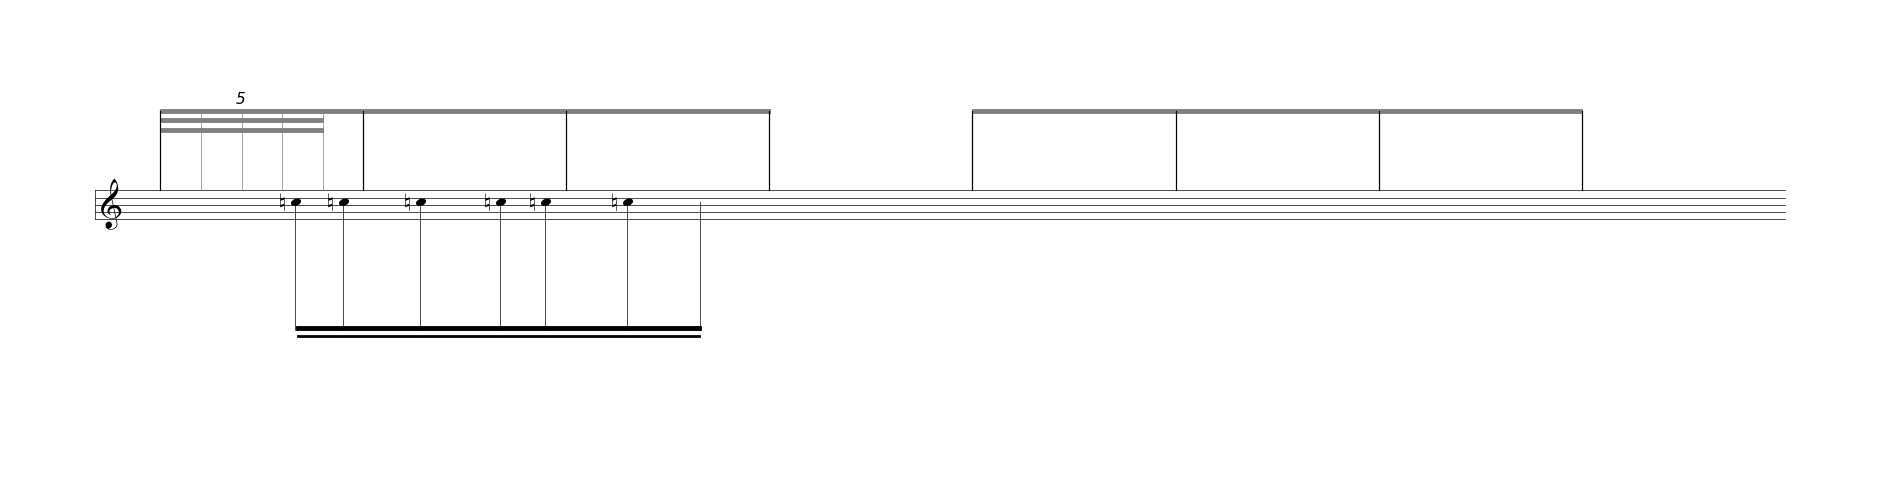

x_data after extend:  [0.0015451820027919773, 0.7278962351853552, 1.4637910559767033, 2.1861762395196247]
y_data:  [0, 1, 2, 3]
y_std_dev:  1
feature:  1
y_data after:  [5.0, 5.5, 4.5, 6.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [0.0015451820027919773, 0.7278962351853552, 1.4637910559767033, 2.1861762395196247]
x_off 0.68
x_data:  [0.0015451820027919773, 0.7278962351853552, 1.4637910559767033, 2.1861762395196247]
accidental_deviation:  3.2605912336282272
acc_std_dev:  7.336330275663511
angles:  [5.6, 8.2, -8.0, 0.3]
inset_data_x:  [0.281545182002792, 1.0078962351853553, 1.7437910559767034, 2.4661762395196245]
inset_data_y:  [0.33 0.33 0.33 0.33]


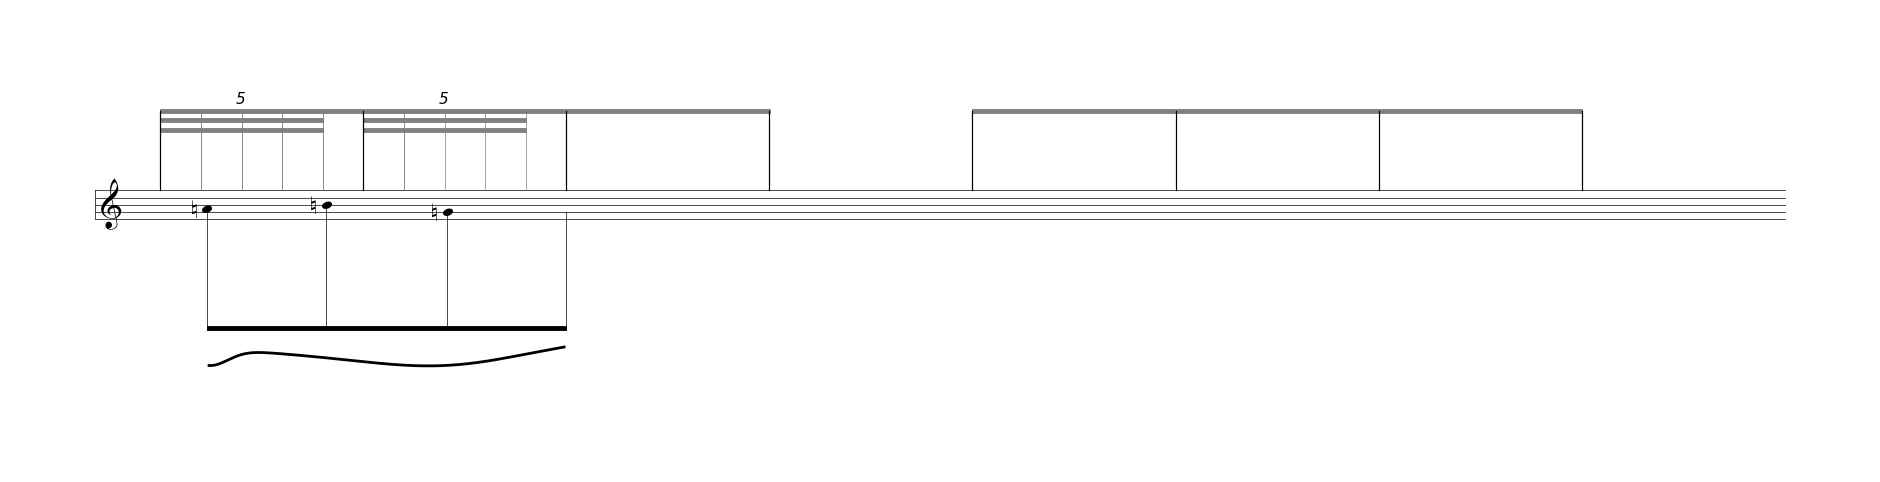

x_data after extend:  [0.03462089740976737, 0.28492075328605454, 0.3944085963550529, 0.5809049190273508]
y_data:  [0, 1, 2, 3]
y_std_dev:  3
feature:  2
y_data after:  [10.0, 9.0, 9.0, 6.0]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [0.03462089740976737, 0.28492075328605454, 0.3944085963550529, 0.5809049190273508]
x_off 2.03
x_data:  [0.03462089740976737, 0.28492075328605454, 0.3944085963550529, 0.5809049190273508]
accidental_deviation:  5.81819964500974
acc_std_dev:  13.090949201271913
angles:  [14.8, 1.0, -10.7, 9.3]
inset_data_x:  [1.6646208974097672, 1.9149207532860544, 2.0244085963550527, 2.2109049190273504]
inset_data_y:  [0.33 0.33 0.33 0.33]


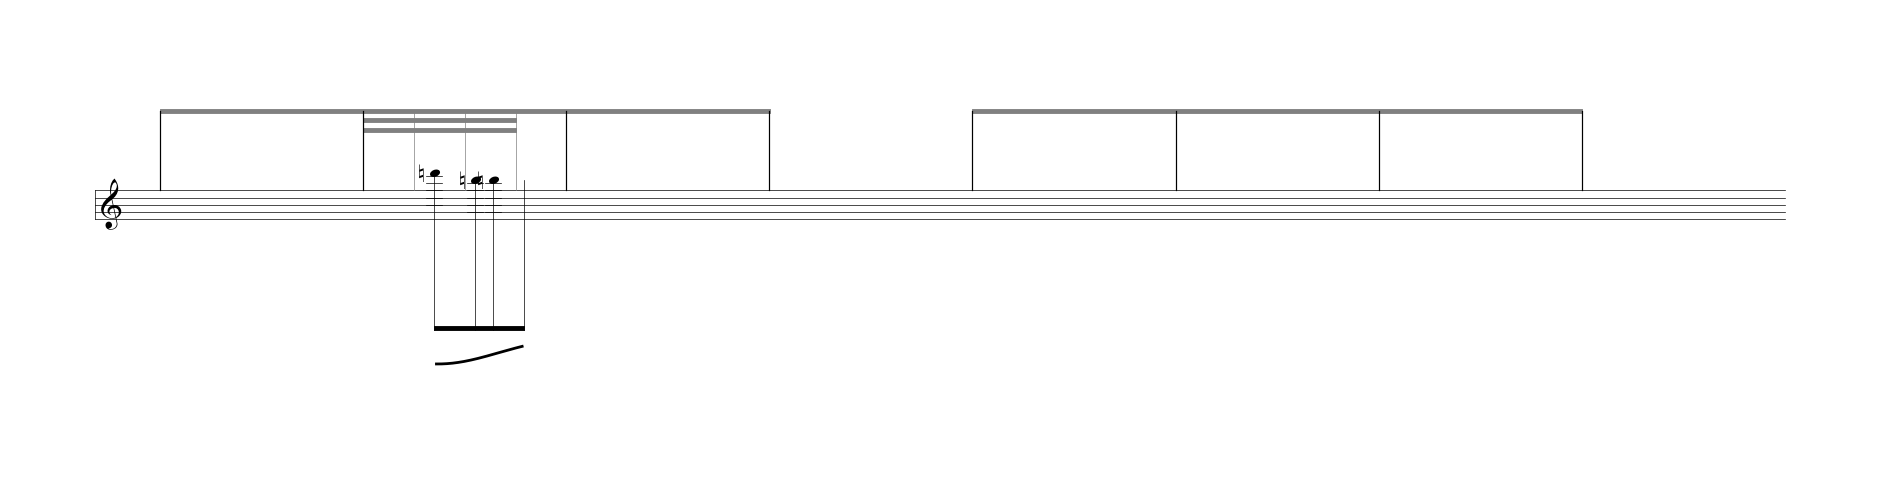

x_data after extend:  [-0.13944806099845766, 1.4304351688378918, 2.92099562986671, 4.483685975407479]
y_data:  [0, 1, 2, 3]
y_std_dev:  4
feature:  3
y_data after:  [5.5, 2.5, 4.5, 6.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.13944806099845766, 1.4304351688378918, 2.92099562986671, 4.483685975407479]
x_off 2.41
x_data:  [-0.13944806099845766, 1.4304351688378918, 2.92099562986671, 4.483685975407479]
accidental_deviation:  8.51199891356436
acc_std_dev:  19.15199755551981
angles:  [18.0, 7.6, 17.2, -21.6]
inset_data_x:  [1.8705519390015426, 3.440435168837892, 4.93099562986671, 6.4936859754074785]
inset_data_y:  [0.33 0.33 0.33 0.33]


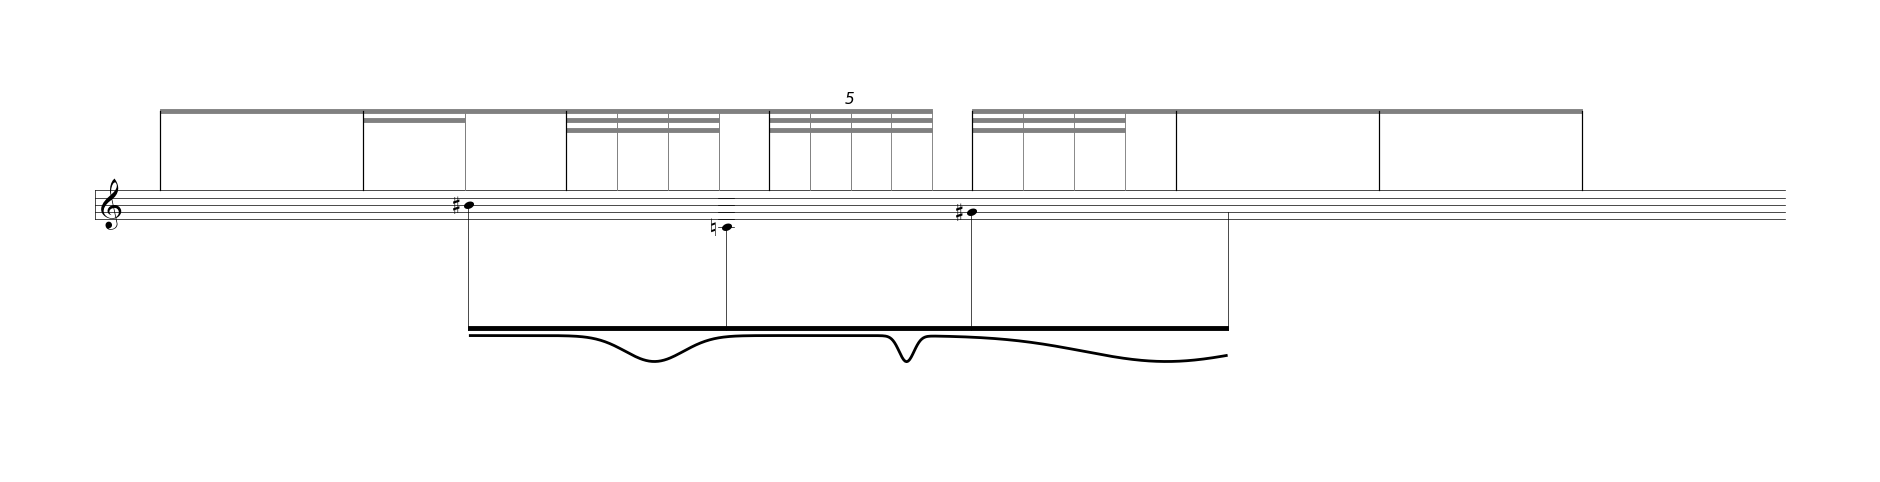

x_data after extend:  [-0.16990701160561325, 1.9371584471759913, 3.213050055611981, 5.083663886817426, 6.817100995876633, 8.170158531801398, 10.480656461913776]
y_data:  [0, 1, 2, 3, 4, 5, 6]
y_std_dev:  4
feature:  4
y_data after:  [4.5, 10.5, 7.5, 3.0, 8.0, 8.0, 4.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.16990701160561325, 1.9371584471759913, 3.213050055611981, 5.083663886817426, 6.817100995876633, 8.170158531801398, 10.480656461913776]
x_off 0.78
x_data:  [-0.16990701160561325, 1.9371584471759913, 3.213050055611981, 5.083663886817426, 6.817100995876633, 8.170158531801398, 10.480656461913776]
accidental_deviation:  9.227642256134898
acc_std_dev:  20.76219507630352
angles:  [8.1, 6.2, 7.7, 4.9, 32.3, 22.4, 16.8]
inset_data_x:  [0.21009298839438675, 2.3171584471759914, 3.593050055611981, 5.463663886817426, 7.1971009958766325, 8.550158531801399, 10.860656461913777]
inset_data_y:  [0.33 0.33 0.33 0.33 0.33 0.33 0.33]


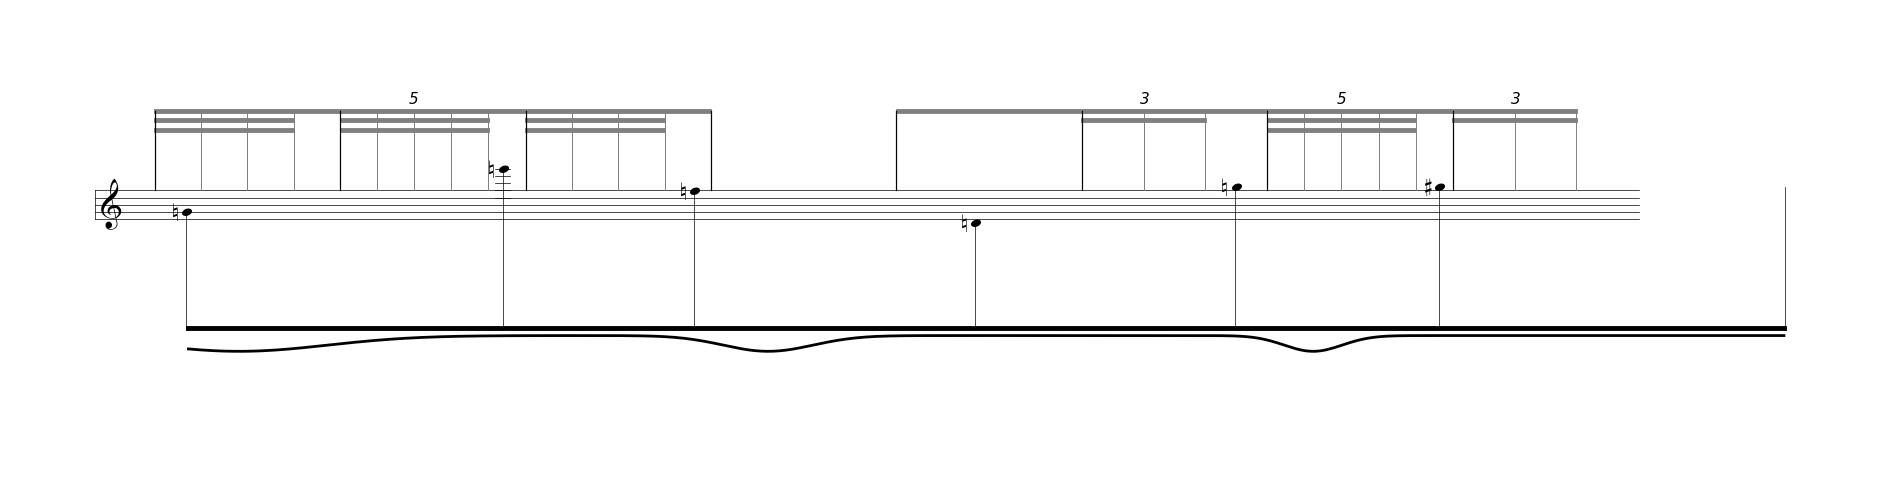

x_data after extend:  [0.5874293170709222, 2.0657119701679965, 3.960045776339053, 5.679541669571197]
y_data:  [0, 1, 2, 3]
y_std_dev:  5
feature:  5
y_data after:  [5.0, 6.0, 9.0, 11.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [0.5874293170709222, 2.0657119701679965, 3.960045776339053, 5.679541669571197]
x_off 1.68
x_data:  [0.5874293170709222, 2.0657119701679965, 3.960045776339053, 5.679541669571197]
accidental_deviation:  10.46327089126798
acc_std_dev:  23.542359505352955
angles:  [6.2, -1.3, -13.9, -21.1]
inset_data_x:  [1.867429317070922, 3.3457119701679963, 5.240045776339053, 6.9595416695711965]
inset_data_y:  [0.33 0.33 0.33 0.33]


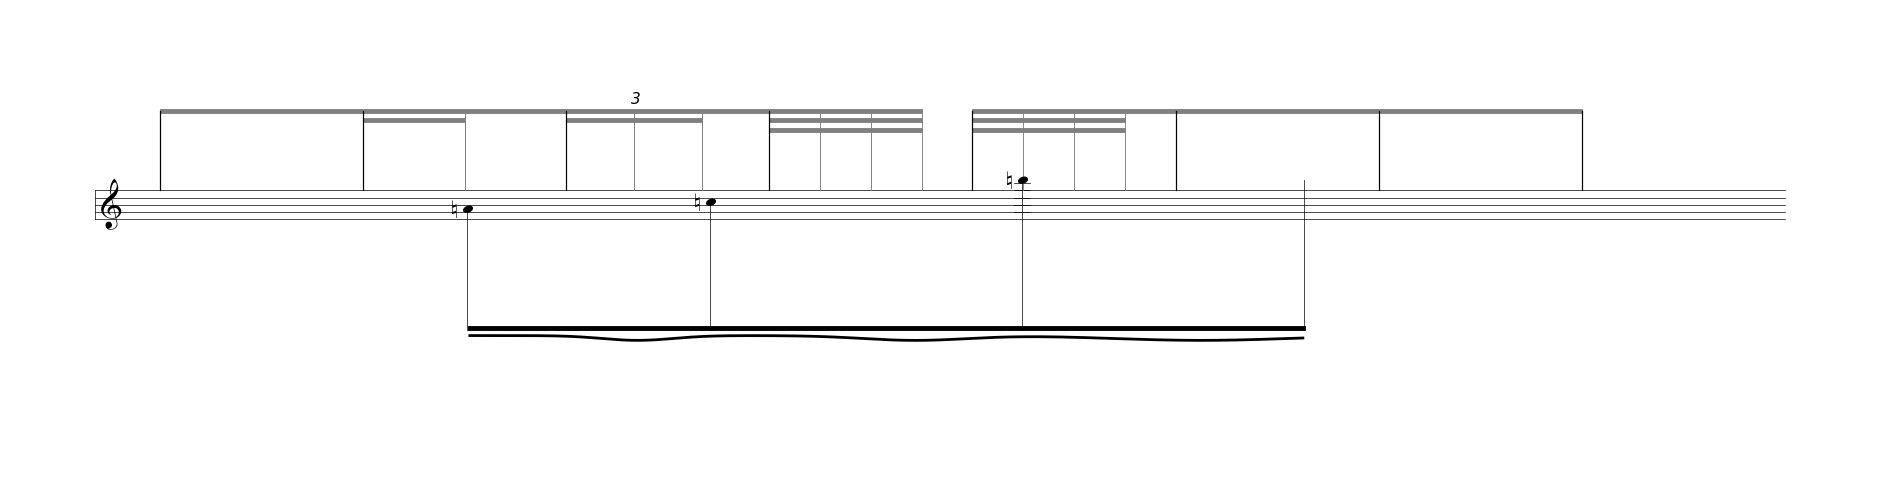

x_data after extend:  [0.21920121954112906, 1.899783577159078, 3.7666551494836304, 5.697365317428469, 7.831330959123741, 9.7138997711699]
y_data:  [0, 1, 2, 3, 4, 5]
y_std_dev:  4
feature:  6
y_data after:  [10.5, 3.5, 6.0, -1.0, 11.0, 7.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [0.21920121954112906, 1.899783577159078, 3.7666551494836304, 5.697365317428469, 7.831330959123741, 9.7138997711699]
x_off 1.24
x_data:  [0.21920121954112906, 1.899783577159078, 3.7666551494836304, 5.697365317428469, 7.831330959123741, 9.7138997711699]
accidental_deviation:  8.78555174665641
acc_std_dev:  19.76749142997692
angles:  [-16.4, -44.2, 11.9, -13.7, -13.7, 0.6]
inset_data_x:  [1.0592012195411291, 2.739783577159078, 4.606655149483631, 6.537365317428469, 8.671330959123742, 10.5538997711699]
inset_data_y:  [0.33 0.33 0.33 0.33 0.33 0.33]


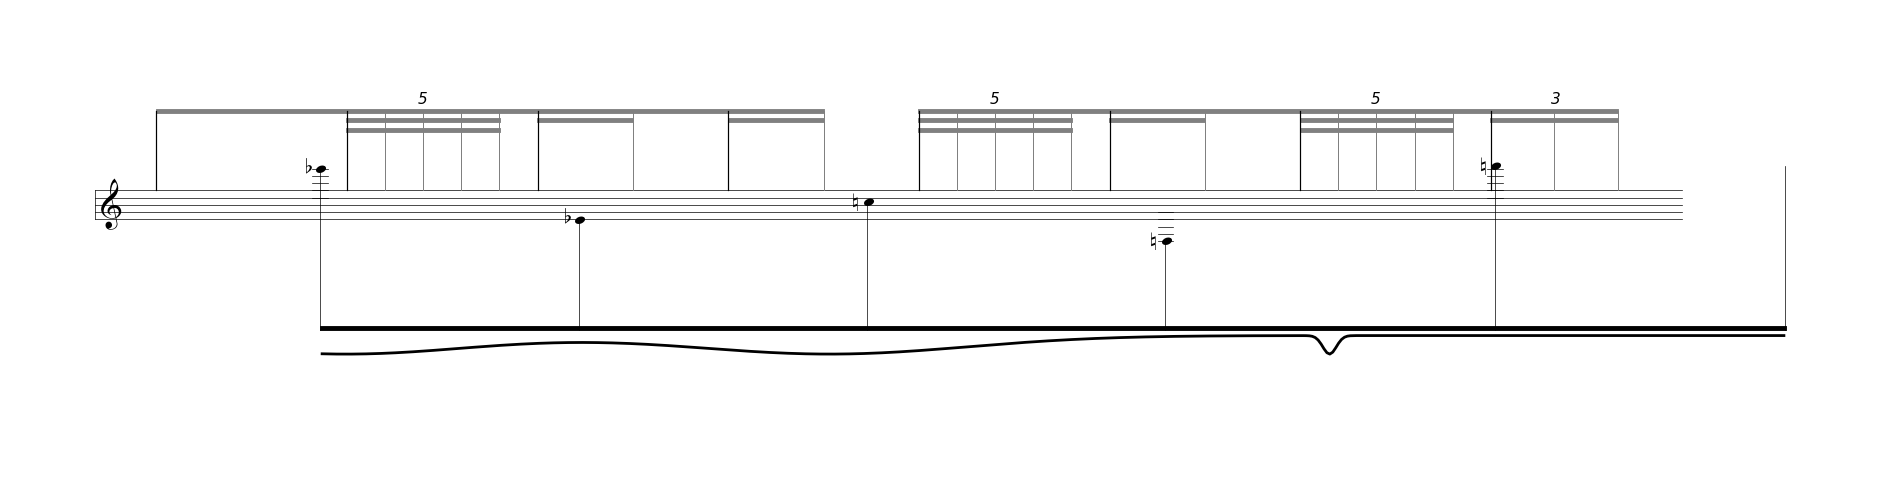

x_data after extend:  [-0.8043564569005622, 1.6823753622973998, 3.262166216904279, 5.109096714302789, 7.217160561842037]
y_data:  [0, 1, 2, 3, 4]
y_std_dev:  4
feature:  7
y_data after:  [7.5, -2.5, 3.0, -0.5, 3.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.8043564569005622, 1.6823753622973998, 3.262166216904279, 5.109096714302789, 7.217160561842037]
x_off 2.09
x_data:  [-0.8043564569005622, 1.6823753622973998, 3.262166216904279, 5.109096714302789, 7.217160561842037]
accidental_deviation:  8.407418598099694
acc_std_dev:  18.916691845724312
angles:  [-5.8, 29.0, 6.2, -21.1, -10.1]
inset_data_x:  [0.8856435430994377, 3.3723753622974, 4.9521662169042795, 6.79909671430279, 8.907160561842037]
inset_data_y:  [0.33 0.33 0.33 0.33 0.33]


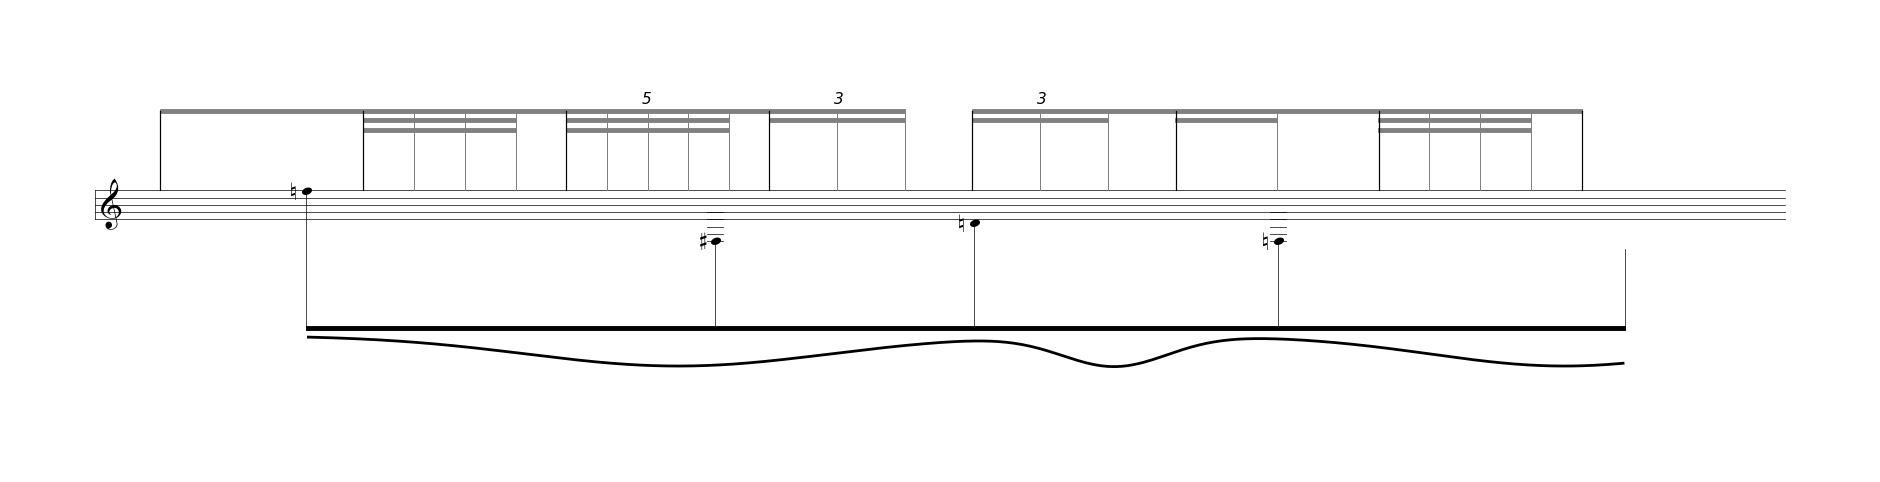

x_data after extend:  [-0.00019705359987977206, 0.3800028485363817, 0.7608114028933037]
y_data:  [0, 1, 2]
y_std_dev:  2
feature:  8
y_data after:  [8.5, 5.5, 8.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.00019705359987977206, 0.3800028485363817, 0.7608114028933037]
x_off 1.3
x_data:  [-0.00019705359987977206, 0.3800028485363817, 0.7608114028933037]
accidental_deviation:  4.593738509120248
acc_std_dev:  10.335911645520559
angles:  [-15.9, 6.4, -0.2]
inset_data_x:  [0.8998029464001203, 1.2800028485363817, 1.6608114028933039]
inset_data_y:  [0.33 0.33 0.33]


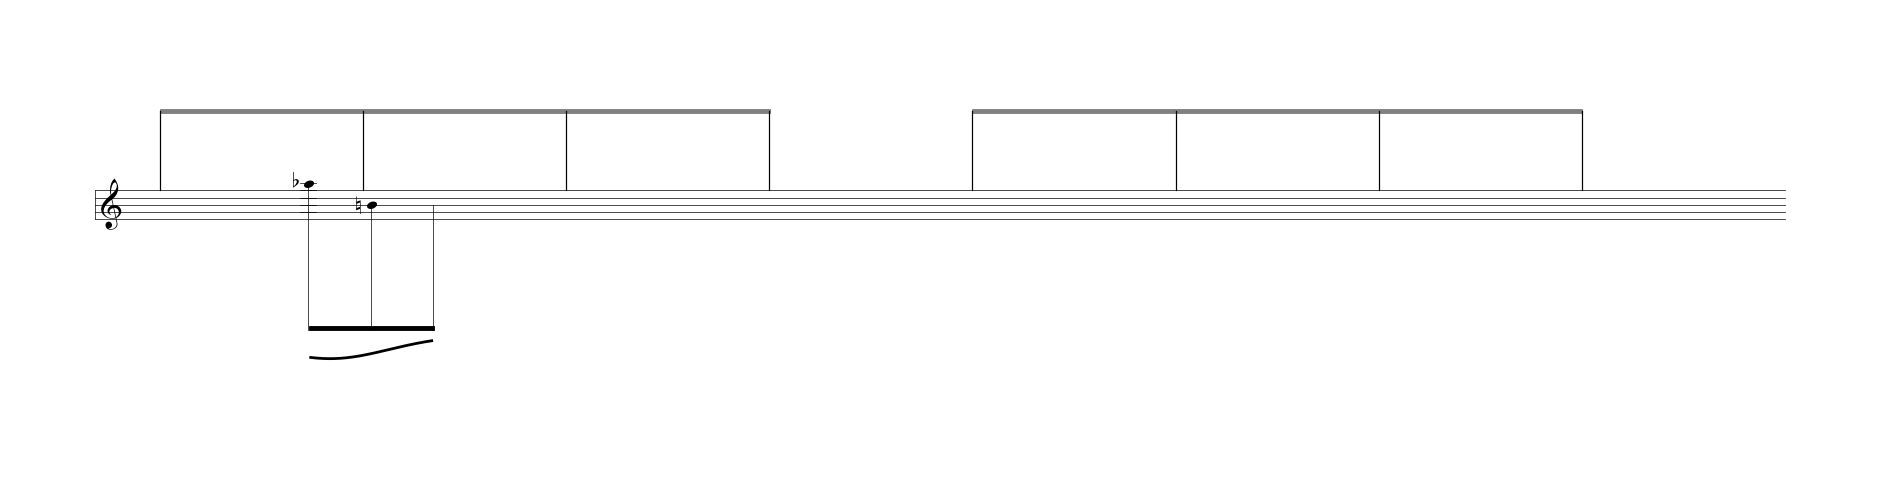

x_data after extend:  [0.02062813156819024, 0.9797575940432867, 2.259440586670425, 3.6537147895106212]
y_data:  [0, 1, 2, 3]
y_std_dev:  1
feature:  9
y_data after:  [5.0, 7.0, 8.5, 3.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [0.02062813156819024, 0.9797575940432867, 2.259440586670425, 3.6537147895106212]
x_off 0.87
x_data:  [0.02062813156819024, 0.9797575940432867, 2.259440586670425, 3.6537147895106212]
accidental_deviation:  3.2443138494912405
acc_std_dev:  7.299706161355291
angles:  [-8.0, -6.9, 6.0, 7.5]
inset_data_x:  [0.4906281315681902, 1.4497575940432865, 2.7294405866704246, 4.123714789510621]
inset_data_y:  [0.33 0.33 0.33 0.33]


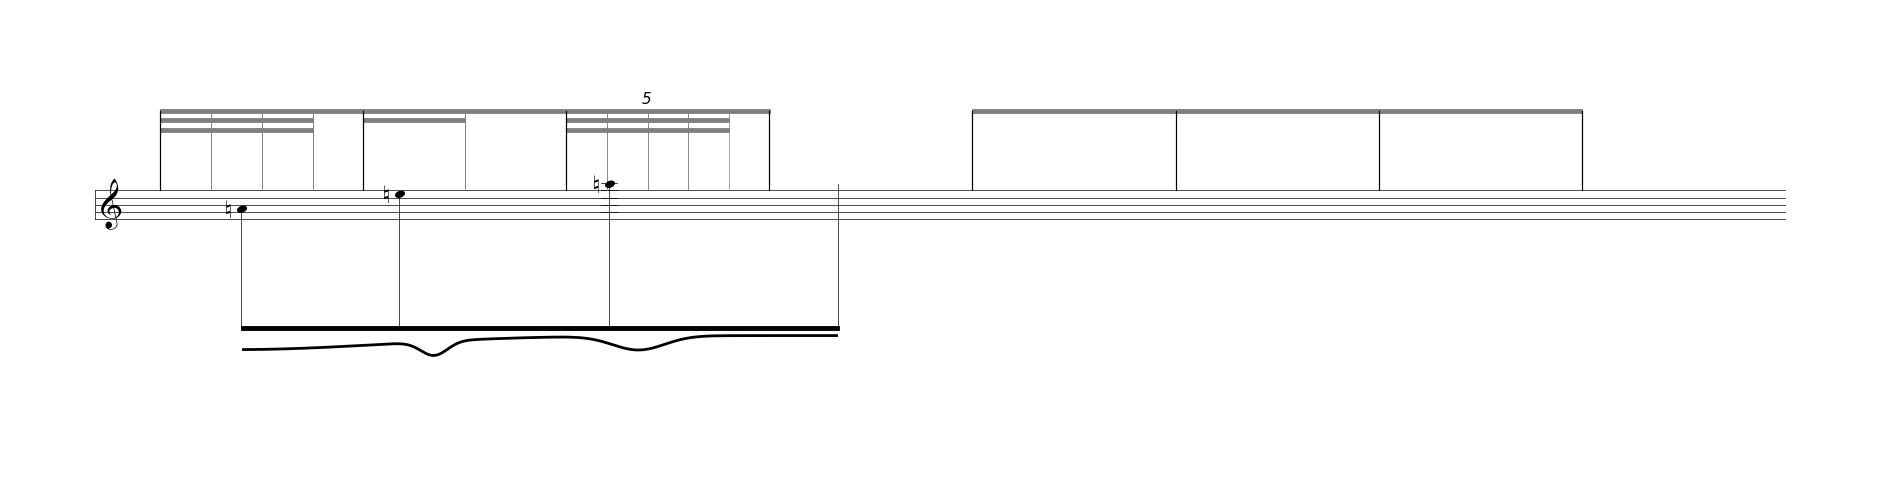

In [41]:
seed2 = 71
np.random.seed(seed2)

extend_first = 0.0
extend_last = 0.0
# not using for the Durand piece
# dev = random.uniform(0.02, 0.1)
dev = 0
# acc_dev = random.uniform(0, 60)
acc_dev = 0


# tuplets = [5, 5, 5, 5, 5, 5, 5, 5]
# los_angles = [4.9, 23.4, 15.0, -12.2, 12.4, 0.0]


import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc

for feature in range(len(output_features)):
  # create the figure and subplot:
  fig = plt.figure(figsize=(24, 6))

  ax = plt.subplot(1, 1, 1)

  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  phan_off = 0.46
  base_y = -15.1

  # staff lines
  X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)
  # measure lines
  X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, 0, 10)

  # notes:
  noteheads = ['f', ' ']
  # noteheads = ['O', ' ']

  notes = []

  for i in range(len(noteheads)):
    notes.append(noteheads[i])

  # sec_offset = [0, 0] #3.07 threshold
  sec_offset = np.zeros(len(output_features)) #3.07 threshold

  speed_slider = output_features[feature][0]
  size_slider = output_features[feature][1]
  x_offset_sl = output_features[feature][2]
  y_offset_sl = output_features[feature][3]
  rhythm_deviation = output_features[feature][4]
  pitch_deviation = output_features[feature][5]
  touch_deviation =  output_features[feature][6]
  accidental_deviation = output_features[feature][7]
  amp_1_slider = output_features[feature][8]
  amp_2_slider = output_features[feature][9]
  amp_3_slider = output_features[feature][10]
  amp_mean1_slider = output_features[feature][11]
  amp_mean2_slider = output_features[feature][12]
  amp_mean3_slider = output_features[feature][13]
  amp_kurt1_but = output_features[feature][14]
  amp_kurt2_but = output_features[feature][15]
  amp_kurt3_but = output_features[feature][16]
  tamp_1_slider = output_features[feature][17]
  tamp_2_slider = output_features[feature][18]
  tamp_3_slider = output_features[feature][19]
  tamp_mean1_slider = output_features[feature][20]
  tamp_mean2_slider = output_features[feature][21]
  tamp_mean3_slider = output_features[feature][22]
  tamp_kurt1_but = output_features[feature][23]
  tamp_kurt2_but = output_features[feature][24]
  tamp_kurt3_but = output_features[feature][25]


  # x_off = x_offset_sl
  x_off = round(random.uniform(0.4, 3.0), 2)
  y_off = 0.0
  pitch_off = y_offset_sl

  # speed = speed_slider
  speed = round(random.uniform(0.2, 2.0), 2)
  # size = int(size_slider)
  size = random.randint(3, 7)

  ## Speed / rhythmic irregularity / textural direction
  x_mean = 0
  #@@rhy
  x_std_dev = rhythm_deviation
  # x_std_dev = 0.0
  min_dist = 0.1

  x_data = list(range(size))
  x_data = [x + np.random.normal(x_mean, x_std_dev) for x in x_data]

  ##@@@@RHYTHM
  # x_off, speed = adjust_xbound(x_off, speed)

  x_data = [i*speed for i in x_data]

  # x_data = [-0.07719044686628479, 0.3, 0.35, 0.6]

  # Ensure the sequence is strictly increasing
  for i in range(1, len(x_data)):
      if x_data[i] <= x_data[i - 1]:
          x_data[i] = x_data[i - 1] + 0.001  # Adjust as needed
  # keep min dist
  for i in range(1, len(x_data)):
    if x_data[i] - x_data[i-1] <= min_dist:
      x_data[i] = x_data[i] + 0.1


  for i in range(1, len(x_data)):
    x_data[i] = x_data[i] + extend_first
  x_data[-1] =x_data[-1] + extend_last
  print("x_data after extend: ", x_data)

#@@@@PITCHES!
  y_data = list(range(size))

  print("y_data: ", y_data)

  y_min, y_max = 0.5, 11.0 # F3-F6

  y_mean = np.mean([y_min,y_max])

  #@@pitch
  y_std_dev = pitch_deviation
  # y_std_dev = 0.0 #test
  # y_std_dev = 0.3 #test

  y_std_dev = round(y_std_dev * (y_max)*2)
  print("y_std_dev: ", y_std_dev)

  y_data = np.random.normal(y_mean, y_std_dev, size=size)

  # y_data = [y_max] * size #for testing


  # to avoid only notes on spaces
  def half_resolution(number):
    return round(number * 2) / 2

  y_data = [half_resolution(y) for y in y_data]


  for i in range(size-1):
    pitch = y_data[i]+pitch_off

    if pitch < y_min:
      pitch = y_min
    elif pitch > y_max:
      pitch = y_max

    pitch_offset = -3.55 # change this
    rhythms = x_data
    rhythm = rhythms[i] # THIS IS WEIRD
    ledger_off_low = (pitch+pitch_offset)+0.55
    # ledger_off_low = (pitch+pitch_offset)
    ledger_off_hi = (pitch+pitch_offset)-4.45
    # ledger_off_hi = (pitch+pitch_offset)


    # ledger lines def
    L1_x, L1_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_low)
    L2_x, L2_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_hi)


  #### MELODY
    plt.text((rhythm + 0.035)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
    # plt.text((rhythm + 0.033)+x_off+sec_offset[feature], pitch+pitch_offset, 'O', fontproperties=fontprop1, color='black', size=26)

    # plt.text((rhythm + 0.008)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # stems
    ax.plot(np.linspace(rhythm+x_off+sec_offset[feature] + 0.06, rhythm+x_off+sec_offset[feature] + 0.06, 10), np.linspace((pitch+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # ledger lines
    if pitch < 3.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch < 3.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')
    if pitch > 8.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch > 8.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

  # last stems
  print("feature: ", feature)
  print("y_data after: ", y_data)

  ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10),
          np.linspace((y_data[-2]+pitch_off+(pitch_offset)), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # elif feature == 1:
  #   ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10),
  #           np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y+1.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # plot the staff lines
  for i in range(5):
      ax.plot(X_1, y_off + Y_1 + i, linestyle='solid', linewidth=0.5, color='black')

  # clef!
  plt.text(0.1, 0.9 + y_off, '&', fontproperties=fontprop1)
  # plt.text(0.1, 2.8 + y_off, '?', fontproperties=fontprop1)

  # plot the measure lines and lower beams:
  ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
  ax.plot(np.linspace((x_data[0])+x_off+0.075+sec_offset[feature], (x_data[size-1])
    + x_off+0.05+sec_offset[feature], 10), np.linspace(base_y, base_y, 10), linestyle='solid', linewidth=3.5, color='black')

  # #|extra pitch
  # plt.text((x_data[2] + 0.055)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 4+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 7+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[0] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[1] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[3] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[4] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # #extra acc|
  # ax.text((x_data[0] + 0.035)+x_off+sec_offset[feature]-0.1, 3+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text((x_data[3] + 0.035)+x_off+sec_offset[feature]-0.1, 5+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')

  ## @@@BEZIER!
  ## Slur w/ Bezier curve

  # Existing start and end points
  y_edit = -2.0
  # y_edit = 2.0
  right_curve_end = 0
  x_start, y_start = x_data[0] + x_off + sec_offset[feature], (y_data[0]+pitch_off) + y_off + y_edit
  x_end, y_end = x_data[size-1] + x_off + sec_offset[feature]+0.1,(y_data[size-1]+pitch_off) + y_off - 2 + y_edit+right_curve_end

  # Calculate the midpoint
  mid_x, mid_y = (x_start + x_end) / 2, (y_start + y_end) / 2

  # Control point height (distance from midpoint)
  # control_height = 20 # Adjust this value as needed for symmetry
  control_height = 25 # Adjust this value as needed for symmetry
  # Determine the control point position
  # Assuming you want the curve to bulge upwards
  control1_x, control1_y = mid_x-2, mid_y + control_height
  control2_x, control2_y = mid_x+2, mid_y + control_height

  # Define the path of the cubic Bezier curve
  path = mpatches.Path([(x_start, y_start),
                        (control1_x, control1_y),
                        (control2_x, control2_y),
                        (x_end, y_end)],
                        [mpatches.Path.MOVETO, mpatches.Path.CURVE4, mpatches.Path.CURVE4, mpatches.Path.CURVE4])


  # x_start, y_start = x_data[0]+ x_off-0.45+sec_offset[feature], y_data[0]+y_offset_slider.value
  # x_end, y_end = x_data[size-1]+ x_off-0.45+sec_offset[feature], y_data[size-1]+y_offset_slider.value

  # # control points for the Bezier
  # control_x, control_y = (x_data[0] + x_data[size-1])+x_off-0.45+sec_offset[feature] - 0.5, (y_data[0]+y_offset_slider.value) + 32

  # # path of the Bezier
  # path = mpatches.Path([(x_start+0.45, y_start-1.0),
  #                       (control_x-2, control_y),
  #                       (x_end+0.5, y_end-1.0)], [1, 3, 3], closed=False) #[1, 3, 3]

  # patch = mpatches.PathPatch(path, edgecolor='black', facecolor='none', lw=0.5)

  # ax.add_patch(patch)


  # phantom rhythms:
  beat = 1.235
  # beat = 1.0

  beats = []
  for i in range(8):
    beats.append(beat*i)

  for i in range(len(beats)):
    if x_data[0]+x_off+sec_offset[feature] >= beats[i]:
      beat_start = math.floor(beats[i]/beat)
    if x_data[-1]+x_off+sec_offset[feature] >= beats[i]:
      beat_end = math.ceil(beats[i]/beat)

  divisions = [0.0]
  tuplet_val = []
  div_val = []
  true_div_val = []
  div_start = 0
  div_end = 0
  step = 1
  total = 0
  border = 0

# #@PHA
  for i in range(8):
    beats.append(beat*i)
    tuplet_val.append(random.choice([1, 2, 3, 4, 5]))
    # tuplet_val.append(2)
    # tuplet_val = tuplets
    if i < beat_start or i > beat_end-1:
      tuplet_val[i] = 1

    div_val.append(1/tuplet_val[i])
    true_div_val.append(beat*div_val[i])

    for j in range(tuplet_val[i]):
      total += true_div_val[i]
      divisions.append(total)

  divisions = divisions[:-1]

  for i in range(beat_start, beat_end, step):
    p1 = beats[i]
    font = {'style': 'italic', 'size': 11}
    pair = [p1, p1+(true_div_val[i]*(tuplet_val[i]-1))] #true_div_val controls the interval
    border += tuplet_val[i]
    border = border+2 # dirty solution to take care of the missing stem in divisions.
    div_start = 0
    div_end = border
    beam_off = 0.01

    #lower and middle beams for phantoms
    if tuplet_val[i] == 1:
      pass
    if tuplet_val[i] == 2:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 3:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.85, 16, f'{tuplet_val[i]}', fontdict=font)
    elif tuplet_val[i] == 4:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 5:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.92, 16, f'{tuplet_val[i]}', fontdict=font)


  #phantom beams
  if beat_start <= 2 and beat_end <= 3:
    print('beat_start <= 2 and beat_end <= 3')
    if beat_start >= beat_end:
      beat_end == 3
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start > 3 and beat_end <= 8:
    print('beat_start > 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start < 3 and beat_end <= 8:
    print('beat_start < 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start <= 3 and beat_end >= 4:
    print('beat_start <= 3 and beat_end >= 4')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start >= 3 and beat_end > 8:
    print('beat_start > 3 and beat_end <= 8')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[8] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')


  #bold phantom stems on beats
  ax.plot(np.linspace(beats, beats, 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.8, color='black')
  # print("beats: ", beats[-1])


  ##############
  ### @TIMBRE@ ###

  ## MAIN CURVE FOR DYNAMICS
  curve_size = 500

  # Generate x values
  x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  phrase_length = ((x_data[size-1]+x_off+0.075)-(x_data[0]+x_off+0.05))
  print("x_data before timbre: ", x_data)

  if amp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif amp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif amp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if amp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif amp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif amp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66, 1.0])
  else:
      pass

  if amp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif amp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif amp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # amp slider values from sine
  # amp_mean slider values from cosine

  # Calculate the y values using the Gaussian functions
  y1 = (amp_1_slider*8) * np.exp(-(x - (amp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  y2 = (amp_2_slider*8) * np.exp(-(x - (amp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  y3 = (amp_3_slider*8) * np.exp(-(x - (amp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

#  # # Create the combined curve with multiple maxima
#   for i in range(size-1):
#     length = (x_data[i+1]-x_data[i])-0.1
#     y = y1 + y2 + y3

  # # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y = y1 + y2 + y3
    elif length < 0.6 and length >= 0.3:
      y = y1 + y2
    elif length < 0.3 and length >= 0.1:
      y = y1

  y = (-y) - 1.0 # invert, add space
  y = y + base_y

  print("x_off", x_off)


  ## CURVE FOR @TIMBRE@
  # Generate x values
  x_t = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  if tamp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif tamp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif tamp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif tamp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif tamp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif tamp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif tamp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # Calculate the y values using the Gaussian functions
  yt_1 = (tamp_1_slider*8) * np.exp(-(x - (tamp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  yt_2 = (tamp_2_slider*8) * np.exp(-(x - (tamp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  yt_3 = (tamp_3_slider*8) * np.exp(-(x - (tamp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

 # # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    y_t = yt_1 + yt_2 + yt_3

  # # Create the combined curve with multiple maxima
  # for i in range(size-1):
  #   length = (x_data[i+1]-x_data[i])-0.1
  #   if length >= 0.6:
  #     y_t = yt_1 + yt_2 + yt_3
  #   elif length < 0.6 and length >= 0.3:
  #     y_t = yt_1 + yt_2
  #   elif length < 0.3 and length >= 0.1:
  #     y_t = yt_1

  n = 10

  # Plot the main curve
  plt.plot(x+sec_offset[feature], y, linewidth=2, color='black')

  # Generate x values for interpolations
  base_x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off + 0.05, curve_size)
  interpolations = np.linspace(0, 1, n+2)[1:-1] # n+1 segments with n+2 points.
  interpolated_y = [np.interp(x, base_x, base_y + t * (y - base_y)) for t in interpolations] # vertical interpolations

  # ######
  # Define the color gradient range and values
  color_start = 'white'
  color_end = 'white'

  # # Create a linear color gradient colormap
  cmap = LinearSegmentedColormap.from_list('gradient', [color_start, color_end])

  # # Normalize the y values to [0, 1]
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))

  # # Plot the curve with gradual change
  for i, interpolated_curve in enumerate(interpolated_y):
      color = cmap(y_norm)  # Calculate the color based on the normalized y values
      ax.scatter(x+sec_offset[feature], interpolated_curve, color=color, s=15)  # Adjust the marker size (scatter width) using the 's' parameter

  # Plot the interpolations
  plt.plot(x+sec_offset[feature], y, color='black', linewidth=0)
  for i, interpolated_curve in enumerate(interpolated_y):
      plt.plot(x+sec_offset[feature], interpolated_curve, color='black', alpha=0.0, linewidth=0)

  print("x_data: ", x_data)

##@@@ACCIDENTALS
  # los angles!
  angles = list(range(size))
  # accidental_deviation = 50
  acc_std_dev = accidental_deviation

  acc_min, acc_max = -45, 45
  acc_mean = np.mean([acc_min,acc_max])

  acc_std_dev = (accidental_deviation / 20) * (acc_max - acc_min) / 2

  print("accidental_deviation: ", accidental_deviation)
  print("acc_std_dev: ", acc_std_dev)

  angles = [round(np.random.normal(acc_mean, acc_std_dev),1) for angle in angles]

  for i in range(size):
    if angles[i] > 45:
      angles[i] = 45
    elif angles[i] < -45:
      angles[i] = -45
    else:
      angles[i]


  print("angles: ", angles)


  # inset_data_x = x_data
  # inset_data_x = [x_data[j]+(x_off+0.62) for j in range(len(x_data))]
  inset_data_x = [x_data[j]+(x_off-0.4) for j in range(len(x_data))]
  print("inset_data_x: ", inset_data_x)

  inset_data_y = np.full(size, 0.33)
  print("inset_data_y: ", inset_data_y)

  inset_width, inset_height = 0.17, 0.17

  for i, (angle) in enumerate(angles[:size-1]):

    # Convert this position to display coordinates
    coords = ax.transData.transform(np.column_stack((inset_data_x, inset_data_y)))

    trans_coords = fig.transFigure.inverted().transform(coords)

    norm_coords_x = trans_coords[:, 0]
    # norm_coords_y = trans_coords[:, 1]

    adjusted_x = norm_coords_x[i]-0.048
    adjusted_y = inset_data_y[i]
    # print("adjusted_y", adjusted_y)

    inset_ax = fig.add_axes([adjusted_x, adjusted_y, inset_width, inset_height])
    # inset_ax.set_layout='tight'
    # Set limits and aspect for the inset axes
    inset_ax.patch.set_alpha(0.0)
    inset_ax.set_aspect('equal', adjustable='box')

    # Plot elements in the inset
    length = (x_data[i+1]-x_data[i])-0.1

    # Add a label for the angle
    pitch = y_data[i]+pitch_off

    # Dubious logic here. Angle doesn't need to be 0.0?
    # This doesn't affect the actual angle
    if pitch < y_min:
      label_x, label_y = x_data[i]+x_off-0.05, y_min+pitch_offset
      if angle < 0: # hinders lower than G3
        angle = 0
      else:
        angle
    elif pitch > y_max:
      label_x, label_y = x_data[i]+x_off-0.05, y_max+pitch_offset

    else:
      label_x, label_y = x_data[i]+x_off-0.05, pitch+pitch_offset

    angle_radians = np.radians(angle)

    # second = 171.429 #cents #7-TET
    second = 200 #cents
    cents = angle_radians/(np.pi/(2*second))

    x_acc = np.cos(angle_radians)
    y_acc = np.sin(angle_radians)

    acc_sym = ['n','#','b']
    # label_sym = '+' if cents > 0 else ''
    # ax.text(label_x, label_y, f'{label_sym}{round(cents, 2)}¢', fontsize=10, color='red')

    # if length <= 0.0: #to cancel it out for the tonal part
    # if length >= 1.0: #for flute and violin
    if length < 0.0: #for Spomenik Ib
      inset_ax.arrow(0, 0, x_acc, y_acc, head_width=0.1, head_length=0.1, color='black', linewidth=1)
      inset_ax.plot([0, (-x_acc/2)], [0, (-y_acc/2)], color='black', linewidth=1)

      inset_ax.plot([0, 1], [0, 0], color='black', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, 0], [0, 1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)
      inset_ax.plot([0, 0], [0, -1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)

      inset_ax.plot([0, np.cos(np.pi/4)], [0, np.sin(np.pi/4)], color='gray', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/4)], [0, np.sin(-np.pi/4)], color='gray', linestyle='--', linewidth=0.5)

      inset_ax.plot([0, np.cos(np.pi/8)], [0, np.sin(np.pi/8)], color='gray', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/8)], [0, np.sin(-np.pi/8)], color='gray', linestyle='--', linewidth=0.5)

      if angle > -10 and angle < 10: #0.0
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle > 15 and angle < 30: #22.5
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle > 37 and angle < 53: #45
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle < -15 and angle > -30: #-22.5
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle < -37 and angle > -53: #-45
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')

    else:
      if angle > -10 and angle < 10: #0.0
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle > 15 and angle < 30: #22.5
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle > 37 and angle < 53: #45
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle < -15 and angle > -30: #-22.5
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle < -37 and angle > -53: #-45
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')
      else:
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')

      # extra acc
      # ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')

    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

    # Hide spines for inset axes
    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['bottom'].set_visible(False)
    inset_ax.spines['left'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)


# |extra accidental|
  # ax.text(x_data[2]+x_off-0.05, 3.5+pitch_offset, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(x_data[2]+x_off-0.1, 4+pitch_offset, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(x_data[4]+x_off-0.1, 4+pitch_offset, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')

  # VIBRATO
    # ALL with Hann windows
    # with regularity or irregularity
  non_vib = 0
  min_vib = 7
  mid_vib = 14
  max_vib = 28
  # vibrati = [0, 0, 7, 7, 14, 14, 28, 28]
  # vibrati = [mid_vib, non_vib, non_vib, non_vib]
  # for i in range(len(vibrati)-1):
  #   length = (x_data[i+1]-x_data[i])-0.05
  #   t = np.linspace(0, length, 5000, endpoint=False)  # controls length
  #   start_freq = vibrati[i]
  #   end_freq = vibrati[i] if vibrati[i] == vibrati[i+1] else vibrati[i+1]
  #   freq_variation = np.linspace(start_freq, end_freq, len(t))

    # phase = 2 * np.pi * np.cumsum(freq_variation) * (t[1] - t[0])

    # Amplitude modulation parameters
    # mul = 1
    # am_sig = np.sin(phase) * mul
    # ax.plot(x_data[i] + x_off + t + 0.08, (-5) + am_sig - 3.7, 'Blue', alpha=0.4)

      # if length >= 0.7:
          # ax.plot(x_data[i] + x_off + t + 0.08, (-5) + am_sig - 3.7, 'Blue', alpha=alpha_val)

      # am_freq = round(np.random.normal(10.0, 4.0), 2)
      # mul = round(np.random.uniform(0.5, 1.5), 2)
      # am_sig = np.sin(am_freq * (2 * np.pi) * t) * mul
      # window = np.hanning(len(am_sig))
      # alpha_val = 0.4
      # vib = random.choice([0.0, 1.0])
      # am_fm = am_sig

      # if vib == 0.0:
        # alpha_val = 0.0
        # am_fm = am_sig
      # elif vib == 1.0:
        # am_fm = am_sig
      # if length >= 0.7:
        # ax.plot(x_data[i]+x_off+t+0.08, (-5)+am_fm-3.7, 'Blue', alpha=alpha_val)

  # key signature
  # ax.text(0.25, 4.0, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.3, 2.5, '#', fontproperties=fontprop1, fontsize=18, color='black')

  # Remove ticks from both main and inset axes
  ax.set_xticks([])
  ax.set_yticks([])

  # Set ylim for main axes
  ax.set_ylim(-35, 29)

  # Set tight layout
  # fig.set_tight_layout(True) #making this False fixes it...

  # Suppress warnings if necessary
  warnings.filterwarnings("ignore", category=UserWarning)
  plt.show()
  fig.savefig(f'vib{i}.svg', format='svg')

# save if you want
#filename = f'notation_{fig_num}.jpg'
#plt.savefig(filename, format='jpg')
#fig_num += 1









## COILS

x_data after extend:  [0.7097993001946654, 1.3688021366294107, 3.3911062879621565, 4.810907253533728]
y_data:  [0, 1, 2, 3]
y_std_dev:  0
feature:  0
y_data after:  [2.5, 2.5, 2.5, 2.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [0.7097993001946654, 1.3688021366294107, 3.3911062879621565, 4.810907253533728]
x_off 1.14
x_data:  [0.7097993001946654, 1.3688021366294107, 3.3911062879621565, 4.810907253533728]


<ipython-input-42-835a52239721>:542: RuntimeWarning: invalid value encountered in divide
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))


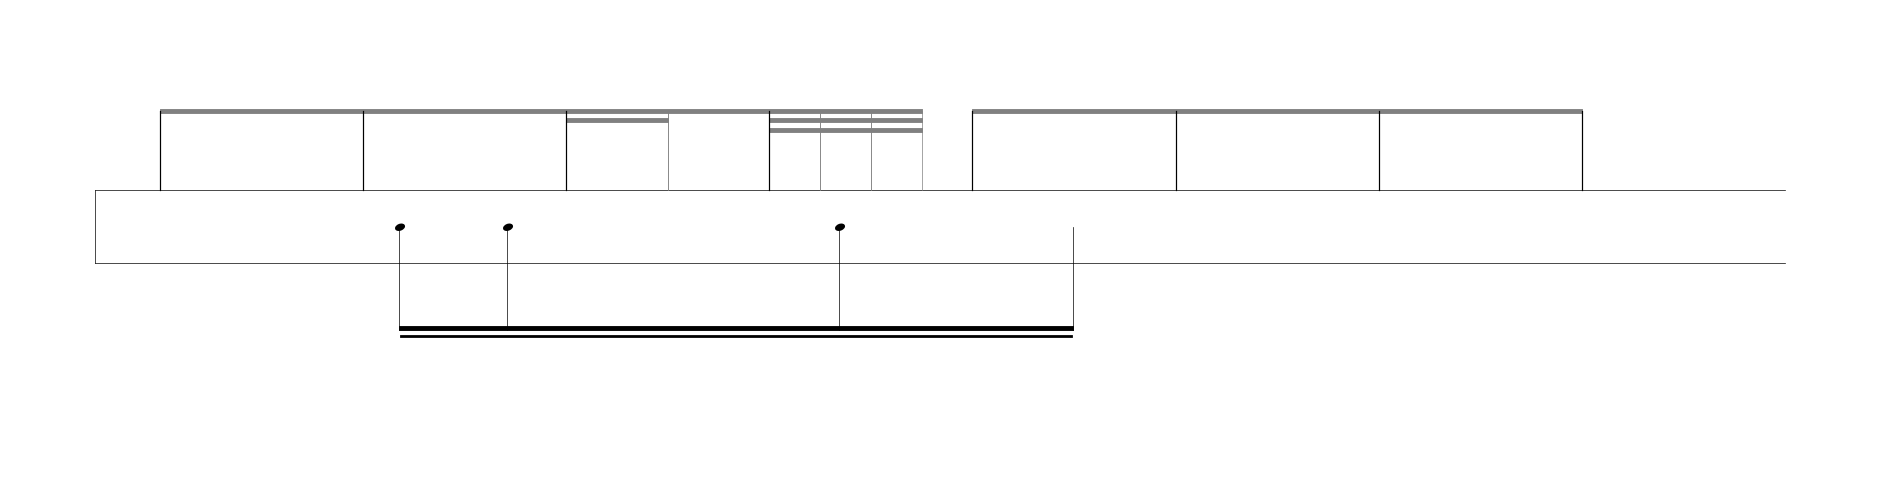

x_data after extend:  [-0.007900907821160688, 0.6310666256029794, 1.2632975652890066, 1.8991778964873693]
y_data:  [0, 1, 2, 3]
y_std_dev:  1
feature:  1
y_data after:  [3.5, 2.5, 2.0, 3.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.007900907821160688, 0.6310666256029794, 1.2632975652890066, 1.8991778964873693]
x_off 2.75
x_data:  [-0.007900907821160688, 0.6310666256029794, 1.2632975652890066, 1.8991778964873693]


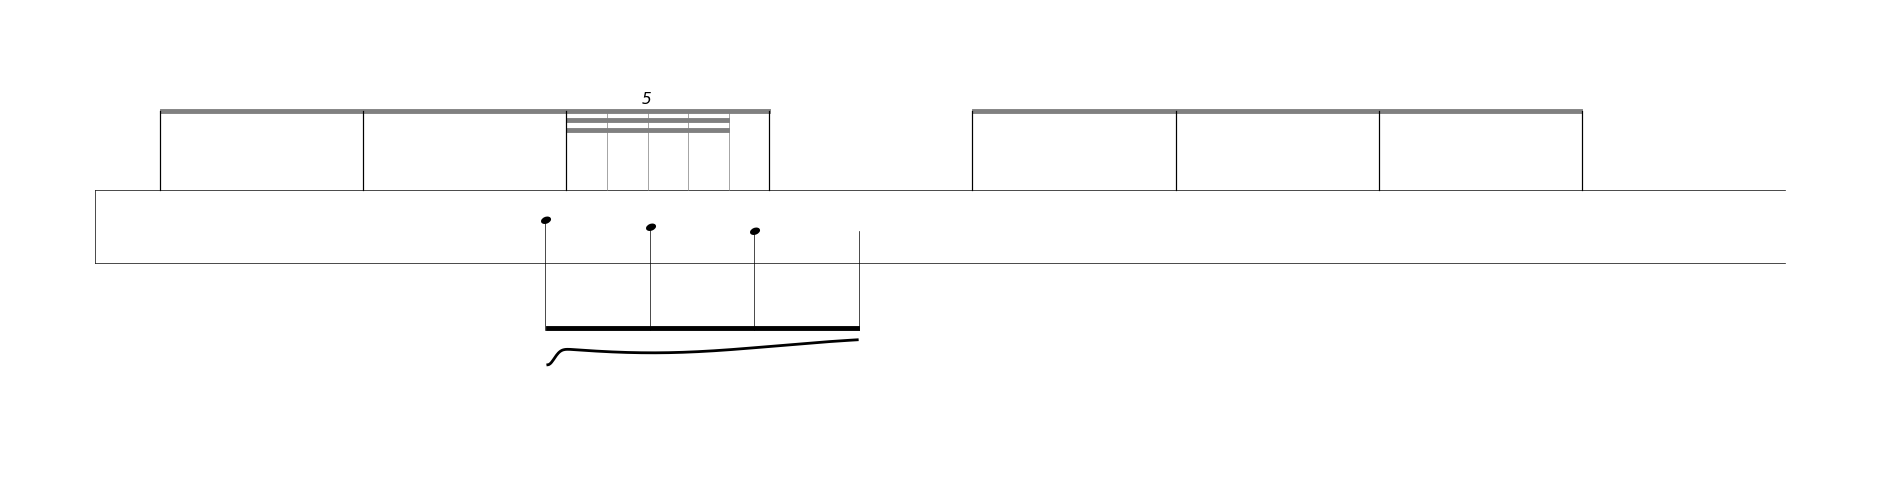

x_data after extend:  [0.29028347126797166, 0.9512553210272681, 1.5130665903403484, 2.3228614182762075, 2.692982148506721, 3.812416754980028, 4.718186233479162]
y_data:  [0, 1, 2, 3, 4, 5, 6]
y_std_dev:  2
feature:  2
y_data after:  [2.5, 2.5, 5.0, 2.5, 6.0, 3.0, 4.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [0.29028347126797166, 0.9512553210272681, 1.5130665903403484, 2.3228614182762075, 2.692982148506721, 3.812416754980028, 4.718186233479162]
x_off 2.34
x_data:  [0.29028347126797166, 0.9512553210272681, 1.5130665903403484, 2.3228614182762075, 2.692982148506721, 3.812416754980028, 4.718186233479162]


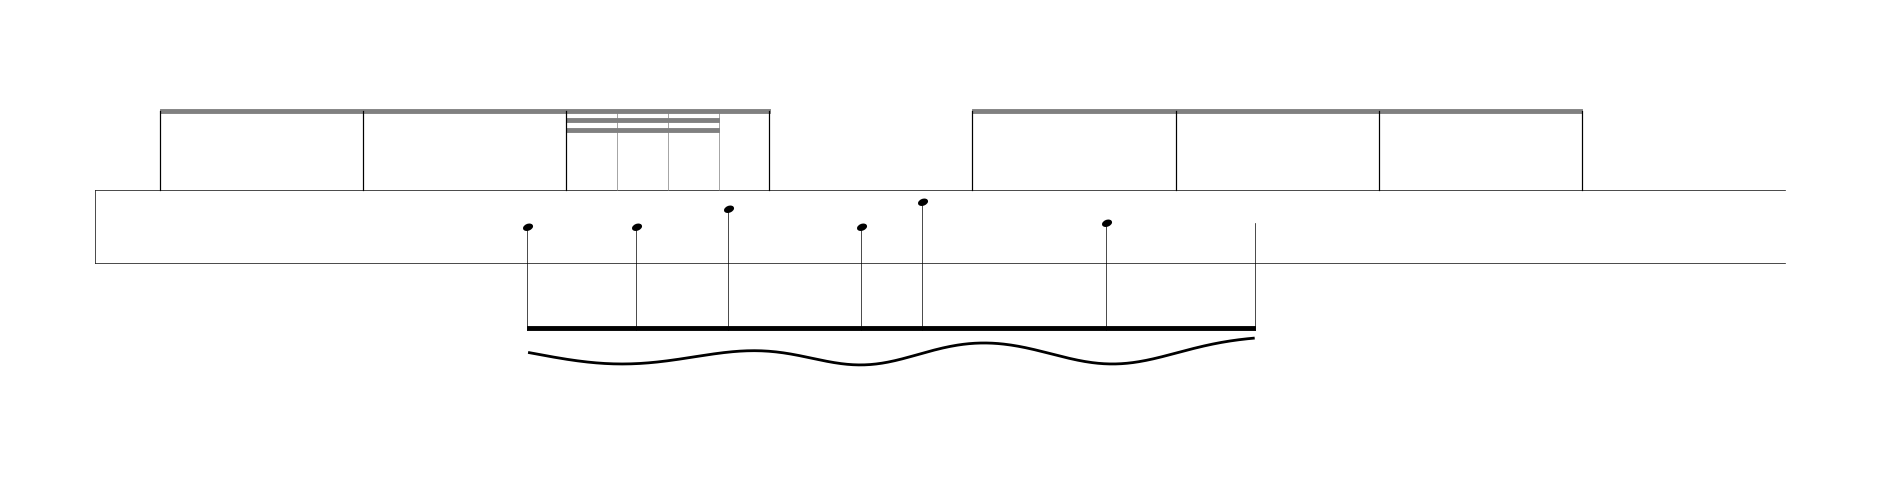

x_data after extend:  [-0.0254588368103673, 1.0543130085029637, 2.151330759748144, 2.972473626102743]
y_data:  [0, 1, 2, 3]
y_std_dev:  3
feature:  3
y_data after:  [7.0, -4.0, 2.0, 4.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.0254588368103673, 1.0543130085029637, 2.151330759748144, 2.972473626102743]
x_off 2.73
x_data:  [-0.0254588368103673, 1.0543130085029637, 2.151330759748144, 2.972473626102743]


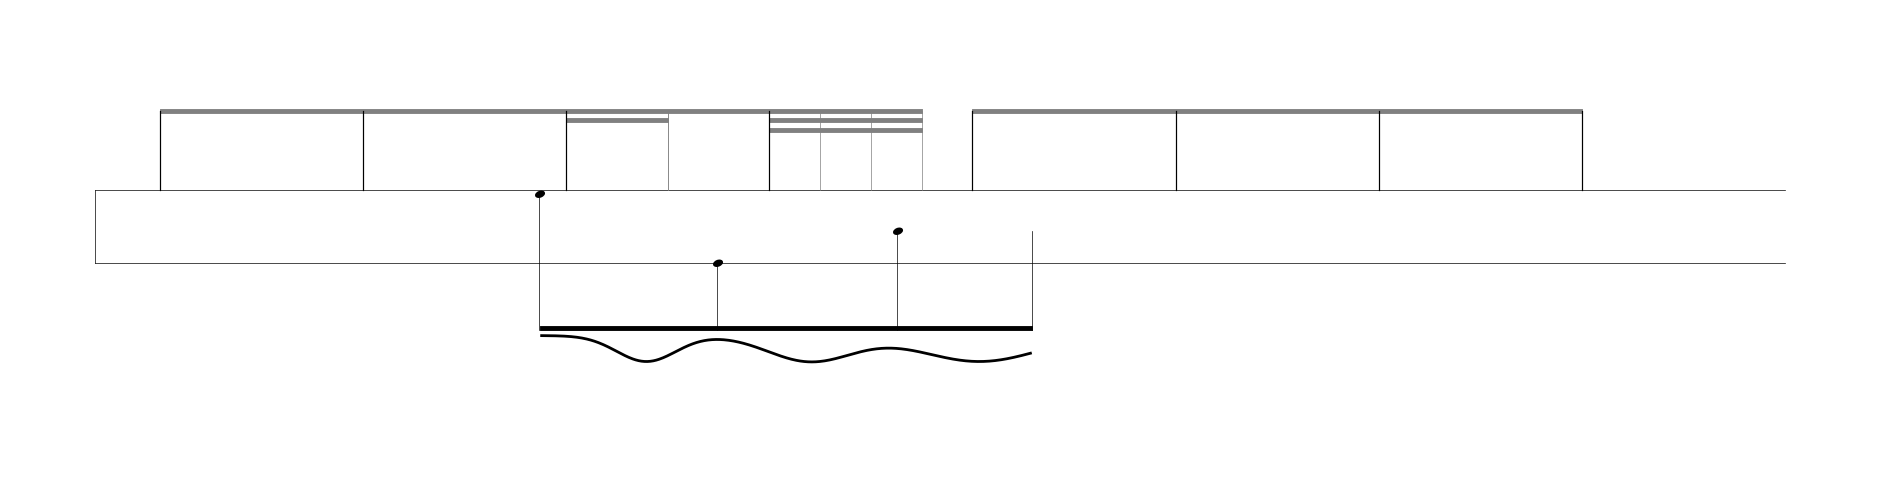

x_data after extend:  [-0.19671666962614515, 1.8475034522134792, 3.923962602388666, 5.3472736124726055, 6.339192773678485, 9.019618800197073, 10.845632179594512]
y_data:  [0, 1, 2, 3, 4, 5, 6]
y_std_dev:  3
feature:  4
y_data after:  [3.0, 2.5, 2.5, -2.5, 1.5, 7.5, 5.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.19671666962614515, 1.8475034522134792, 3.923962602388666, 5.3472736124726055, 6.339192773678485, 9.019618800197073, 10.845632179594512]
x_off 1.86
x_data:  [-0.19671666962614515, 1.8475034522134792, 3.923962602388666, 5.3472736124726055, 6.339192773678485, 9.019618800197073, 10.845632179594512]


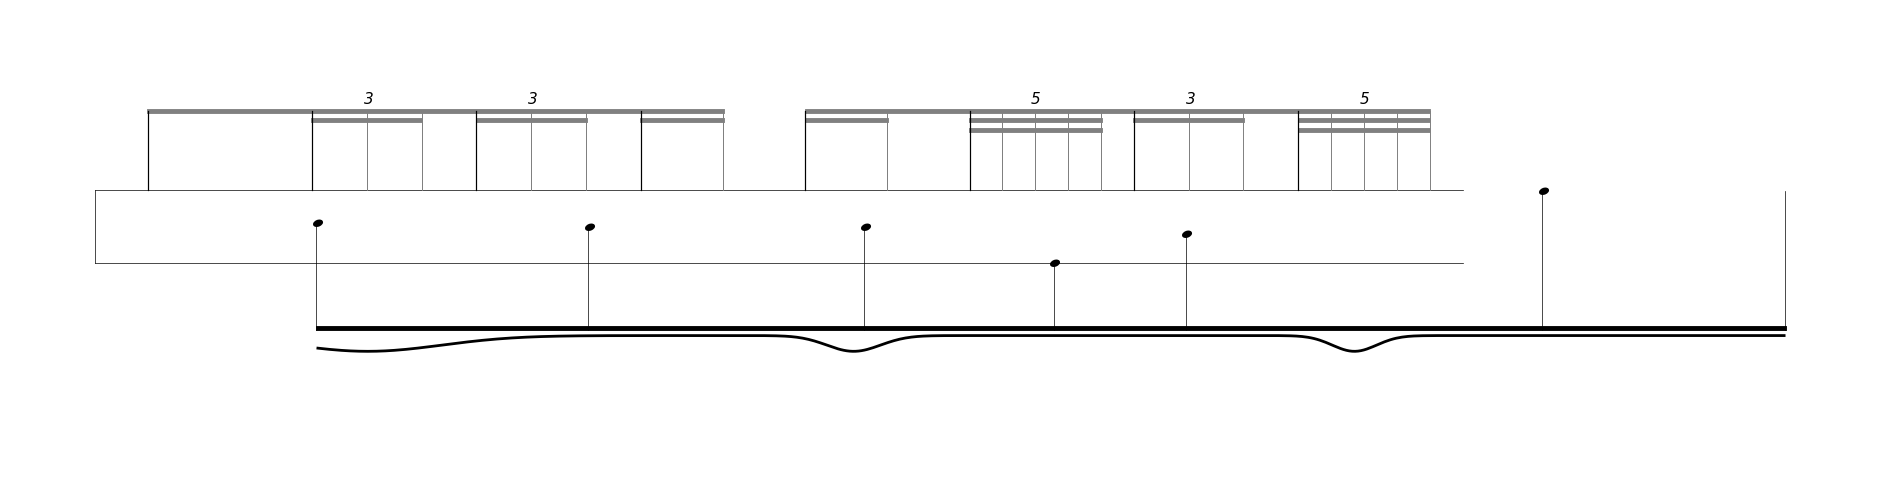

x_data after extend:  [0.10084559294675995, 0.8668104339589311, 1.8117454402713138]
y_data:  [0, 1, 2]
y_std_dev:  3
feature:  5
y_data after:  [4.5, 3.0, 2.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [0.10084559294675995, 0.8668104339589311, 1.8117454402713138]
x_off 0.9
x_data:  [0.10084559294675995, 0.8668104339589311, 1.8117454402713138]


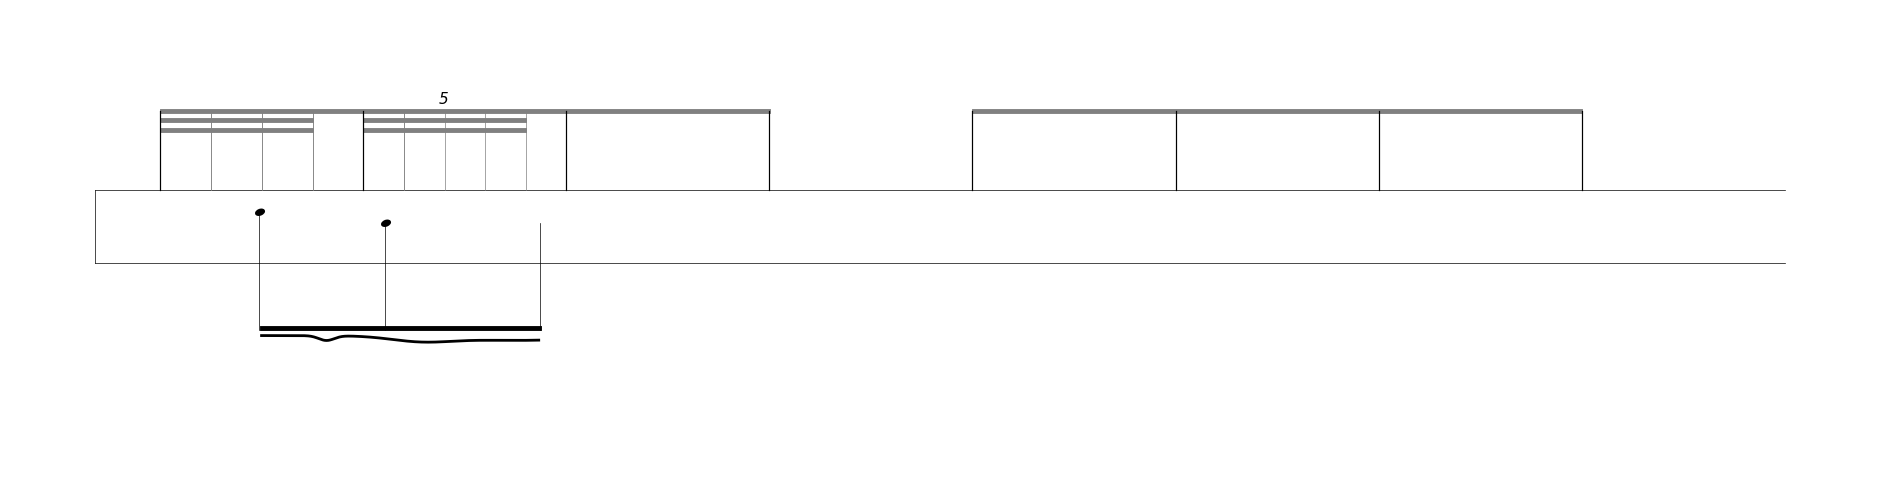

x_data after extend:  [-0.0348839348933957, 0.7023088519714208, 1.2939195454960364, 1.994660319641818]
y_data:  [0, 1, 2, 3]
y_std_dev:  3
feature:  6
y_data after:  [5.0, -3.0, 4.0, -0.5]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.0348839348933957, 0.7023088519714208, 1.2939195454960364, 1.994660319641818]
x_off 1.46
x_data:  [-0.0348839348933957, 0.7023088519714208, 1.2939195454960364, 1.994660319641818]


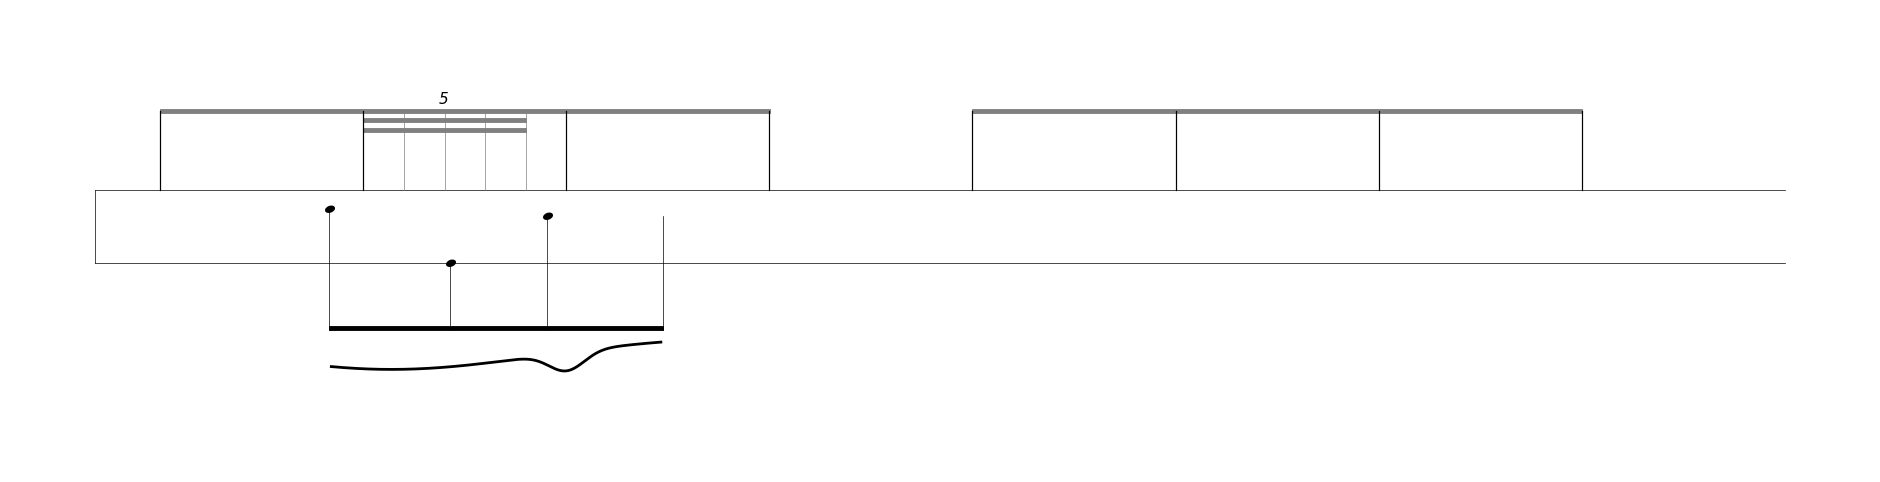

x_data after extend:  [-0.9891957700614572, 1.0997805657152764, 2.6959500401559815, 5.067505908082282]
y_data:  [0, 1, 2, 3]
y_std_dev:  3
feature:  7
y_data after:  [5.5, 9.0, 1.0, 1.5]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.9891957700614572, 1.0997805657152764, 2.6959500401559815, 5.067505908082282]
x_off 2.46
x_data:  [-0.9891957700614572, 1.0997805657152764, 2.6959500401559815, 5.067505908082282]


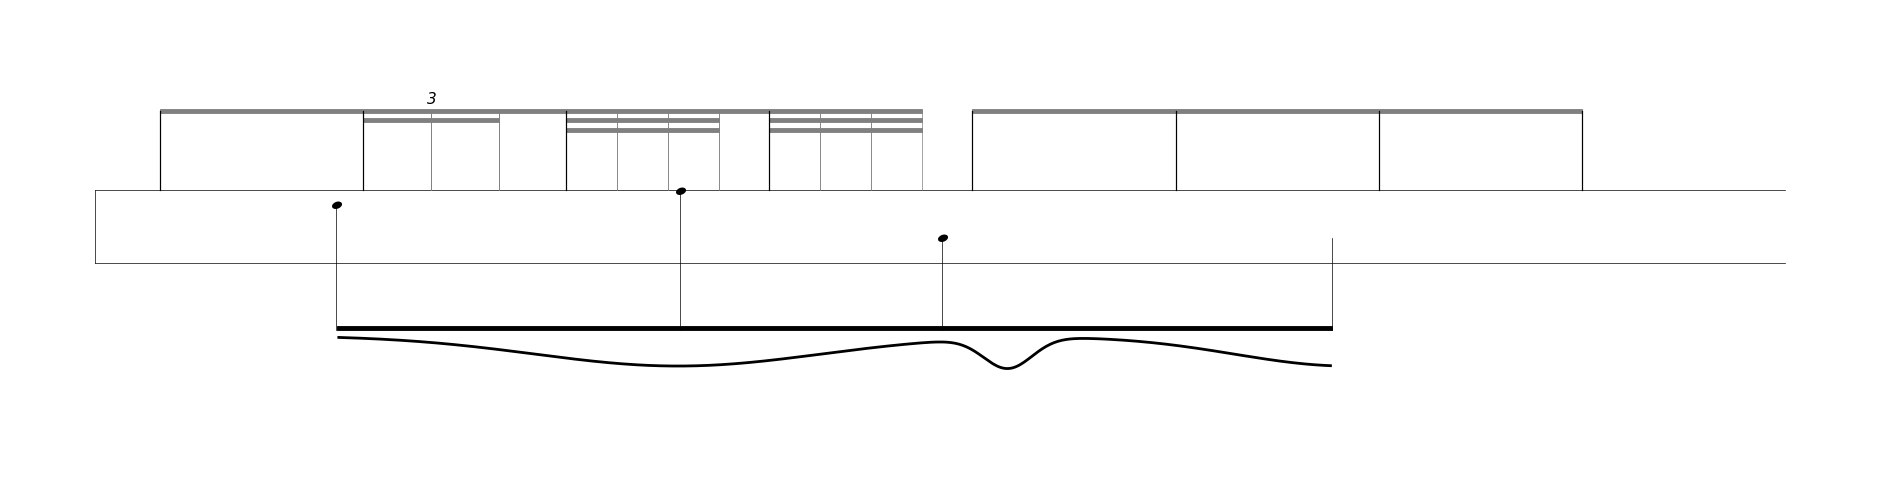

x_data after extend:  [-0.006089548302657467, 1.8744906762807292, 3.6482823248297147, 5.431216959275169, 7.204788052261001, 9.131843531155635]
y_data:  [0, 1, 2, 3, 4, 5]
y_std_dev:  1
feature:  8
y_data after:  [1.0, 2.5, 2.5, 3.0, 1.0, 4.0]
beat_start < 3 and beat_end <= 8
x_data before timbre:  [-0.006089548302657467, 1.8744906762807292, 3.6482823248297147, 5.431216959275169, 7.204788052261001, 9.131843531155635]
x_off 0.53
x_data:  [-0.006089548302657467, 1.8744906762807292, 3.6482823248297147, 5.431216959275169, 7.204788052261001, 9.131843531155635]


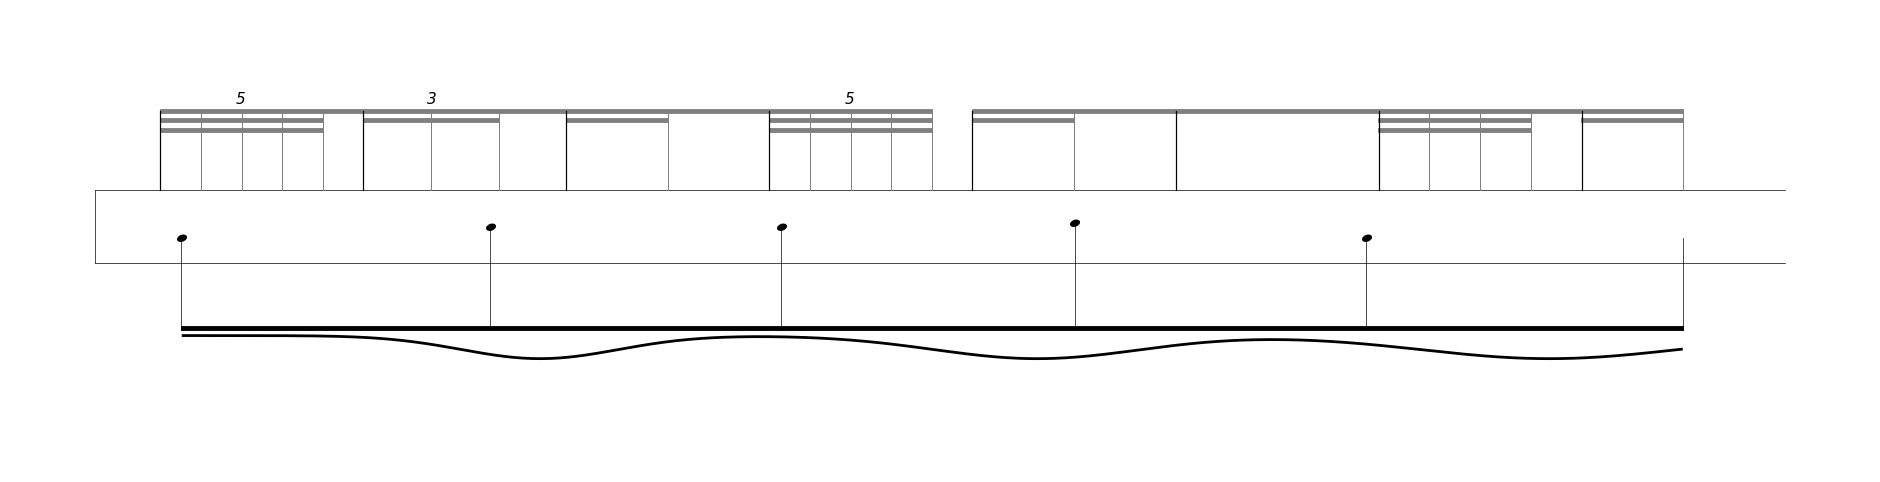

x_data after extend:  [-0.010239896994008206, 0.1924550804022951, 0.4846705778620722, 0.8061086112781286, 1.0338203667711936]
y_data:  [0, 1, 2, 3, 4]
y_std_dev:  1
feature:  9
y_data after:  [3.5, 1.5, 3.0, 4.5, 3.0]
beat_start <= 2 and beat_end <= 3
x_data before timbre:  [-0.010239896994008206, 0.1924550804022951, 0.4846705778620722, 0.8061086112781286, 1.0338203667711936]
x_off 1.36
x_data:  [-0.010239896994008206, 0.1924550804022951, 0.4846705778620722, 0.8061086112781286, 1.0338203667711936]


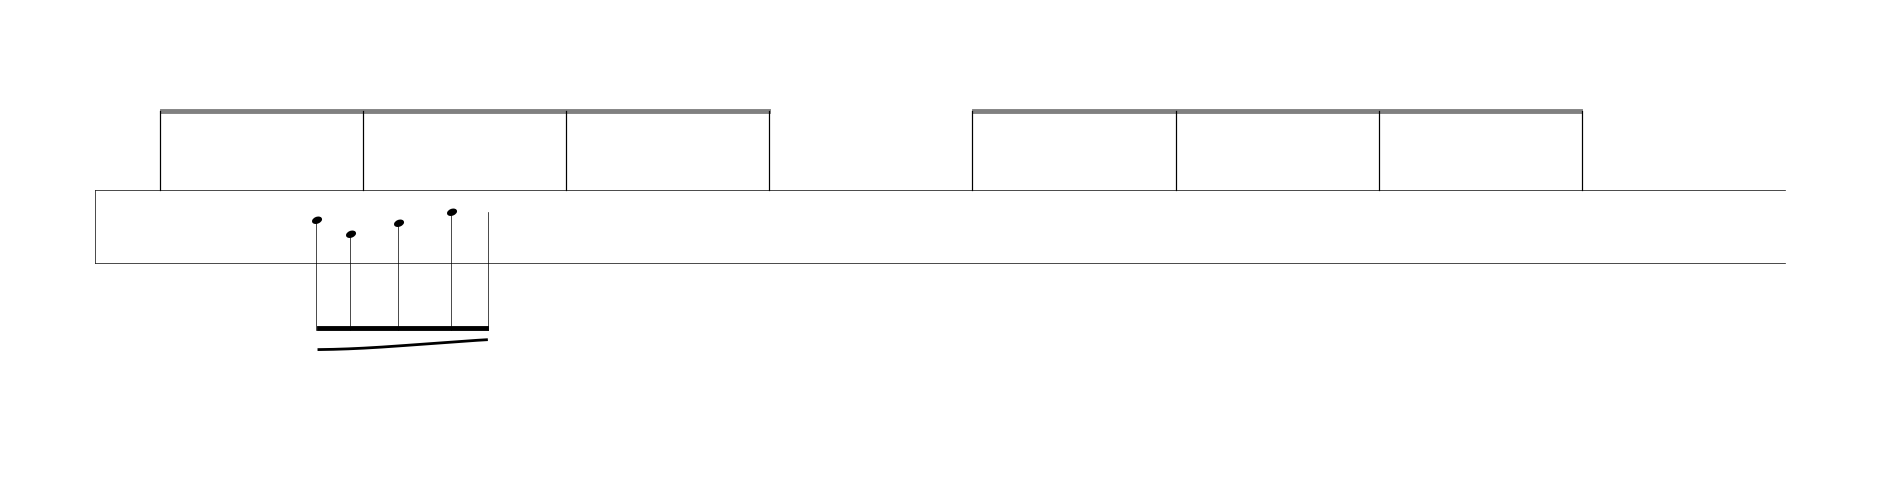

In [42]:
seed3 = 24
np.random.seed(seed3)

extend_first = 0.0
extend_last = 0.0
# not using for the Durand piece
# dev = random.uniform(0.02, 0.1)
dev = 0
# acc_dev = random.uniform(0, 60)
acc_dev = 0

# tuplets = [5, 5, 5, 5, 5, 5, 5, 5]
# los_angles = [4.9, 23.4, 15.0, -12.2, 12.4, 0.0]


import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc

for feature in range(len(output_features)):
  # create the figure and subplot:
  fig = plt.figure(figsize=(24, 6))

  ax = plt.subplot(1, 1, 1)

  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  phan_off = 0.46
  base_y = -15.1

  # staff lines
  X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)
  # measure lines
  X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, -6, 10)

  # notes:
  noteheads = ['f', ' ']
  # noteheads = ['O', ' ']

  notes = []

  for i in range(len(noteheads)):
    notes.append(noteheads[i])

  # sec_offset = [0, 0] #3.07 threshold
  sec_offset = np.zeros(len(output_features)) #3.07 threshold

  speed_slider = output_features[feature][0]
  size_slider = output_features[feature][1]
  x_offset_sl = output_features[feature][2]
  y_offset_sl = output_features[feature][3]
  rhythm_deviation = output_features[feature][4]
  pitch_deviation = output_features[feature][5]
  touch_deviation =  output_features[feature][6]
  accidental_deviation = output_features[feature][7]
  amp_1_slider = output_features[feature][8]
  amp_2_slider = output_features[feature][9]
  amp_3_slider = output_features[feature][10]
  amp_mean1_slider = output_features[feature][11]
  amp_mean2_slider = output_features[feature][12]
  amp_mean3_slider = output_features[feature][13]
  amp_kurt1_but = output_features[feature][14]
  amp_kurt2_but = output_features[feature][15]
  amp_kurt3_but = output_features[feature][16]
  tamp_1_slider = output_features[feature][17]
  tamp_2_slider = output_features[feature][18]
  tamp_3_slider = output_features[feature][19]
  tamp_mean1_slider = output_features[feature][20]
  tamp_mean2_slider = output_features[feature][21]
  tamp_mean3_slider = output_features[feature][22]
  tamp_kurt1_but = output_features[feature][23]
  tamp_kurt2_but = output_features[feature][24]
  tamp_kurt3_but = output_features[feature][25]


  # x_off = x_offset_sl
  x_off = round(random.uniform(0.4, 3.0), 2)
  y_off = 0.0
  pitch_off = y_offset_sl

  # speed = speed_slider
  speed = round(random.uniform(0.2, 2.0), 2)
  # size = int(size_slider)
  size = random.randint(3, 7)

  ## Speed / rhythmic irregularity / textural direction
  x_mean = 0
  #@@rhy
  x_std_dev = rhythm_deviation
  # x_std_dev = 0.0
  min_dist = 0.1

  x_data = list(range(size))
  x_data = [x + np.random.normal(x_mean, x_std_dev) for x in x_data]

  ##@@@@RHYTHM
  # x_off, speed = adjust_xbound(x_off, speed)

  x_data = [i*speed for i in x_data]

  # x_data = [-0.07719044686628479, 0.3, 0.35, 0.6]

  # Ensure the sequence is strictly increasing
  for i in range(1, len(x_data)):
      if x_data[i] <= x_data[i - 1]:
          x_data[i] = x_data[i - 1] + 0.001  # Adjust as needed
  # keep min dist
  for i in range(1, len(x_data)):
    if x_data[i] - x_data[i-1] <= min_dist:
      x_data[i] = x_data[i] + 0.1


  for i in range(1, len(x_data)):
    x_data[i] = x_data[i] + extend_first
  x_data[-1] =x_data[-1] + extend_last
  print("x_data after extend: ", x_data)

#@@@@PITCHES!
  y_data = list(range(size))

  print("y_data: ", y_data)

  y_min, y_max = -2.5, 7.5

  y_mean = np.mean([y_min,y_max])

  #@@pitch
  y_std_dev = pitch_deviation
  # y_std_dev = 0.0 #test
  # y_std_dev = 0.3 #test

  y_std_dev = round(y_std_dev * (y_max)*2)
  print("y_std_dev: ", y_std_dev)

  y_data = np.random.normal(y_mean, y_std_dev, size=size)

  # y_data = [y_max] * size #for testing


  # to avoid only notes on spaces
  def half_resolution(number):
    return round(number * 2) / 2

  y_data = [half_resolution(y) for y in y_data]


  for i in range(size-1):
    pitch = y_data[i]+pitch_off

    if pitch < y_min:
      pitch = y_min
    elif pitch > y_max:
      pitch = y_max

    pitch_offset = -3.55 # change this
    rhythms = x_data
    rhythm = rhythms[i] # THIS IS WEIRD
    ledger_off_low = (pitch+pitch_offset)+0.55
    # ledger_off_low = (pitch+pitch_offset)
    ledger_off_hi = (pitch+pitch_offset)-4.45
    # ledger_off_hi = (pitch+pitch_offset)


    # # ledger lines def
    # L1_x, L1_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_low)
    # L2_x, L2_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_hi)


  #### MELODY
    plt.text((rhythm + 0.035)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
    # plt.text((rhythm + 0.033)+x_off+sec_offset[feature], pitch+pitch_offset, 'O', fontproperties=fontprop1, color='black', size=26)

    # plt.text((rhythm + 0.008)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # stems
    ax.plot(np.linspace(rhythm+x_off+sec_offset[feature] + 0.06, rhythm+x_off+sec_offset[feature] + 0.06, 10), np.linspace((pitch+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # # ledger lines
  #   if pitch < 3.0 and (pitch % 1) == 0.0:
  #     for i in range(5):
  #       ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
  #   elif pitch < 3.0 and (pitch % 1) != 0.0:
  #     for i in range(5):
  #       ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')
  #   if pitch > 8.0 and (pitch % 1) == 0.0:
  #     for i in range(5):
  #       ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
  #   elif pitch > 8.0 and (pitch % 1) != 0.0:
  #     for i in range(5):
  #       ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

  # last stems
  print("feature: ", feature)
  print("y_data after: ", y_data)

  ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10),
          np.linspace((y_data[-2]+pitch_off+(pitch_offset)), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # elif feature == 1:
  #   ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10),
  #           np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y+1.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # @@STAFF
  # plot the staff lines
  ax.plot(X_1, y_off + Y_1 - 6, linestyle='solid', linewidth=0.5, color='black')
  ax.plot(X_1, y_off + Y_1 + 4, linestyle='solid', linewidth=0.5, color='black')


  # plot the measure lines and lower beams:
  ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
  ax.plot(np.linspace((x_data[0])+x_off+0.075+sec_offset[feature], (x_data[size-1])
    + x_off+0.05+sec_offset[feature], 10), np.linspace(base_y, base_y, 10), linestyle='solid', linewidth=3.5, color='black')

  # #|extra pitch
  # plt.text((x_data[2] + 0.055)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 4+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 7+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[0] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[1] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[3] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[4] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # #extra acc|
  # ax.text((x_data[0] + 0.035)+x_off+sec_offset[feature]-0.1, 3+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text((x_data[3] + 0.035)+x_off+sec_offset[feature]-0.1, 5+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')

  ## @@@BEZIER!
  ## Slur w/ Bezier curve

  # Existing start and end points
  y_edit = -2.0
  # y_edit = 2.0
  right_curve_end = 0
  x_start, y_start = x_data[0] + x_off + sec_offset[feature], (y_data[0]+pitch_off) + y_off + y_edit
  x_end, y_end = x_data[size-1] + x_off + sec_offset[feature]+0.1,(y_data[size-1]+pitch_off) + y_off - 2 + y_edit+right_curve_end

  # Calculate the midpoint
  mid_x, mid_y = (x_start + x_end) / 2, (y_start + y_end) / 2

  # Control point height (distance from midpoint)
  # control_height = 20 # Adjust this value as needed for symmetry
  control_height = 25 # Adjust this value as needed for symmetry
  # Determine the control point position
  # Assuming you want the curve to bulge upwards
  control1_x, control1_y = mid_x-2, mid_y + control_height
  control2_x, control2_y = mid_x+2, mid_y + control_height

  # Define the path of the cubic Bezier curve
  path = mpatches.Path([(x_start, y_start),
                        (control1_x, control1_y),
                        (control2_x, control2_y),
                        (x_end, y_end)],
                        [mpatches.Path.MOVETO, mpatches.Path.CURVE4, mpatches.Path.CURVE4, mpatches.Path.CURVE4])


  # x_start, y_start = x_data[0]+ x_off-0.45+sec_offset[feature], y_data[0]+y_offset_slider.value
  # x_end, y_end = x_data[size-1]+ x_off-0.45+sec_offset[feature], y_data[size-1]+y_offset_slider.value

  # # control points for the Bezier
  # control_x, control_y = (x_data[0] + x_data[size-1])+x_off-0.45+sec_offset[feature] - 0.5, (y_data[0]+y_offset_slider.value) + 32

  # # path of the Bezier
  # path = mpatches.Path([(x_start+0.45, y_start-1.0),
  #                       (control_x-2, control_y),
  #                       (x_end+0.5, y_end-1.0)], [1, 3, 3], closed=False) #[1, 3, 3]

  # patch = mpatches.PathPatch(path, edgecolor='black', facecolor='none', lw=0.5)

  # ax.add_patch(patch)


  # phantom rhythms:
  beat = 1.235
  # beat = 1.0

  beats = []
  for i in range(8):
    beats.append(beat*i)

  for i in range(len(beats)):
    if x_data[0]+x_off+sec_offset[feature] >= beats[i]:
      beat_start = math.floor(beats[i]/beat)
    if x_data[-1]+x_off+sec_offset[feature] >= beats[i]:
      beat_end = math.ceil(beats[i]/beat)

  divisions = [0.0]
  tuplet_val = []
  div_val = []
  true_div_val = []
  div_start = 0
  div_end = 0
  step = 1
  total = 0
  border = 0

# #@PHA
  for i in range(8):
    beats.append(beat*i)
    tuplet_val.append(random.choice([1, 2, 3, 4, 5]))
    # tuplet_val.append(2)
    # tuplet_val = tuplets
    if i < beat_start or i > beat_end-1:
      tuplet_val[i] = 1

    div_val.append(1/tuplet_val[i])
    true_div_val.append(beat*div_val[i])

    for j in range(tuplet_val[i]):
      total += true_div_val[i]
      divisions.append(total)

  divisions = divisions[:-1]

  for i in range(beat_start, beat_end, step):
    p1 = beats[i]
    font = {'style': 'italic', 'size': 11}
    pair = [p1, p1+(true_div_val[i]*(tuplet_val[i]-1))] #true_div_val controls the interval
    border += tuplet_val[i]
    border = border+2 # dirty solution to take care of the missing stem in divisions.
    div_start = 0
    div_end = border
    beam_off = 0.01

    #lower and middle beams for phantoms
    if tuplet_val[i] == 1:
      pass
    if tuplet_val[i] == 2:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 3:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.85, 16, f'{tuplet_val[i]}', fontdict=font)
    elif tuplet_val[i] == 4:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 5:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.92, 16, f'{tuplet_val[i]}', fontdict=font)


  #phantom beams
  if beat_start <= 2 and beat_end <= 3:
    print('beat_start <= 2 and beat_end <= 3')
    if beat_start >= beat_end:
      beat_end == 3
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start > 3 and beat_end <= 8:
    print('beat_start > 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start < 3 and beat_end <= 8:
    print('beat_start < 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start <= 3 and beat_end >= 4:
    print('beat_start <= 3 and beat_end >= 4')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start >= 3 and beat_end > 8:
    print('beat_start > 3 and beat_end <= 8')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[8] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')


  #bold phantom stems on beats
  ax.plot(np.linspace(beats, beats, 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.8, color='black')
  # print("beats: ", beats[-1])


  ##############
  ### @TIMBRE@ ###

  ## MAIN CURVE FOR DYNAMICS
  curve_size = 500

  # Generate x values
  x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  phrase_length = ((x_data[size-1]+x_off+0.075)-(x_data[0]+x_off+0.05))
  print("x_data before timbre: ", x_data)

  if amp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif amp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif amp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if amp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif amp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif amp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66, 1.0])
  else:
      pass

  if amp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif amp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif amp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # amp slider values from sine
  # amp_mean slider values from cosine

  # Calculate the y values using the Gaussian functions
  y1 = (amp_1_slider*8) * np.exp(-(x - (amp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  y2 = (amp_2_slider*8) * np.exp(-(x - (amp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  y3 = (amp_3_slider*8) * np.exp(-(x - (amp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

#  # # Create the combined curve with multiple maxima
#   for i in range(size-1):
#     length = (x_data[i+1]-x_data[i])-0.1
#     y = y1 + y2 + y3

  # # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y = y1 + y2 + y3
    elif length < 0.6 and length >= 0.3:
      y = y1 + y2
    elif length < 0.3 and length >= 0.1:
      y = y1

  y = (-y) - 1.0 # invert, add space
  y = y + base_y

  print("x_off", x_off)


  ## CURVE FOR @TIMBRE@
  # Generate x values
  x_t = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  if tamp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif tamp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif tamp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif tamp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif tamp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif tamp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif tamp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # Calculate the y values using the Gaussian functions
  yt_1 = (tamp_1_slider*8) * np.exp(-(x - (tamp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  yt_2 = (tamp_2_slider*8) * np.exp(-(x - (tamp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  yt_3 = (tamp_3_slider*8) * np.exp(-(x - (tamp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

 # # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    y_t = yt_1 + yt_2 + yt_3

  # # Create the combined curve with multiple maxima
  # for i in range(size-1):
  #   length = (x_data[i+1]-x_data[i])-0.1
  #   if length >= 0.6:
  #     y_t = yt_1 + yt_2 + yt_3
  #   elif length < 0.6 and length >= 0.3:
  #     y_t = yt_1 + yt_2
  #   elif length < 0.3 and length >= 0.1:
  #     y_t = yt_1

  n = 10

  # Plot the main curve
  plt.plot(x+sec_offset[feature], y, linewidth=2, color='black')

  # Generate x values for interpolations
  base_x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off + 0.05, curve_size)
  interpolations = np.linspace(0, 1, n+2)[1:-1] # n+1 segments with n+2 points.
  interpolated_y = [np.interp(x, base_x, base_y + t * (y - base_y)) for t in interpolations] # vertical interpolations

  # ######
  # Define the color gradient range and values
  color_start = 'white'
  color_end = 'white'

  # # Create a linear color gradient colormap
  cmap = LinearSegmentedColormap.from_list('gradient', [color_start, color_end])

  # # Normalize the y values to [0, 1]
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))

  # # Plot the curve with gradual change
  for i, interpolated_curve in enumerate(interpolated_y):
      color = cmap(y_norm)  # Calculate the color based on the normalized y values
      ax.scatter(x+sec_offset[feature], interpolated_curve, color=color, s=15)  # Adjust the marker size (scatter width) using the 's' parameter

  # Plot the interpolations
  plt.plot(x+sec_offset[feature], y, color='black', linewidth=0)
  for i, interpolated_curve in enumerate(interpolated_y):
      plt.plot(x+sec_offset[feature], interpolated_curve, color='black', alpha=0.0, linewidth=0)

  print("x_data: ", x_data)
  # Remove ticks from both main and inset axes
  ax.set_xticks([])
  ax.set_yticks([])

  # Set ylim for main axes
  ax.set_ylim(-35, 29)

  # Set tight layout
  # fig.set_tight_layout(True) #making this False fixes it...

  # Suppress warnings if necessary
  warnings.filterwarnings("ignore", category=UserWarning)
  plt.show()
  fig.savefig(f'coil{i}.svg', format='svg')


# save if you want
#filename = f'notation_{fig_num}.jpg'
#plt.savefig(filename, format='jpg')
#fig_num += 1









##EMPTY

In [43]:
np.random.seed(seed)

import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc

for feature in range(len(output_features)):
  # create the figure and subplot:
  fig = plt.figure(figsize=(24, 6))

  ax = plt.subplot(1, 1, 1)

  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  phan_off = 0.46
  base_y = -15.1

  # staff lines
  X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)
  # measure lines
  X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, 0, 10)

  # notes:
  noteheads = ['f', ' ']
  notes = []

  for i in range(len(noteheads)):
    notes.append(noteheads[i])

  # sec_offset = [0, 0] #3.07 threshold
  sec_offset = np.zeros(len(output_features)) #3.07 threshold

  speed_slider = output_features[feature][0]
  size_slider = output_features[feature][1]
  x_offset_sl = output_features[feature][2]
  y_offset_sl = output_features[feature][3]
  rhythm_deviation = output_features[feature][4]
  pitch_deviation = output_features[feature][5]
  accidental_deviation = output_features[feature][6]
  amp_1_slider = output_features[feature][7]
  amp_2_slider = output_features[feature][8]
  amp_3_slider = output_features[feature][9]
  amp_mean1_slider = output_features[feature][10]
  amp_mean2_slider = output_features[feature][11]
  amp_mean3_slider = output_features[feature][12]
  amp_kurt1_but = output_features[feature][13]
  amp_kurt2_but = output_features[feature][14]
  amp_kurt3_but = output_features[feature][15]
  tamp_1_slider = output_features[feature][16]
  tamp_2_slider = output_features[feature][17]
  tamp_3_slider = output_features[feature][18]
  tamp_mean1_slider = output_features[feature][19]
  tamp_mean2_slider = output_features[feature][20]
  tamp_mean3_slider = output_features[feature][21]
  tamp_kurt1_but = output_features[feature][22]
  tamp_kurt2_but = output_features[feature][23]
  tamp_kurt3_but = output_features[feature][24]


  x_off = x_offset_sl
  y_off = 0.0
  pitch_off = y_offset_sl

  ## input etc. TODO: dataset input option
  speed = speed_slider
  size = int(size_slider)

  ## Speed / rhythmic irregularity / textural direction
  x_mean = 0
  x_std_dev = rhythm_deviation

  x_std_dev = 0.0

  # Add randomness
  x_data = list(range(size))
  x_data = [x + np.random.normal(x_mean, x_std_dev) for x in x_data]

  x_off, speed = adjust_xbound(x_off, speed)

  x_data = [i*speed for i in x_data]

  # Ensure the sequence is strictly increasing
  for i in range(1, len(x_data)):
      if x_data[i] <= x_data[i - 1]:
          x_data[i] = x_data[i - 1] + 0.001  # Adjust as needed

  y_data = list(range(size))
  # print("y_data: ", y_data)
  y_mean = np.mean([0,13])
  y_std_dev = pitch_deviation
  # y_std_dev = 0.1
  y_std_dev = round(y_std_dev * 26)
  y_std_dev = max(0, min(y_std_dev, 13))
  print("y_std_dev: ", y_std_dev)
  y_data = [round(np.random.normal(y_mean, y_std_dev)) for y in y_data]
  print("y_data after: ", y_data)


  for i in range(size-1):
    pitch = y_data[i]+pitch_off
    pitch_offset = -3.55 # change this
    rhythms = x_data
    rhythm = rhythms[i] # NOT PYTHONIC IN A WEIRD WAY
    ledger_off_low = (pitch+pitch_offset)+0.55
    ledger_off_hi = (pitch+pitch_offset)-4.45


    # ledger lines def
    L1_x, L1_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_low)
    L2_x, L2_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_hi)


  #### MELODY
    # plt.text((rhythm + 0.035)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # stems
    # ax.plot(np.linspace(rhythm+x_off+sec_offset[feature] + 0.06, rhythm+x_off+sec_offset[feature] + 0.06, 10), np.linspace((pitch+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # ledger lines
    # if pitch < 3.0 and (pitch % 1) == 0.0:
    #   for i in range(5):
    #     ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
    # elif pitch < 3.0 and (pitch % 1) != 0.0:
    #   for i in range(5):
    #     ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')
    # if pitch > 8.0 and (pitch % 1) == 0.0:
    #   for i in range(5):
    #     ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
    # elif pitch > 8.0 and (pitch % 1) != 0.0:
    #   for i in range(5):
    #     ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

  # last stems
  # if feature == 0:
  #   ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10), np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')
  # if feature == 1:
  #   ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10), np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y+1.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # plot the staff lines
  for i in range(5):
      ax.plot(X_1, y_off + Y_1 + i, linestyle='solid', linewidth=0.5, color='black')

  # plot the treble clef
  # plt.text(0.1, 0.9 + y_off, '&', fontproperties=fontprop1)
  plt.text(0.1, 2.8 + y_off, '?', fontproperties=fontprop1)

  # plot the measure lines and lower beams:
  # ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
  # ax.plot(np.linspace((x_data[0])+x_off+0.075+sec_offset[feature], (x_data[size-1])+ x_off+0.05+sec_offset[feature], 10), np.linspace(base_y, base_y, 10), linestyle='solid', linewidth=3.5, color='black')



  ## @@@ BEZIER!
  ## Slur w/ Bezier curve

  # Existing start and end points
  y_edit = -2
  # y_edit = -0
  x_start, y_start = x_data[0] + x_off + sec_offset[feature], (y_data[0]+pitch_off) + y_off + y_edit
  x_end, y_end = x_data[size-1] + x_off + sec_offset[feature]+0.1, (y_data[size-1]+pitch_off) + y_off - 2 + y_edit+2.5

  # Calculate the midpoint
  mid_x, mid_y = (x_start + x_end) / 2, (y_start + y_end) / 2

  # Control point height (distance from midpoint)
  control_height = 30 # Adjust this value as needed for symmetry

  # Determine the control point position
  # Assuming you want the curve to bulge upwards
  control1_x, control1_y = mid_x-2, mid_y + control_height
  control2_x, control2_y = mid_x+2, mid_y + control_height

  # Define the path of the cubic Bezier curve
  path = mpatches.Path([(x_start, y_start),
                        (control1_x, control1_y),
                        (control2_x, control2_y),
                        (x_end, y_end)],
                        [mpatches.Path.MOVETO, mpatches.Path.CURVE4, mpatches.Path.CURVE4, mpatches.Path.CURVE4])


  # x_start, y_start = x_data[0]+ x_off-0.45+sec_offset[feature], y_data[0]+y_offset_slider.value
  # x_end, y_end = x_data[size-1]+ x_off-0.45+sec_offset[feature], y_data[size-1]+y_offset_slider.value

  # # control points for the Bezier
  # control_x, control_y = (x_data[0] + x_data[size-1])+x_off-0.45+sec_offset[feature] - 0.5, (y_data[0]+y_offset_slider.value) + 32

  # # path of the Bezier
  # path = mpatches.Path([(x_start+0.45, y_start-1.0),
  #                       (control_x-2, control_y),
  #                       (x_end+0.5, y_end-1.0)], [1, 3, 3], closed=False) #[1, 3, 3]

  # patch = mpatches.PathPatch(path, edgecolor='black', facecolor='none', lw=0.5)

  # ax.add_patch(patch)


  # phantom rhythms:
  beat = 1.235

  beats = []
  for i in range(8):
    beats.append(beat*i)

  for i in range(len(beats)):
    if x_data[0]+x_off+sec_offset[feature] >= beats[i]:
      beat_start = math.floor(beats[i]/beat)
    if x_data[-1]+x_off+sec_offset[feature] >= beats[i]:
      beat_end = math.ceil(beats[i]/beat)

  divisions = [0.0]
  tuplet_val = []
  div_val = []
  true_div_val = []
  div_start = 0
  div_end = 0
  step = 1
  total = 0
  border = 0

  for i in range(8):
    beats.append(beat*i)
    tuplet_val.append(1)
    if i < beat_start or i > beat_end-1:
      tuplet_val[i] = 1

    div_val.append(1/tuplet_val[i])
    true_div_val.append(beat*div_val[i])

    for j in range(tuplet_val[i]):
      total += true_div_val[i]
      divisions.append(total)
  divisions = divisions[:-1]

  for i in range(beat_start, beat_end, step):
    p1 = beats[i]
    font = {'style': 'italic', 'size': 11}
    pair = [p1, p1+(true_div_val[i]*(tuplet_val[i]-1))] #true_div_val controls the interval
    border += tuplet_val[i]
    border = border+2 # dirty solution to take care of the missing stem in divisions.
    div_start = 0
    div_end = border
    beam_off = 0.01

    #lower and middle beams for phantoms
    if tuplet_val[i] == 1:
      pass
    if tuplet_val[i] == 2:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 3:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.85, 16, f'{tuplet_val[i]}', fontdict=font)
    elif tuplet_val[i] == 4:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 5:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.92, 16, f'{tuplet_val[i]}', fontdict=font)


  #phantom beams
  if beat_start <= 2 and beat_end <= 3:
    print('beat_start <= 2 and beat_end <= 3')
    if beat_start >= beat_end:
      beat_end == 3
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start > 3 and beat_end <= 8:
    print('beat_start > 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start < 3 and beat_end <= 8:
    print('beat_start < 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start <= 3 and beat_end >= 4:
    print('beat_start <= 3 and beat_end >= 4')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  #phantom stems on beats
  ax.plot(np.linspace(beats, beats, 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
  # print("beats: ", beats[-1])


  ##############
  ### TIMBRE ###

  ## MAIN CURVE FOR DYNAMICS
  curve_size = 500

  # Generate x values
  x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)
  phrase_length = ((x_data[size-1]+x_off+0.075)-(x_data[0]+x_off+0.05))


  if amp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif amp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif amp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if amp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif amp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif amp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66, 1.0])
  else:
      pass

  if amp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif amp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif amp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # Calculate the y values using the Gaussian functions
  y1 = (amp_1_slider*8) * np.exp(-(x - (amp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  y2 = (amp_2_slider*8) * np.exp(-(x - (amp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  y3 = (amp_3_slider*8) * np.exp(-(x - (amp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

  # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y = y1 + y2 + y3
    elif length < 0.6 and length >= 0.3:
      y = y1 + y2
    elif length < 0.3 and length >= 0.1:
      y = y1

  y = (-y) - 1.0 # invert, add space
  y = y + base_y

  print("x_off", x_off)


  ## CURVE FOR TIMBRE
  # Generate x values
  x_t = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  if tamp_kurt1_but == 'min':
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif tamp_kurt1_but == 'mid':
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif tamp_kurt1_but == 'max':
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt2_but == 'min':
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif tamp_kurt2_but == 'mid':
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif tamp_kurt2_but == 'max':
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt3_but == 'min':
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif tamp_kurt3_but == 'mid':
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif tamp_kurt3_but == 'max':
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  # Calculate the y values using the Gaussian functions
  yt_1 = (tamp_1_slider*8) * np.exp(-(x - (tamp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  yt_2 = (tamp_2_slider*8) * np.exp(-(x - (tamp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  yt_3 = (tamp_3_slider*8) * np.exp(-(x - (tamp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

  # Create the combined curve with multiple maxima
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y_t = yt_1 + yt_2 + yt_3
    elif length < 0.6 and length >= 0.3:
      y_t = yt_1 + yt_2
    elif length < 0.3 and length >= 0.1:
      y_t = yt_1

  n = 10

  # Plot the main curve
  # plt.plot(x+sec_offset[feature], y, linewidth=2, color='black')

  # Generate x values for interpolations
  base_x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)
  interpolations = np.linspace(0, 1, n+2)[1:-1] # n+1 segments with n+2 points.
  interpolated_y = [np.interp(x, base_x, base_y + t * (y - base_y)) for t in interpolations] # vertical interpolations

  # ######
  # Define the color gradient range and values
  color_start = 'white'
  color_end = 'white'

  # # Create a linear color gradient colormap
  cmap = LinearSegmentedColormap.from_list('gradient', [color_start, color_end])

  # # Normalize the y values to [0, 1]
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))

  # # Plot the curve with gradual change
  for i, interpolated_curve in enumerate(interpolated_y):
      color = cmap(y_norm)  # Calculate the color based on the normalized y values
      ax.scatter(x+sec_offset[feature], interpolated_curve, color=color, s=1)  # Adjust the marker size (scatter width) using the 's' parameter

  # Plot the interpolations
  # plt.plot(x+sec_offset[feature], y, color='black', linewidth=0)
  # for i, interpolated_curve in enumerate(interpolated_y):
  #     plt.plot(x+sec_offset[feature], interpolated_curve, color='black', alpha=0.0, linewidth=0)


##@@@
## ACCIDENTALS
  # Create inset axes for the shape
  acc_mean = 0
  acc_std_dev = accidental_deviation

  angles = list(range(size))

  angles = [round(np.random.normal(acc_mean, acc_std_dev),1) for ang in angles]

  # inset_data_x = x_data
  # inset_data_x = [x_data[j]+(x_off+0.62) for j in range(len(x_data))]
  inset_data_x = [x_data[j]+(x_off-0.4) for j in range(len(x_data))]
  print("inset_data_x: ", inset_data_x)

  inset_data_y = np.full(size, 0.33)
  print("inset_data_y: ", inset_data_y)

  inset_width, inset_height = 0.17, 0.17

  for i, (angle) in enumerate(angles[:size-1]):
    angle_radians = np.radians(angle)
    print("angle: ", round(angle,1))
    # second = 171.429 #cents
    second = 200 #cents
    cents = angle_radians/(np.pi/(2*second))

    x_acc = np.cos(angle_radians)
    y_acc = np.sin(angle_radians)

    # Convert this position to display coordinates
    coords = ax.transData.transform(np.column_stack((inset_data_x, inset_data_y)))

    trans_coords = fig.transFigure.inverted().transform(coords)

    norm_coords_x = trans_coords[:, 0]
    # norm_coords_y = trans_coords[:, 1]

    adjusted_x = norm_coords_x[i]-0.048
    adjusted_y = inset_data_y[i]
    # print("adjusted_y", adjusted_y)

    inset_ax = fig.add_axes([adjusted_x, adjusted_y, inset_width, inset_height])
    # inset_ax.set_layout='tight'
    # Set limits and aspect for the inset axes
    inset_ax.patch.set_alpha(0.0)
    inset_ax.set_aspect('equal', adjustable='box')

    # Plot elements in the inset
    length = (x_data[i+1]-x_data[i])-0.1

    # Add a label for the angle
    label_x, label_y = x_data[i]+x_off-0.05, (y_data[i]+pitch_off)+pitch_offset #this is horrible, correct
    acc_sym = ['n','#','b','B',u'µ']
    label_sym = '+' if cents > 0 else ''
    # ax.text(label_x, label_y, f'{label_sym}{round(cents, 2)}¢', fontsize=10, color='red')

    # if length >= 0.35: #for flute and violin
    if length > 115:
      inset_ax.arrow(0, 0, x_acc, y_acc, head_width=0.1, head_length=0.1, color='red', linewidth=1)
      inset_ax.plot([0, (-x_acc/2)], [0, (-y_acc/2)], color='red', linewidth=1)

      inset_ax.plot([0, 1], [0, 0], color='black', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, 0], [0, 1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)
      inset_ax.plot([0, 0], [0, -1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)

      inset_ax.plot([0, np.cos(np.pi/4)], [0, np.sin(np.pi/4)], color='blue', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/4)], [0, np.sin(-np.pi/4)], color='blue', linestyle='--', linewidth=0.5)

      inset_ax.plot([0, np.cos(np.pi/8)], [0, np.sin(np.pi/8)], color='green', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/8)], [0, np.sin(-np.pi/8)], color='green', linestyle='--', linewidth=0.5)

      if angle > -10 and angle < 10: #0.0
        ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle > 15 and angle < 30: #22.5
        ax.text(label_x, label_y, f' {acc_sym[4]}', fontproperties=fontprop2, fontsize=18, color='black')
      elif angle > 37 and angle < 53: #45
        ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      elif angle < -15 and angle > -30: #-22.5
        ax.text(label_x, label_y, f' {acc_sym[3]}', fontproperties=fontprop2, fontsize=18, color='black')
      elif angle < -37 and angle > -53: #-45
        ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')
    else:
      pass
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

    # Hide spines for inset axes
    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['bottom'].set_visible(False)
    inset_ax.spines['left'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)

  # VIBRATO
    # ALL with Hann windows
    # with regularity or irregularity
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      t = np.linspace(0, length, 5000, endpoint=False)  # controls length

      car_freq = round(np.random.normal(1.0, 5.0), 2)
      am_freq = round(np.random.normal(1.0, 5.0), 2)
      fm_freq = round(np.random.normal(0.5, 2.0), 2)
      mul = round(np.random.uniform(0.5, 1.5), 2)

      car_sig = np.sin(car_freq * (2 * np.pi) * t)
      am_sig = np.sin(am_freq * (2 * np.pi) * t) * mul
      fm_sig = np.sin(fm_freq * (2 * np.pi) * t)
      am_res = am_sig * car_sig
      fm_res = np.cos(car_sig + mul * fm_sig)
      window = np.hanning(len(am_sig))
      am_fm = am_sig * fm_res
      alpha_val = 0.4

      vib = round(np.random.normal(0.0, 1.0), 0)

      if vib == -1.0:
        am_fm = am_fm * window * 1.75
      elif vib == 0.0:
        alpha_val = 0.0
      elif vib == 1.0:
        am_fm = am_sig * window

      # ax.plot(x_data[i]+x_off+t+0.06, (y_data[i]+pitch_off)+am_fm-3.7, 'Blue', alpha=alpha_val),

# key signature
  # treble
  # ax.text(0.25, 4.0, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text(0.3, 2.5, '#', fontproperties=fontprop1, fontsize=18, color='black')
  # bass
  ax.text(0.25, 3.0, '#', fontproperties=fontprop1, fontsize=18, color='black')
  ax.text(0.3, 1.5, '#', fontproperties=fontprop1, fontsize=18, color='black')


  # Remove ticks from both main and inset axes
  ax.set_xticks([])
  ax.set_yticks([])

  # Set ylim for main axes
  ax.set_ylim(-35, 29)

  # Set tight layout
  # fig.set_tight_layout(True) #making this False fixes it...

  # Suppress warnings if necessary
  warnings.filterwarnings("ignore", category=UserWarning)
  plt.show()

# save if you want
#filename = f'notation_{fig_num}.jpg'
#plt.savefig(filename, format='jpg')
#fig_num += 1








NameError: name 'seed' is not defined

If you're content with the notation, generate `slider_values.json` and add the notation values into the training data.


#### Check if the two datasets are of equal size by running the cell below. If they are not equal, you can generate more manually by `running before (cmd/ctrl + F8)` after setting up new slide values, or...

In [ ]:
# warn if the slider values are not equal to train_xy values

with open('train_xyz.json') as file:
    train_xyz = json.load(file)

x_train = train_xyz['x']
y_train = train_xyz['y']
z_train = train_xyz['z']

with open('slider_values.json') as file:
    slider_values = json.load(file)

diff = len(x_train)-len(slider_values)

# Check if the sizes are equal
if len(x_train) != len(slider_values):
    print("Sizes of xy_train.json and slider_values.json are not equal. Generate", diff, "more notation(s).")
else: print("You're good to go!")

#### fill with random values by uncommenting and running `after the cell (Ctrl/Cmd+F10)` below.


In [ ]:
# with open('train_xy.json') as file:
#     train_xy = json.load(file)

# x_train = train_xy['x']
# y_train = train_xy['y']

# with open('slider_values.json') as file:
#     slider_values_data = json.load(file)

# # check if the sizes are equal
# if len(x_train) != len(slider_values_data):
#     # Generate random values to fill slider_values_data
#     while len(slider_values_data) < len(x_train):
#         random_value = {
#             "speed": round(random.random(), 2),
#             "size": random.randint(1, 10),
#             "range_low": random.randint(0, 10),
#             "range_hi": random.randint(10, 20),
#             "x_offset": round(random.random(), 2),
#             "y_offset": round(random.random(), 2),
#             "rhy_irr": round(random.random(), 2)
#         }
#         slider_values_data.append(random_value)

#     with open('slider_values.json', 'w') as file:
#         json.dump(slider_values_data, file, indent=4)


#### re-run to re-check the sizes

In [ ]:
# warn if the slider values are not equal to train_xy values

with open('train_xyz.json') as file:
    train_xyz = json.load(file)

x_train = train_xyz['x']
y_train = train_xyz['y']
z_train = train_xyz['z']

with open('slider_values2.json') as file:
    slider_values = json.load(file)

diff = len(x_train)-len(slider_values)

# Check if the sizes are equal
if len(x_train) != len(slider_values):
    print("Sizes of xy_train.json and slider_values.json are not equal. Generate", diff, "more notation(s).")
else: print("You're good to go!")

#### JSON files will be uploaded to your Google Drive (permission required)

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil

# path to the source file
source_file_path_1 = '/content/train_xyz.json'
source_file_path_2 = '/content/slider_values.json'

# destination directory in Google Drive
destination_directory = '/content/drive/MyDrive'

shutil.copy(source_file_path_1, destination_directory)
shutil.copy(source_file_path_2, destination_directory)

#playground

In [ ]:
import numpy as np

def map_to_unit_circle(x):
    # Ensure x is within [-0.3, 0.3]
    if x < -0.3 or x > 0.3:
        raise ValueError("Input value must be in the range [-0.3, 0.3]")
    # Map x to theta
    theta = np.pi * (0.3 - x) / 0.6
    return theta

# Example usage
x_values = [-0.3, -0.15, 0.0, 0.15, 0.3]
mapped_angles = [map_to_unit_circle(x) for x in x_values]
cos_values = [np.cos(theta) for theta in mapped_angles]

print("x values:", x_values)
print("Mapped angles (radians):", mapped_angles)
print("Cosine of angles:", cos_values)


In [ ]:
# Updated function to bring the dots in front of the curve
def plot_cosine_with_highlighted_points_final(periods=1):
    # Generate points for the cosine curve
    theta = np.linspace(0, periods * np.pi, 500)
    cosine_values = np.cos(theta)

    # Map the x_values to cosine values for each period
    all_mapped_angles = []
    all_cosine_points = []

    for n in range(periods):
        period_offset = n * np.pi
        mapped_angles = np.array([map_to_unit_circle(x) + period_offset for x in x_values])
        cosine_points = np.cos(mapped_angles)

        all_mapped_angles.extend(mapped_angles)
        all_cosine_points.extend(cosine_points)

    # Plot the cosine curve
    plt.figure(figsize=(10, 6))
    plt.plot(theta, cosine_values, color='yellow', linewidth=2, label=f"Cosine Curve ({periods} period{'s' if periods > 1 else ''})")

    # Highlight the original x_values as red dots (bring to front by plotting after the curve)
    plt.scatter(all_mapped_angles, all_cosine_points, color='red', s=50, marker='o', label="x_values", zorder=5)

    # Styling the plot
    plt.gca().set_facecolor('black')
    plt.title("Cosine Curve with Highlighted Points", color='white')
    plt.xlabel("Theta (radians)", color='white')
    plt.ylabel("Cosine", color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(color='gray', linestyle='--', alpha=0.5)
    plt.legend(facecolor='black', edgecolor='white', loc='upper right')

    # Show the plot
    plt.show()

# Example: Plotting the cosine with two periods
plot_cosine_with_highlighted_points_final(periods=4)


In [ ]:
# Function to plot cosine with centered axes starting at x=0 and allowing custom x_values
def plot_cosine_with_custom_values(x_values, periods=1):
    # Generate points for the cosine curve
    theta = np.linspace(0, periods * 2 * np.pi, 500)  # Start at 0
    cosine_values = np.cos(theta)

    # Map x_values to cosine points for each period
    all_mapped_angles = []
    all_cosine_points = []

    for n in range(periods):  # Loop through periods starting from 0
        period_offset = n * 2 * np.pi
        mapped_angles = np.array([map_to_unit_circle(x) + period_offset for x in x_values])
        cosine_points = np.cos(mapped_angles)

        all_mapped_angles.extend(mapped_angles)
        all_cosine_points.extend(cosine_points)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(theta, cosine_values, color='yellow', linewidth=2, label=f"Cosine Curve ({periods} periods)")
    plt.scatter(all_mapped_angles, all_cosine_points, color='red', s=50, marker='o', zorder=5, label="x_values")

    # Configure centered axes
    ax = plt.gca()
    ax.spines['left'].set_position('zero')  # Center y-axis
    ax.spines['bottom'].set_position('zero')  # Center x-axis
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['right'].set_color('none')  # Hide right spine
    ax.spines['top'].set_color('none')  # Hide top spine
    ax.xaxis.set_ticks_position('bottom')  # Place x ticks on bottom spine
    ax.yaxis.set_ticks_position('left')  # Place y ticks on left spine

    # Configure tick marks
    plt.xticks(np.arange(0, (periods + 1) * 2 * np.pi, np.pi),
               [f"{int(tick / np.pi)}π" if tick != 0 else "0" for tick in np.arange(0, (periods + 1) * 2 * np.pi, np.pi)],
               color='white')
    plt.yticks(np.arange(-1, 1.5, 0.5), color='white')

    # Grid and background
    ax.set_facecolor('black')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Title and legend
    plt.title("Cosine Curve with Highlighted Points and Centered Axes (Custom x_values)", color='white', fontsize=14)
    plt.legend(facecolor='black', edgecolor='white', fontsize=10)

    # Show the plot
    plt.show()

# Custom x_values
x_values = np.array([-0.3, 0.0, 0.3])

# Example: Plotting with centered axes and custom x_values
plot_cosine_with_custom_values(x_values, periods=1)


In [ ]:
# Function to plot cosine with continuous function and 9 equal samples as red dots
def plot_cosine_with_equal_samples(frequency=1, periods=1, num_samples=9):
    # Generate the continuous cosine function
    t_continuous = np.linspace(0, periods * (1 / frequency), 500)  # High resolution for smooth curve
    y_continuous = np.cos(2 * np.pi * frequency * t_continuous) * 0.3  # Scaled cosine values

    # Generate 9 equally spaced samples
    t_samples = np.linspace(0, periods * (1 / frequency), num_samples)  # 9 sample points
    y_samples = np.cos(2 * np.pi * frequency * t_samples) * 0.3  # Scaled cosine values at sample points

    # Plot the continuous cosine function
    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, y_continuous, color='yellow', linewidth=2, label="Duration function [-0.3, 0.3]")
    plt.scatter(t_samples, y_samples, color='red', s=50, label="Sampled Points")

    # Configure centered axes
    ax = plt.gca()
    ax.spines['left'].set_position('zero')  # Center y-axis
    ax.spines['bottom'].set_position('zero')  # Center x-axis
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['right'].set_color('none')  # Hide right spine
    ax.spines['top'].set_color('none')  # Hide top spine
    ax.xaxis.set_ticks_position('bottom')  # Place x ticks on bottom spine
    ax.yaxis.set_ticks_position('left')  # Place y ticks on left spine

    # Configure tick marks
    plt.xticks(np.linspace(0, periods * (1 / frequency), 5), color='white')  # 5 ticks on x-axis
    plt.yticks(np.linspace(-0.3, 0.3, 5), color='white')  # 5 ticks on y-axis

    # Grid and background
    ax.set_facecolor('black')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Title and legend
    plt.title("Duration function", color='black', fontsize=14)
    plt.xlabel("Time (s)", color='black')
    plt.ylabel("Amplitude (scaled)", color='black')
    plt.legend(facecolor='gray', edgecolor='black', fontsize=10)

    # Show the plot
    plt.show()

    return t_samples, y_samples  # Return sampled times and scaled values

# Example usage
frequency = 1  # Frequency of the cosine wave in Hz
periods = 2    # Number of periods to display
t_samples, y_samples = plot_cosine_with_equal_samples(frequency=frequency, periods=periods)


In [ ]:
# Function to plot cosine with continuous function and 11 equal samples as red dots, showing mapped values
def plot_and_print_cosine_samples_radians(frequency=1, periods=1, num_samples=1):
    # Generate the continuous cosine function
    t_continuous = np.linspace(0, periods * 2 * np.pi, 500)  # High resolution for smooth curve in radians
    y_continuous = np.cos(t_continuous) * 0.3  # Scaled cosine values

    # Generate 11 equally spaced samples
    t_samples = np.linspace(0, periods * 2 * np.pi, num_samples)  # 11 sample points in radians
    y_samples = np.cos(t_samples) * 0.3  # Scaled cosine values at sample points

    # Print the mapped values
    print("Mapped Values:")
    for i, (t, y) in enumerate(zip(t_samples, y_samples)):
        print(f"Sample {i + 1}: t = {t:.2f} rad, y = {y:.2f}")

    # Plot the continuous cosine function
    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, y_continuous, color='yellow', linewidth=1)
    plt.scatter(t_samples, y_samples, color='red', s=50, zorder=5)

    # Add text annotations for the sampled points
    for t, y in zip(t_samples, y_samples):
        plt.text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure centered axes
    ax = plt.gca()
    ax.spines['left'].set_position('zero')  # Center y-axis
    ax.spines['bottom'].set_position('zero')  # Center x-axis
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['right'].set_color('none')  # Hide right spine
    ax.spines['top'].set_color('none')  # Hide top spine
    ax.xaxis.set_ticks_position('bottom')  # Place x ticks on bottom spine
    ax.yaxis.set_ticks_position('left')  # Place y ticks on left spine

    # Configure tick marks
    plt.xticks(
        np.linspace(0, periods * 2 * np.pi, 5),
        [f"{int(tick / np.pi)}π" if tick != 0 else "0" for tick in np.linspace(0, periods * 2 * np.pi, 5)],
        color='white'
    )  # Label x-axis in radians (multiples of π)
    plt.yticks(np.linspace(-0.3, 0.3, 5), color='white')  # 5 ticks on y-axis

    # Grid and background
    ax.set_facecolor('black')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Title and legend
    plt.title("Duration Function", color='black', fontsize=14)

    # Show the plot
    plt.show()

    return t_samples, y_samples  # Return sampled times and scaled values

# Example usage
frequency = 1  # Frequency of the cosine wave in Hz
periods = 7   # Number of periods to display
num_samples = periods*2
t_samples, y_samples = plot_and_print_cosine_samples_radians(frequency=frequency, periods=periods, num_samples=num_samples)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot cosine with frequency modulation (vibrato effect)
def plot_and_print_vibrato(f0=1, fv=5, beta=0.5, duration=2, num_samples=100):
    # Time variables in seconds
    t_continuous = np.linspace(0, duration, 1000)  # High resolution for smooth curve
    t_samples = np.linspace(0, duration, num_samples)  # Sample points

    # Vibrato effect using frequency modulation
    y_continuous = np.cos(2 * np.pi * f0 * t_continuous + beta * np.sin(2 * np.pi * fv * t_continuous))
    y_samples = np.cos(2 * np.pi * f0 * t_samples + beta * np.sin(2 * np.pi * fv * t_samples))

    # Print the mapped values
    print("Mapped Values:")
    for i, (t, y) in enumerate(zip(t_samples, y_samples)):
        print(f"Sample {i + 1}: t = {t:.3f} s, y = {y:.3f}")

    # Plot the continuous cosine function with vibrato
    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, y_continuous, color='yellow', linewidth=1, label='Vibrato Wave')
    plt.scatter(t_samples, y_samples, color='red', s=50, zorder=5, label='Sample Points')

    # Add text annotations for the sampled points
    for t, y in zip(t_samples, y_samples):
        plt.text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure axes
    ax = plt.gca()
    ax.set_facecolor('black')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xticks(color='white')
    plt.yticks(color='white')

    # Grid and background
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Title and legend
    plt.title("Vibrato Effect Simulation", color='white', fontsize=14)
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

    return t_samples, y_samples  # Return sampled times and values

# Example usage
f0 = 5    # Base frequency in Hz
fv = 10   # Vibrato frequency in Hz
beta = 2  # Vibrato depth
duration = 1  # Duration in seconds
num_samples = 5
t_samples, y_samples = plot_and_print_vibrato(f0=f0, fv=fv, beta=beta, duration=duration, num_samples=num_samples)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a cosine wave with localized frequency modulation
def plot_localized_frequency_modulation_aligned(frequency=5, periods=3, num_samples=20, modulation_depth=3.0, modulation_width=0.3):
    # Time variables
    duration = periods * (2 * np.pi / frequency)  # Calculate duration based on periods
    t_continuous = np.linspace(0, duration, 1000)  # High-resolution time for continuous wave
    t_samples = np.linspace(0, duration, num_samples)  # Sample points

    # Create a localized modulation envelope (e.g., Gaussian)
    modulation_envelope = 1 + modulation_depth * np.exp(-((t_continuous - duration / 2) / (modulation_width * duration))**2)
    instantaneous_phase = np.cumsum(2 * np.pi * frequency / modulation_envelope) * (t_continuous[1] - t_continuous[0])

    # Generate the modulated cosine wave
    y_continuous = np.cos(instantaneous_phase) * 0.3

    # Use the continuous phase and envelope to directly sample points
    sampled_indices = np.searchsorted(t_continuous, t_samples)  # Find indices in continuous time array
    y_samples = y_continuous[sampled_indices]  # Directly sample from the continuous wave

    # Print mapped values
    print("Mapped Values:")
    for i, (t, y) in enumerate(zip(t_samples, y_samples)):
        print(f"Sample {i + 1}: t = {t:.3f} s, y = {y:.3f}")

    # Plot the continuous wave
    plt.figure(figsize=(12, 6))
    plt.plot(t_continuous, y_continuous, color='yellow', linewidth=1.5, label="Localized Modulated Wave")
    plt.scatter(t_samples, y_samples, color='red', s=50, zorder=5, label="Sample Points")

    # Add text annotations for sampled points
    for t, y in zip(t_samples, y_samples):
        plt.text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure centered axes
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Configure tick marks and grid
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor('black')

    # Title and axis labels
    plt.title("Cosine Wave with Localized Frequency Modulation (Aligned Points)", color='white', fontsize=14)
    plt.xlabel("Time (s)", color='white')
    plt.ylabel("Amplitude (scaled)", color='white')

    # Show the plot
    plt.show()

    return t_samples, y_samples  # Return sampled times and values

# Example usage
frequency = 1          # Base frequency of the cosine wave
periods = 5            # Number of periods to display
num_samples = 15         # Number of sample points
modulation_depth = 3.0   # Strength of localized frequency modulation
modulation_width = 0.3   # Width of the modulation effect (Gaussian)

t_samples, y_samples = plot_localized_frequency_modulation_aligned(
    frequency=frequency,
    periods=periods,
    num_samples=num_samples,
    modulation_depth=modulation_depth,
    modulation_width=modulation_width
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a cosine wave with true vibrato effect (oscillatory frequency modulation)
def plot_true_vibrato(frequency=5, periods=3, num_samples=20, vibrato_frequency=0.5, vibrato_depth=0.2):
    # Time variables
    duration = periods * (2 * np.pi / frequency)  # Calculate duration based on periods
    t_continuous = np.linspace(0, duration, 1000)  # High-resolution time for continuous wave
    t_samples = np.linspace(0, duration, num_samples)  # Sample points

    # Create a sinusoidal modulation envelope
    modulation_envelope = 1 + vibrato_depth * np.sin(2 * np.pi * vibrato_frequency * t_continuous)
    instantaneous_phase = np.cumsum(2 * np.pi * frequency / modulation_envelope) * (t_continuous[1] - t_continuous[0])

    # Generate the modulated cosine wave
    y_continuous = np.cos(instantaneous_phase) * 0.3

    # Use the continuous phase and envelope to directly sample points
    sampled_indices = np.searchsorted(t_continuous, t_samples)  # Find indices in continuous time array
    y_samples = y_continuous[sampled_indices]  # Directly sample from the continuous wave

    # Print mapped values
    print("Mapped Values:")
    for i, (t, y) in enumerate(zip(t_samples, y_samples)):
        print(f"Sample {i + 1}: t = {t:.3f} s, y = {y:.3f}")

    # Plot the continuous wave
    plt.figure(figsize=(12, 6))
    plt.plot(t_continuous, y_continuous, color='yellow', linewidth=1.5, label="Vibrato-Modulated Wave")
    plt.scatter(t_samples, y_samples, color='red', s=50, zorder=5, label="Sample Points")

    # Add text annotations for sampled points
    for t, y in zip(t_samples, y_samples):
        plt.text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure centered axes
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Configure tick marks and grid
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor('black')

    # Title and axis labels
    plt.title("Cosine Wave with True Vibrato Effect", color='white', fontsize=14)
    plt.xlabel("Time (s)", color='white')
    plt.ylabel("Amplitude (scaled)", color='white')

    # Show the plot
    plt.show()

    return t_samples, y_samples  # Return sampled times and values

# Example usage
frequency = 5            # Base frequency of the cosine wave
periods = 5              # Number of periods to display
num_samples = 17         # Number of sample points
vibrato_frequency = 0.5  # Frequency of the vibrato oscillation
vibrato_depth = 0.4      # Strength of vibrato (percentage deviation from base frequency)

t_samples, y_samples = plot_true_vibrato(
    frequency=frequency,
    periods=periods,
    num_samples=num_samples,
    vibrato_frequency=vibrato_frequency,
    vibrato_depth=vibrato_depth
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot cosine and sine waves with true vibrato effect in subplots
def plot_true_vibrato_with_sine_subplots(frequency=5, periods=3, num_samples=20, vibrato_frequency=0.5, vibrato_depth=0.2):
    # Time variables
    duration = periods * (2 * np.pi / frequency)  # Calculate duration based on periods
    t_continuous = np.linspace(0, duration, 1000)  # High-resolution time for continuous wave
    t_samples = np.linspace(0, duration, num_samples)  # Sample points

    # Create a sinusoidal modulation envelope
    modulation_envelope = 1 + vibrato_depth * np.sin(2 * np.pi * vibrato_frequency * t_continuous)
    instantaneous_phase = np.cumsum(2 * np.pi * frequency / modulation_envelope) * (t_continuous[1] - t_continuous[0])

    # Generate the modulated cosine and sine waves
    y_continuous_cosine = np.cos(instantaneous_phase) * 0.3
    y_continuous_sine = np.sin(instantaneous_phase) * 0.3

    # Use the continuous phase and envelope to directly sample points
    sampled_indices = np.searchsorted(t_continuous, t_samples)  # Find indices in continuous time array
    y_samples_cosine = y_continuous_cosine[sampled_indices]  # Sampled points for cosine wave
    y_samples_sine = y_continuous_sine[sampled_indices]      # Sampled points for sine wave

    # Print mapped values for cosine wave
    print("Mapped Values for Cosine Wave:")
    for i, (t, y) in enumerate(zip(t_samples, y_samples_cosine)):
        print(f"Sample {i + 1}: t = {t:.3f} s, y = {y:.3f}")

    # Print mapped values for sine wave
    print("\nMapped Values for Sine Wave:")
    for i, (t, y) in enumerate(zip(t_samples, y_samples_sine)):
        print(f"Sample {i + 1}: t = {t:.3f} s, y = {y:.3f}")

    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot the continuous cosine wave with vibrato on the first subplot
    axs[0].plot(t_continuous, y_continuous_cosine, color='yellow', linewidth=1.5)
    axs[0].scatter(t_samples, y_samples_cosine, color='red', s=50, zorder=5)

    # Add text annotations for sampled points on the first subplot
    for t, y in zip(t_samples, y_samples_cosine):
        axs[0].text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure the first subplot
    axs[0].set_title("Cosine Wave with True Vibrato Effect", color='white', fontsize=14)
    axs[0].set_ylabel("Amplitude (scaled)", color='white')
    axs[0].spines['left'].set_position('zero')
    axs[0].spines['bottom'].set_position('zero')
    axs[0].spines['left'].set_color('white')
    axs[0].spines['bottom'].set_color('white')
    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')
    axs[0].xaxis.set_ticks_position('bottom')
    axs[0].yaxis.set_ticks_position('left')
    axs[0].tick_params(axis='x', colors='white')
    axs[0].tick_params(axis='y', colors='white')
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    axs[0].set_facecolor('black')

    # Plot the continuous sine wave with vibrato on the second subplot
    axs[1].plot(t_continuous, y_continuous_sine, color='cyan', linewidth=1.5)
    axs[1].scatter(t_samples, y_samples_sine, color='red', s=50, zorder=5)

    # Add text annotations for sampled points on the second subplot
    for t, y in zip(t_samples, y_samples_sine):
        axs[1].text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure the second subplot
    axs[1].set_title("Sine Wave with True Vibrato Effect", color='white', fontsize=14)
    axs[1].set_xlabel("Time (s)", color='white')
    axs[1].set_ylabel("Amplitude (scaled)", color='white')
    axs[1].spines['left'].set_position('zero')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_color('white')
    axs[1].spines['bottom'].set_color('white')
    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].xaxis.set_ticks_position('bottom')
    axs[1].yaxis.set_ticks_position('left')
    axs[1].tick_params(axis='x', colors='white')
    axs[1].tick_params(axis='y', colors='white')
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    axs[1].set_facecolor('black')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    return t_samples, y_samples_cosine, y_samples_sine  # Return sampled times and values

# Example usage
frequency = 5            # Base frequency of the waves
periods = 5              # Number of periods to display
num_samples = 17         # Number of sample points
vibrato_frequency = 0.5  # Frequency of the vibrato oscillation
vibrato_depth = 0.4      # Strength of vibrato (percentage deviation from base frequency)

t_samples, y_samples_cosine, y_samples_sine = plot_true_vibrato_with_sine_subplots(
    frequency=frequency,
    periods=periods,
    num_samples=num_samples,
    vibrato_frequency=vibrato_frequency,
    vibrato_depth=vibrato_depth
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json  # Import the json module to handle JSON operations

# Function to plot cosine and sine waves with true vibrato effect in subplots
def plot_true_vibrato_with_sine_subplots_and_save_json(
    frequency=5, periods=3, num_samples=20, vibrato_frequency=0.5, vibrato_depth=0.2, json_filename='sample_values.json'
):
    # Time variables
    duration = periods * (2 * np.pi / frequency)  # Calculate duration based on periods
    t_continuous = np.linspace(0, duration, 1000)  # High-resolution time for continuous wave
    t_samples = np.linspace(0, duration, num_samples)  # Sample points

    # Create a sinusoidal modulation envelope
    modulation_envelope = 1 + vibrato_depth * np.sin(2 * np.pi * vibrato_frequency * t_continuous)
    instantaneous_phase = np.cumsum(2 * np.pi * frequency / modulation_envelope) * (t_continuous[1] - t_continuous[0])

    # Generate the modulated cosine and sine waves
    y_continuous_cosine = np.cos(instantaneous_phase) * 0.3
    y_continuous_sine = np.sin(instantaneous_phase) * 0.3

    # Use the continuous phase and envelope to directly sample points
    sampled_indices = np.searchsorted(t_continuous, t_samples)  # Find indices in continuous time array
    y_samples_cosine = y_continuous_cosine[sampled_indices]  # Sampled points for cosine wave
    y_samples_sine = y_continuous_sine[sampled_indices]      # Sampled points for sine wave

    # Collect sample data into a list of dictionaries
    sample_data = []
    for i, t in enumerate(t_samples):
        sample_info = {
            'sample_index': i,
            'time': t,
            'cosine_value': y_samples_cosine[i],
            'sine_value': y_samples_sine[i]
        }
        sample_data.append(sample_info)

    # Save the sample data to a JSON file
    with open(json_filename, 'w') as json_file:
        json.dump(sample_data, json_file, indent=4)
    print(f"Sample data saved to {json_filename}")

    # Print mapped values for cosine and sine waves
    print("\nMapped Values for Cosine and Sine Waves:")
    for data in sample_data:
        print(
            f"Sample {data['sample_index']}: "
            f"t = {data['time']:.3f} s, "
            f"cosine_y = {data['cosine_value']:.3f}, "
            f"sine_y = {data['sine_value']:.3f}"
        )

    # Create subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot the continuous cosine wave with vibrato on the first subplot
    axs[0].plot(t_continuous, y_continuous_cosine, color='yellow', linewidth=1.5)
    axs[0].scatter(t_samples, y_samples_cosine, color='red', s=50, zorder=5)

    # Add text annotations for sampled points on the first subplot
    for t, y in zip(t_samples, y_samples_cosine):
        axs[0].text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure the first subplot
    axs[0].set_title("Cosine Wave with True Vibrato Effect", color='white', fontsize=14)
    axs[0].set_ylabel("Amplitude (scaled)", color='white')
    axs[0].spines['left'].set_position('zero')
    axs[0].spines['bottom'].set_position('zero')
    axs[0].spines['left'].set_color('white')
    axs[0].spines['bottom'].set_color('white')
    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')
    axs[0].xaxis.set_ticks_position('bottom')
    axs[0].yaxis.set_ticks_position('left')
    axs[0].tick_params(axis='x', colors='white')
    axs[0].tick_params(axis='y', colors='white')
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    axs[0].set_facecolor('black')

    # Plot the continuous sine wave with vibrato on the second subplot
    axs[1].plot(t_continuous, y_continuous_sine, color='cyan', linewidth=1.5)
    axs[1].scatter(t_samples, y_samples_sine, color='red', s=50, zorder=5)

    # Add text annotations for sampled points on the second subplot
    for t, y in zip(t_samples, y_samples_sine):
        axs[1].text(t, y, f"({t:.2f}, {y:.2f})", color='white', fontsize=8, ha='right', va='bottom')

    # Configure the second subplot
    axs[1].set_title("Sine Wave with True Vibrato Effect", color='white', fontsize=14)
    axs[1].set_xlabel("Time (s)", color='white')
    axs[1].set_ylabel("Amplitude (scaled)", color='white')
    axs[1].spines['left'].set_position('zero')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_color('white')
    axs[1].spines['bottom'].set_color('white')
    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].xaxis.set_ticks_position('bottom')
    axs[1].yaxis.set_ticks_position('left')
    axs[1].tick_params(axis='x', colors='white')
    axs[1].tick_params(axis='y', colors='white')
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    axs[1].set_facecolor('black')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    return t_samples, y_samples_cosine, y_samples_sine  # Return sampled times and values

# Example usage
frequency = 5            # Base frequency of the waves
periods = 5              # Number of periods to display
num_samples = 17         # Number of sample points
vibrato_frequency = 0.5  # Frequency of the vibrato oscillation
vibrato_depth = 0.4      # Strength of vibrato (percentage deviation from base frequency)
json_filename = 'sample_values.json'  # Output JSON file name

t_samples, y_samples_cosine, y_samples_sine = plot_true_vibrato_with_sine_subplots_and_save_json(
    frequency=frequency,
    periods=periods,
    num_samples=num_samples,
    vibrato_frequency=vibrato_frequency,
    vibrato_depth=vibrato_depth,
    json_filename=json_filename
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time range
t = np.linspace(0, 60 * np.pi, 2000)

# Static wave (f(t))
f = np.sin(t)

# Parameters for the controllable wave (g(t))
A = 1.0       # Amplitude
omega = 1.149 # Frequency multiplier
phi = 0.0     # Phase shift

# Controllable wave (g(t))
g = A * np.sin(omega * t - phi)

# Sum of the two waves (x(t))
x = f + g

# Plot the waves
plt.figure(figsize=(12, 8))

# Plot the static wave and the controllable wave
plt.subplot(2, 1, 1)
plt.plot(t, f, 'r', label='f(t) = sin(t)')
plt.plot(t, g, 'y', label='g(t) = A sin(ωt - φ)')
plt.legend()
plt.title('Static Wave (f(t)) and Controllable Wave (g(t))')
plt.xlim(0, 60 * np.pi)
plt.xlabel('t')
plt.ylabel('Amplitude')

# Plot the sum of the waves to show the beating pattern
plt.subplot(2, 1, 2)
plt.plot(t, x, 'g', label='x(t) = f(t) + g(t)')
plt.legend()
plt.title('Sum of Waves Showing Beating Pattern')
plt.xlim(0, 60 * np.pi)
plt.xlabel('t')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
# Recalculate the individual signals due to reset state
f = np.sin(t)
g = A * np.sin(omega * t - phi)
z = np.exp(1j * t) + A * np.exp(1j * (omega * t - phi))
real_part = np.real(z)
imag_part = np.imag(z)

# Create the figure and subplots with a black background
plt.figure(figsize=(12, 12))

# Plot f(t) in yellow
plt.subplot(4, 1, 1, facecolor='black')
plt.plot(t, f, 'y', linewidth=1.5, label='f(t) = sin(t)')
plt.title('f(t) = sin(t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot g(t) in red
plt.subplot(4, 1, 2, facecolor='black')
plt.plot(t, g, 'r', linewidth=1.5, label='g(t) = A sin(ωt - φ)')
plt.title('g(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(z(t)) in lighter green
plt.subplot(4, 1, 3, facecolor='black')
plt.plot(t, real_part, color='#32CD32', linewidth=1.5, label='Re(z(t))')
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(z(t)) in lighter blue
plt.subplot(4, 1, 4, facecolor='black')
plt.plot(t, imag_part, color='#00BFFF', linewidth=1.5, label='Im(z(t))')
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time range
t = np.linspace(0, 60 * np.pi, 2000)

# Static wave f(t)
f = np.sin(t)

# Parameters for the controllable wave g(t)
A = 1.0       # Amplitude
omega = 1.149 # Frequency multiplier
phi = 0.0     # Phase shift

# Controllable wave g(t)
g = A * np.sin(omega * t - phi)

# Complex signal z(t)
z = np.exp(1j * t) + A * np.exp(1j * (omega * t - phi))

# Real and imaginary parts of z(t)
real_part = np.real(z)
imag_part = np.imag(z)

# Sampling parameters
sampling_interval = 200  # Number of points between samples
sample_indices = np.arange(0, len(t), sampling_interval)
sample_times = t[sample_indices]

# Sampled values for each signal
f_samples = f[sample_indices]
g_samples = g[sample_indices]
real_part_samples = real_part[sample_indices]
imag_part_samples = imag_part[sample_indices]

# Create the figure and subplots with a black background
plt.figure(figsize=(12, 12))

# Plot f(t) in yellow with light gray sampling points
plt.subplot(4, 1, 1, facecolor='black')
plt.plot(t, f, 'y', linewidth=1.5, label='f(t) = sin(t)')
plt.scatter(sample_times, f_samples, color='lightgray', s=50, zorder=3)
plt.title('f(t) = sin(t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot g(t) in red with light gray sampling points
plt.subplot(4, 1, 2, facecolor='black')
plt.plot(t, g, 'r', linewidth=1.5, label='g(t) = A sin(ωt - φ)')
plt.scatter(sample_times, g_samples, color='lightgray', s=50, zorder=3)
plt.title('g(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(z(t)) in lighter green with light gray sampling points
plt.subplot(4, 1, 3, facecolor='black')
plt.plot(t, real_part, color='#32CD32', linewidth=1.5, label='Re(z(t))')
plt.scatter(sample_times, real_part_samples, color='lightgray', s=50, zorder=3)
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(z(t)) in lighter blue with light gray sampling points
plt.subplot(4, 1, 4, facecolor='black')
plt.plot(t, imag_part, color='#00BFFF', linewidth=1.5, label='Im(z(t))')
plt.scatter(sample_times, imag_part_samples, color='lightgray', s=50, zorder=3)
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
from google.colab import files

# Time range
t = np.linspace(0, 60 * np.pi, 2000)

# Static wave f(t)
f = np.sin(t)

# Parameters for the controllable wave g(t)
A = 1.0       # Amplitude
omega_1 = 1.149 # Frequency multiplier
omega_2 = 1.867
phi = 0.0     # Phase shift

# Controllable wave g(t)
g = A * np.sin(omega_1 * t - phi)
h = A * np.sin(omega_2 * t - phi)

# Complex signal z(t)
z = np.exp(1j * t) + A * np.exp(1j * (omega_1 * t - phi))
w = np.exp(1j * t) + A * np.exp(1j * (omega_2 * t - phi))


# Real and imaginary parts
z_real_part = np.real(z)
z_imag_part = np.imag(z)
w_real_part = np.real(w)
w_imag_part = np.imag(w)

# Sampling parameters
sampling_interval = 200  # Number of points between samples
sample_indices = np.arange(0, len(t), sampling_interval)
sample_times = t[sample_indices]

# Sampled values for each signal
f_samples = f[sample_indices]
g_samples = g[sample_indices]
h_samples = h[sample_indices]
z_real_part_samples = z_real_part[sample_indices]
z_imag_part_samples = z_imag_part[sample_indices]
w_real_part_samples = w_real_part[sample_indices]
w_imag_part_samples = w_imag_part[sample_indices]

# Extract x and y values for Re(z(t)) and Im(z(t))
sample_data = [
    {
        "time": float(t_val),
        "re_z": float(re_z_val),
        "im_z": float(im_z_val),
        "re_w": float(re_w_val),
        "im_w": float(im_w_val)

    }
    for t_val, re_z_val, re_w_val, im_z_val, im_w_val in zip(sample_times, z_real_part_samples, z_imag_part_samples, w_real_part_samples, w_imag_part_samples)
]

# Save the data to a JSON file
json_filename = "sample_values.json"
with open(json_filename, 'w') as json_file:
    json.dump(sample_data, json_file, indent=4)

# Plot the signals with sampling points
plt.figure(figsize=(12, 12))

# Plot f(t) in yellow
plt.subplot(7, 1, 1, facecolor='black')
plt.plot(t, f, 'y', color='yellow', linewidth=1.5, label='f(t) = sin(t)')
plt.scatter(sample_times, f_samples, color='lightgray', s=50, zorder=3)
plt.title('f(t) = sin(t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot g(t) in red
plt.subplot(7, 1, 2, facecolor='black')
plt.plot(t, g, 'r', color='red', linewidth=1.5, label='g(t) = A sin(ωt - φ)')
plt.scatter(sample_times, g_samples, color='lightgray', s=50, zorder=3)
plt.title('g(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot h(t) in lighter green
plt.subplot(7, 1, 3, facecolor='black')
plt.plot(t, h, 'r', color='#32CD32', linewidth=1.5, label='h(t) = A sin(ωt - φ)')
plt.scatter(sample_times, h_samples, color='lightgray', s=50, zorder=3)
plt.title('h(t) = A sin(ωt - φ)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(z(t)) in lighter blue with annotations
plt.subplot(7, 1, 4, facecolor='black')
plt.plot(t, z_real_part, color='#00BFFF', linewidth=1.5, label='Re(z(t))')
plt.scatter(sample_times, z_real_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, z_real_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(z(t)) in purple with annotations
plt.subplot(7, 1, 5, facecolor='black')
plt.plot(t, z_imag_part, color='purple', linewidth=1.5, label='Im(z(t))')
plt.scatter(sample_times, z_imag_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, z_imag_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Re(w(t)) in lighter blue with annotations
plt.subplot(7, 1, 6, facecolor='black')
plt.plot(t, w_real_part, color='#00BFFF', linewidth=1.5, label='Re(z(t))')
plt.scatter(sample_times, w_real_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, w_real_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Re(z(t))', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Plot Im(w(t)) in purple with annotations
plt.subplot(7, 1, 7, facecolor='black')
plt.plot(t, w_imag_part, color='purple', linewidth=1.5, label='Im(z(t))')
plt.scatter(sample_times, w_imag_part_samples, color='lightgray', s=50, zorder=3)
for i, (x_val, y_val) in enumerate(zip(sample_times, w_imag_part_samples)):
    plt.text(x_val, y_val, f'({x_val:.2f}, {y_val:.2f})', color='lightgray', fontsize=8)
plt.title('Im(z(t))', color='white')
plt.xlabel('Time (t)', color='white')
plt.ylabel('Amplitude', color='white')
plt.grid(True, color='white', linestyle='--', alpha=0.3)
plt.gca().tick_params(colors='white')

# Adjust layout
plt.tight_layout()
plt.show()

# # Download the JSON file
# files.download(json_filename)


In [ ]:
np.random.seed(99)
print(np.random.normal(0,1))

np.random.seed(71)
print(np.random.normal(0,1))
